Start by copying lots of stuff from DoubleCheckBeds.py

In [31]:
import numpy as np
import pandas as pd

import OONMF
from OONMFhelpers import *
from OONMFmetadata import *
from OONMFunOO import *

myNMFcomps=16

finname = 'ENCODE 651-sample list WM20170918 - ENCODE3 metadata.csv'
MetaData  = pd.read_csv(finname)


In [32]:
MetaData.shape

(651, 58)

In [33]:
myNMFcomps = 16

In [34]:
a = OONMF.NMFobject(theNcomps=myNMFcomps)
a.Basis_Names = pd.read_table('colTitles.651samples_friendly.txt', header=None)[1].values

a.matrix_input_name(Basis_finname='2017-09-25NMF_Ncomps16Basis.npy', Mixture_finname='2017-09-25NMF_Ncomps16Mixture.npy')
a.read_matrix_input()
a.normalize_matrices()



In [35]:
rosetta = get_rosetta(MetaData, a.Basis_Names)


In [36]:
SystemType = MetaData['system'].value_counts().keys()[0:20]
SystemCats = MetaData['system'].values[rosetta]


In [37]:
SystemType

Index(['Hematopoietic', 'Connective', 'Renal', 'Musculoskeletal', 'Nervous',
       'Digestive', 'Cardiovascular', 'Respiratory', 'Integumentary',
       'Embryonic', 'Epithelial', 'Fetal Life Support', 'Genitourinary',
       'Endocrine', 'Hepatic'],
      dtype='object')

In [38]:
dayage=[]
for i, theage in enumerate(list(MetaData['Age'].values[rosetta].astype(str))):
    print('what i see ',theage)
    if('D' in theage):
        if (theage == '110D,107D'):
            appendage = 108.5 
        elif (theage == '113D,115D'):
            appendage = 114
        else:
            appendage = float(theage.strip('D'))
        #dayage.append(float(theage.strip('D')))
    elif('Y' in theage):
        appendage = float(theage.strip('Y')) * 365
        #dayage.append(float(theage.strip('Y')) * 365)
    elif('W' in theage):
        if (theage == '20/21 Wk gest'):
            appendage = 20.5*7
        else:
            appendage = float(theage.strip('W')) * 7
        #dayage.append(float(theage.strip('W')) * 7)
    elif('M' in theage):
        appendage = float(theage.strip('M')) * 30.5
        #dayage.append(float(theage.strip('M')) * 30.5)
    else:
        appendage=0
    print('what i append ',appendage)
    dayage.append(appendage)

what i see  nan
what i append  0
what i see  neonatal
what i append  0
what i see  neonatal
what i append  0
what i see  30Y
what i append  10950.0
what i see  30Y
what i append  10950.0
what i see  nan
what i append  0
what i see  nan
what i append  0
what i see  nan
what i append  0
what i see  3Y
what i append  1095.0
what i see  104D
what i append  104.0
what i see  96D
what i append  96.0
what i see  96D
what i append  96.0
what i see  113D
what i append  113.0
what i see  85D
what i append  85.0
what i see  105D
what i append  105.0
what i see  110D,107D
what i append  108.5
what i see  101D
what i append  101.0
what i see  85D
what i append  85.0
what i see  87D
what i append  87.0
what i see  87D
what i append  87.0
what i see  98D
what i append  98.0
what i see  87D
what i append  87.0
what i see  108D
what i append  108.0
what i see  103D
what i append  103.0
what i see  98D
what i append  98.0
what i see  87D
what i append  87.0
what i see  87D
what i append  87.0
what i see

In [39]:
dayage = np.array(dayage)

In [40]:
dayage.shape

(651,)

In [41]:
a.NormedBasis.shape

(651, 16)

In [42]:
import matplotlib.pyplot as plt

In [43]:
from scipy.stats import pearsonr


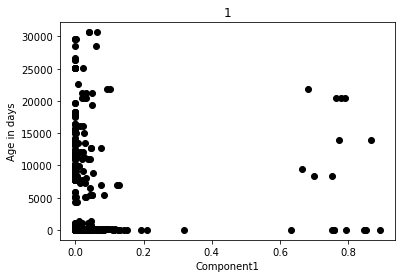

Component  1 (0.088450068910857244, 0.024016525635938302)


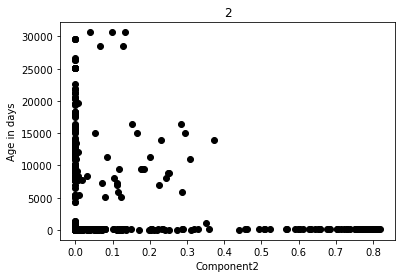

Component  2 (-0.14783360120461631, 0.00015339974767100345)


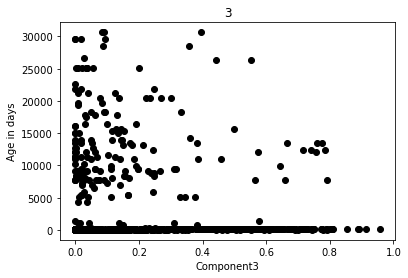

Component  3 (-0.23416958122317666, 1.4704960332676057e-09)


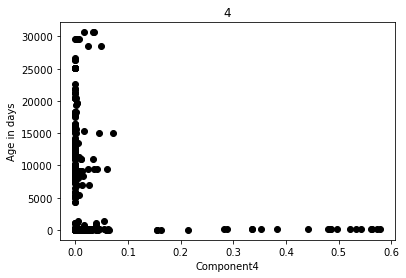

Component  4 (-0.093536457336875184, 0.016977077929713098)


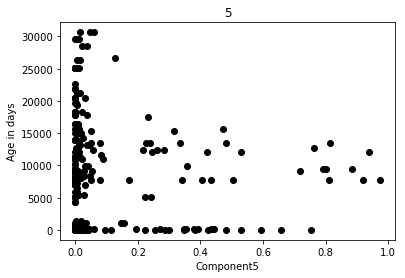

Component  5 (0.133317390513261, 0.00064903219753255359)


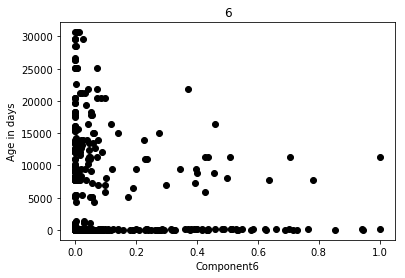

Component  6 (-0.023554971226633092, 0.54855535955438051)


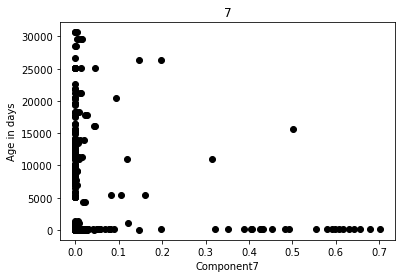

Component  7 (-0.05406137612703929, 0.16829079560563259)


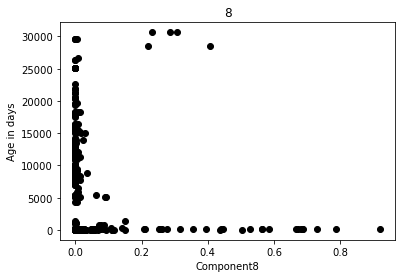

Component  8 (-0.029700574070978272, 0.44934238474395927)


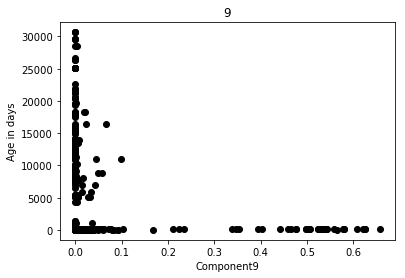

Component  9 (-0.13854655895617465, 0.00039217827326896776)


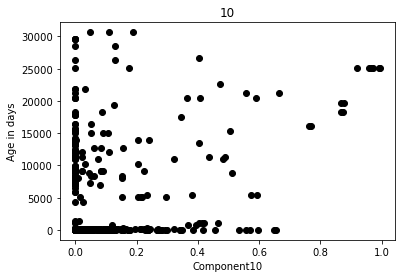

Component  10 (0.35497996148665528, 9.1129534241814958e-21)


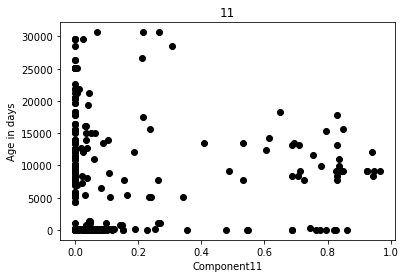

Component  11 (0.20537180374461331, 1.2476022879663406e-07)


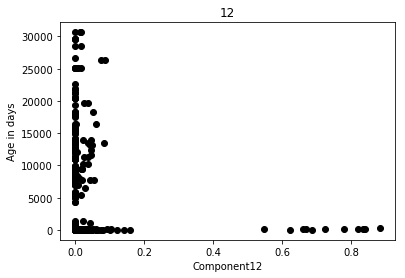

Component  12 (-0.058400241550516596, 0.13662654807235319)


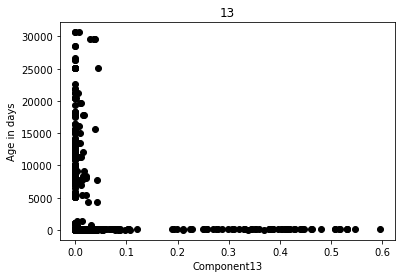

Component  13 (-0.18102344086330246, 3.3461864122104365e-06)


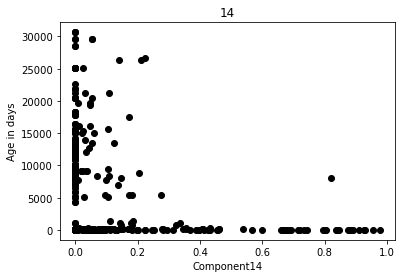

Component  14 (-0.13147204683928099, 0.0007720380635859752)


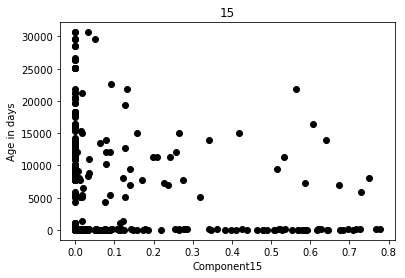

Component  15 (-0.023309131188020932, 0.55273738012438334)


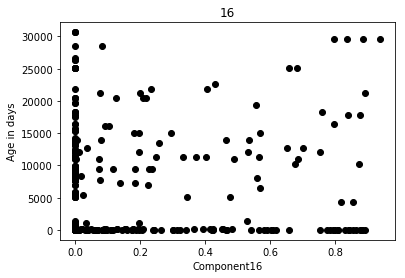

Component  16 (0.21862104500653809, 1.744072361150844e-08)


In [44]:
for i in range(16):
    plt.clf()
    plt.plot(a.NormedBasis[:,i], dayage, 'ok')
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    plt.title(str(i+1))
    plt.show()
    print('Component ',i+1,pearsonr(a.NormedBasis[:,i], dayage))

In [45]:
plt.show()

Component  1 (0.20366498843051692, 5.3855790117230527e-06)


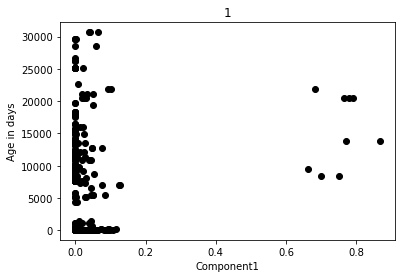

Component  2 (-0.21743912221742323, 1.1494027470197275e-06)


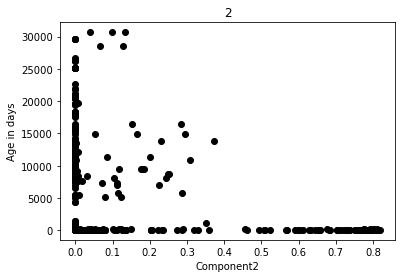

Component  3 (-0.37376230854301218, 1.0030022614958777e-17)


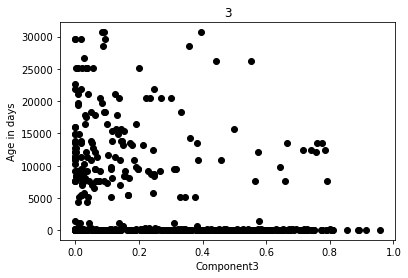

Component  4 (-0.12306687830144566, 0.0063254554189218085)


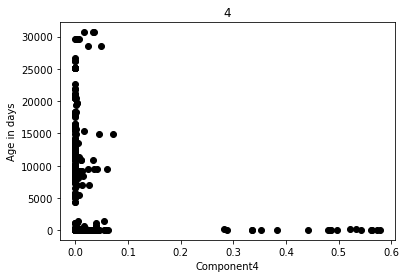

Component  5 (0.15102906472728564, 0.0007869971261521818)


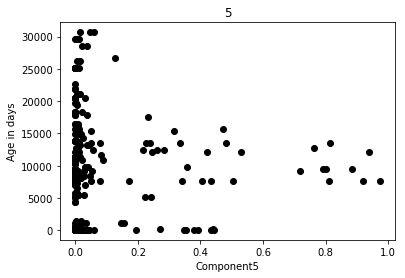

Component  6 (0.012749605305911125, 0.77809398378214512)


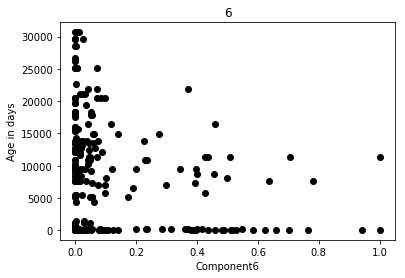

Component  7 (-0.095735550988628557, 0.033936570738980557)


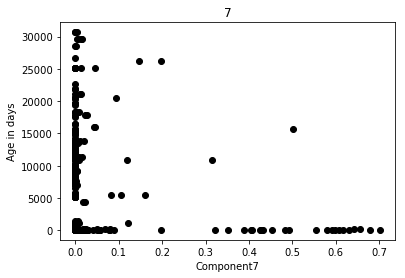

Component  8 (-0.066253221215030342, 0.14266395373515844)


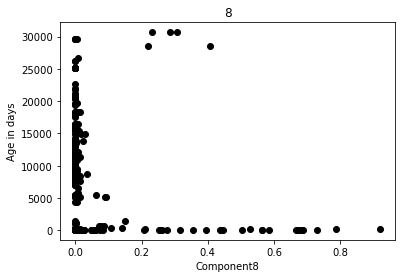

Component  9 (-0.18788229395330761, 2.7901243434437562e-05)


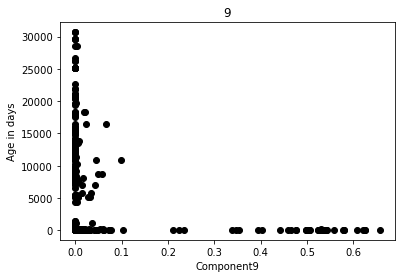

Component  10 (0.42546875961773828, 5.2375452722306918e-23)


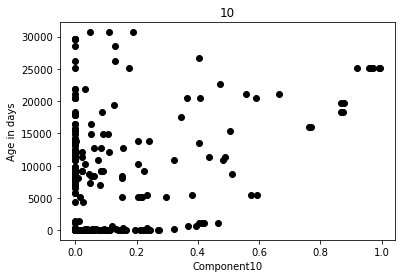

Component  11 (0.24092747896147051, 6.4878752704992823e-08)


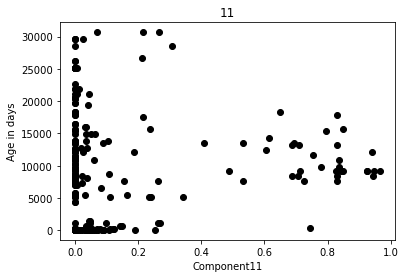

Component  12 (-0.075137963074083117, 0.096301633237259932)


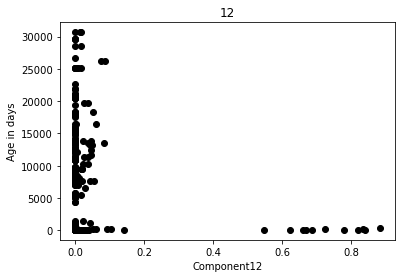

Component  13 (-0.25116283358623481, 1.6818538374778735e-08)


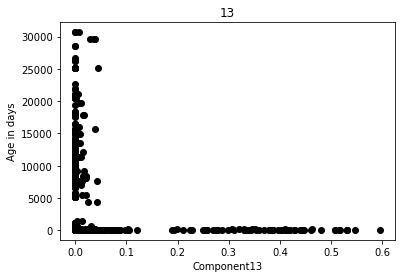

Component  14 (-0.061348505979551535, 0.17471580285706423)


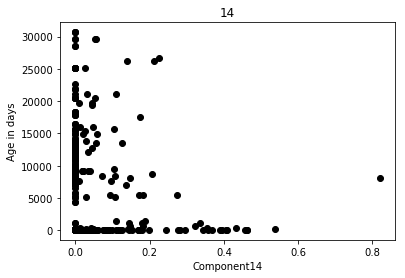

Component  15 (0.034794373870440702, 0.44173918171866877)


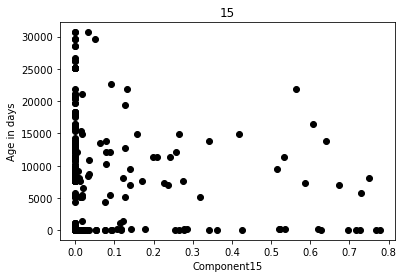

Component  16 (0.39613341280434206, 6.7499355909783429e-20)


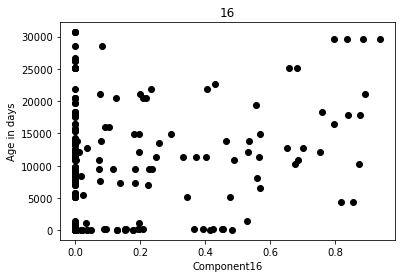

In [46]:
for i in range(16):
    plt.clf()
    plt.plot(a.NormedBasis[:,i][dayage>0], dayage[dayage>0], 'ok')
    plt.title(str(i+1))
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][dayage>0], dayage[dayage>0]))
    plt.show()

Component  1 (0.099296603125560573, 0.083909884336487148)


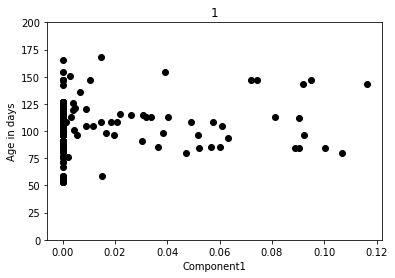

Component  2 (-0.0065076604918956407, 0.91003158656928673)


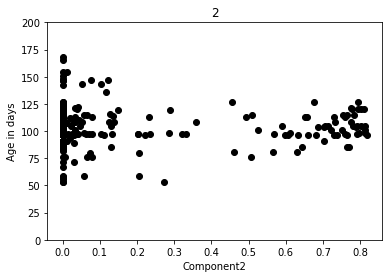

Component  3 (0.098284033116899164, 0.087131849851036211)


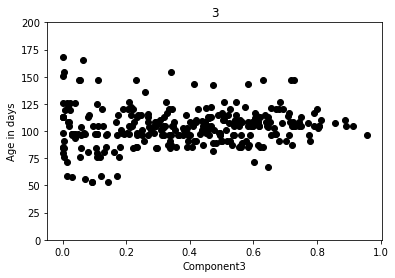

Component  4 (0.043664818802992701, 0.44812321729852267)


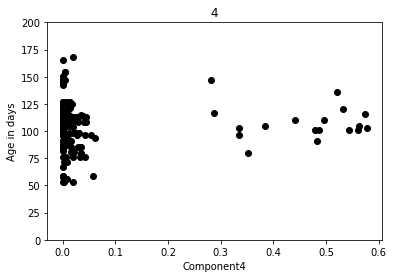

Component  5 (0.04430982330172524, 0.4414401280219673)


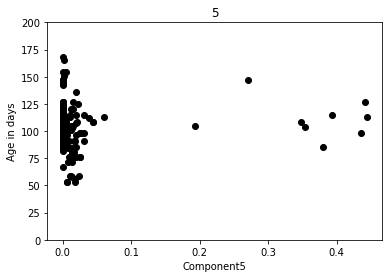

Component  6 (-0.015642033984027772, 0.7859132519041504)


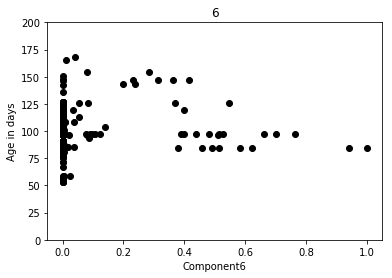

Component  7 (0.023225986331963266, 0.68669441134768738)


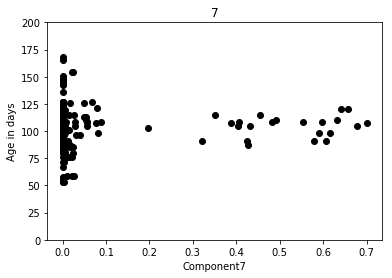

Component  8 (-0.062144915847999534, 0.28009134238216266)


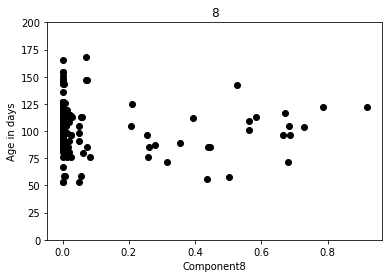

Component  9 (-0.032910485249119763, 0.5675896917554194)


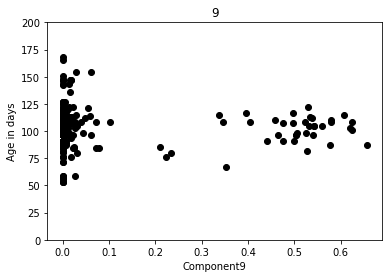

Component  10 (-0.076294924396789809, 0.18460734860466679)


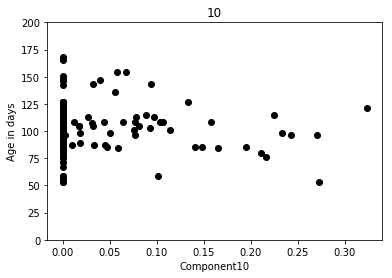

Component  11 (0.13135432677522219, 0.02197845684099884)


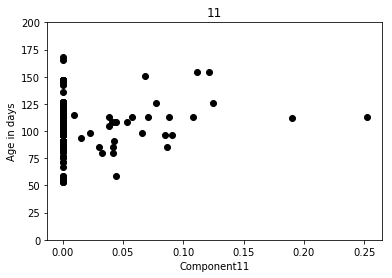

Component  12 (-0.0041622264946730167, 0.94238525190432132)


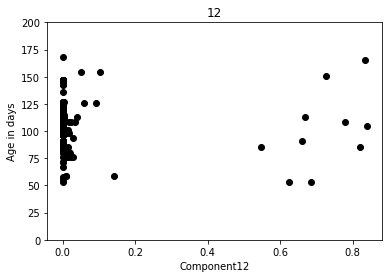

Component  13 (-0.090638594706607775, 0.11477821891373621)


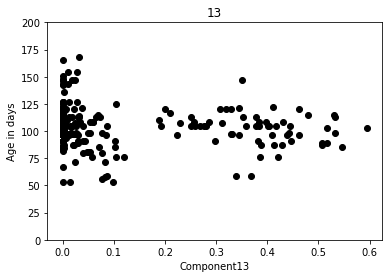

Component  14 (-0.3579712891855063, 1.2755523558338951e-10)


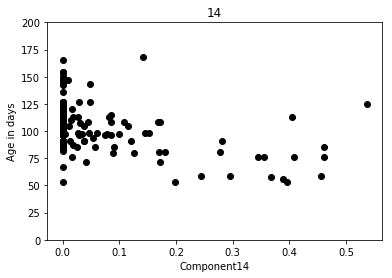

Component  15 (0.081422242177086046, 0.15673182883682246)


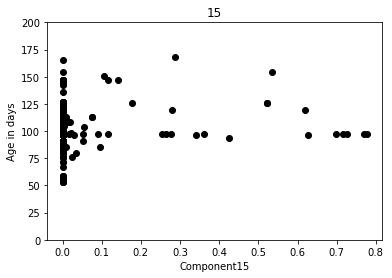

Component  16 (0.25777495763211822, 5.285547797057755e-06)


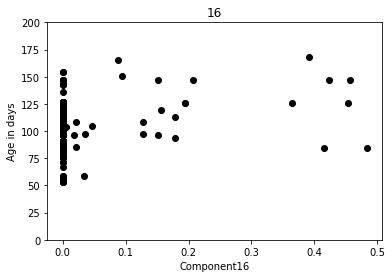

In [47]:
for i in range(16):
    plt.clf()
    plt.ylim([0,200])
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)], dayage[(dayage>0) * (dayage<200)], 'ok')
    print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][(dayage>0) * (dayage<200) ], dayage[(dayage>0) * (dayage<200) ]))
    plt.title(str(i+1))
    plt.show()

Component  1 (-0.055828955561311865, 0.69423923666032694)


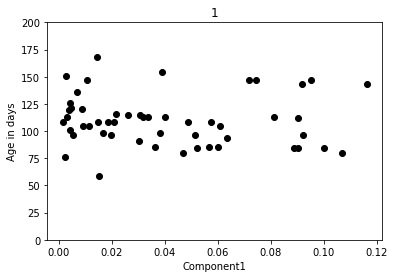

Component  2 (0.011212347249016855, 0.90285195844590915)


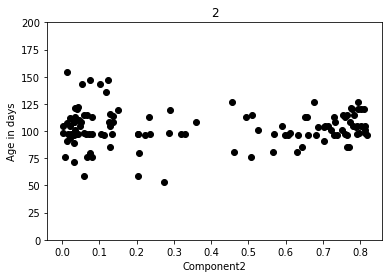

Component  3 (0.13912023729611372, 0.016992428484591107)


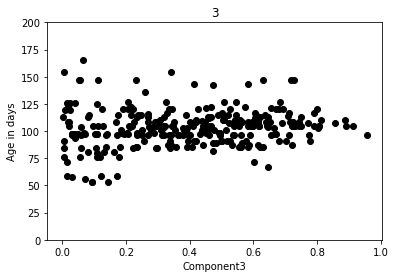

Component  4 (0.09403694872465046, 0.34475118375492286)


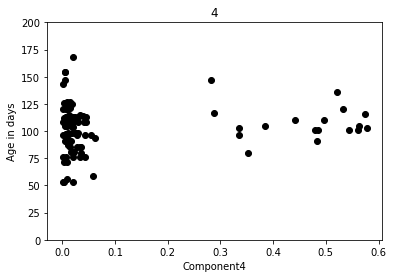

Component  5 (0.18884915287954862, 0.095552522133952461)


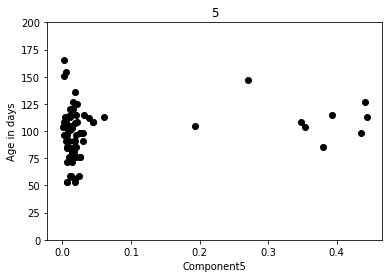

Component  6 (-0.14877014096420241, 0.22597324082989526)


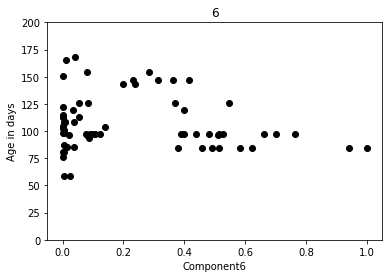

Component  7 (0.20981019086205735, 0.056946550888276097)


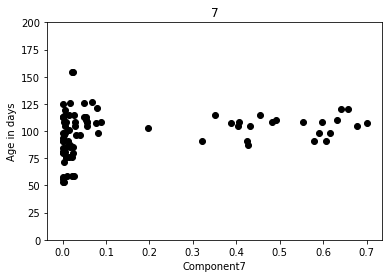

Component  8 (-0.0010408240445858427, 0.99302712328712017)


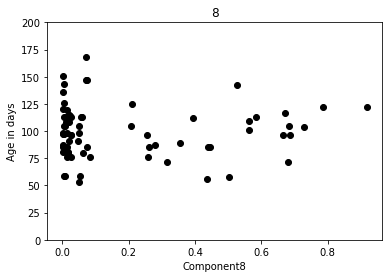

Component  9 (-0.17687296739102523, 0.06091877678355636)


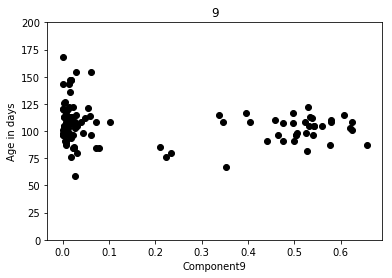

Component  10 (-0.25521304331858957, 0.076758845403930534)


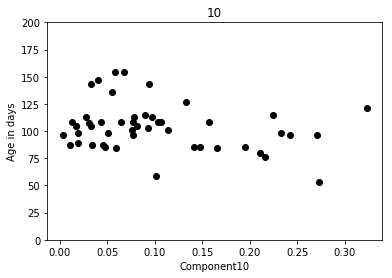

Component  11 (0.37551251001067204, 0.040865451814039368)


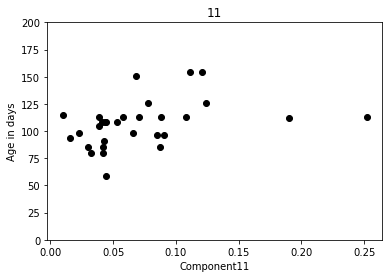

Component  12 (0.13080673153897809, 0.40897556625877607)


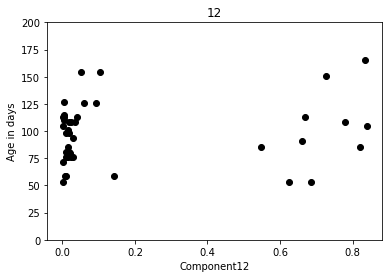

Component  13 (-0.046371073179757735, 0.57968363143080537)


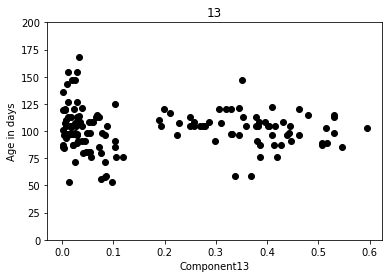

Component  14 (-0.44328641935038715, 0.0001933061084574188)


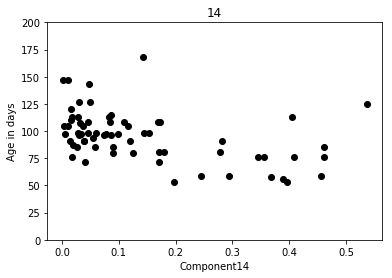

Component  15 (0.043933773807941917, 0.77444794479745482)


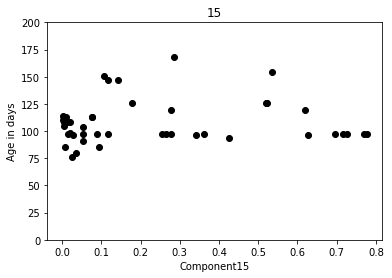

Component  16 (0.33710440271455977, 0.085522874839619428)


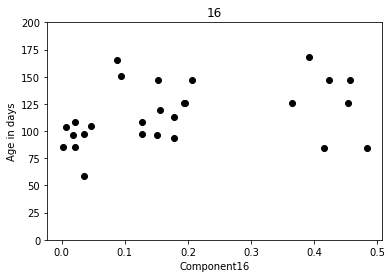

In [48]:
for i in range(16):
    plt.clf()
    plt.ylim([0,200])
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)*( a.NormedBasis[:,i] > 0)], dayage[(dayage>0) * (dayage<200)*( a.NormedBasis[:,i] > 0)], 'ok')
    print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][(dayage>0) * (dayage<200) *( a.NormedBasis[:,i] > 0)], dayage[(dayage>0) * (dayage<200) * (a.NormedBasis[:,i]>0)]))
    plt.title(str(i+1))
    plt.show()

In [54]:
RenalCut = MetaData.system.values[rosetta] == 'Renal'

In [55]:
MetaData[RenalCut]

order (WM20170901)    AG     LN     DS AG_plus   LN_plus   DS_plus  \
20                  532  4125   2749  13256  AG4125    LN2749   DS13256   
21                  714  4153   2563  12589  AG4153    LN2563   DS12589   
22                  570  9092   3719  16582  AG9092    LN3719   DS16582   
23                  706  4100   2897  13806  AG4100    LN2897   DS13806   
24                  586  8904   4529  19431  AG8904    LN4529   DS19431   
25                  580  6211  31456  37250  AG6211  LN31456A  DS37250A   
26                  537  4118   2777  13375  AG4118    LN2777   DS13375   
27                  520  4131   2724  13146  AG4131    LN2724   DS13146   
28                  530  4127   2744  13233  AG4127    LN2744   DS13233   
33                  534  4123   2766  13329  AG4123    LN2766   DS13329   
35                  584  9086   3787  16819  AG9086    LN3787   DS16819   
56                  716  4044   4347  18640  AG4044    LN4347   DS18640   
57                  723  4173   2488  12319  AG4173    LN2488   DS12319   
58                  699  4192   2304  11738  AG4192    LN2304   DS11738   
59                  133  4059   3726  16602  AG4059    LN3726   DS16602   
89                  744  4117   2778  13380  AG4117    LN2778   DS13380   
90                  745  4109   2813  13523  AG4109    LN2813   DS13523   
92                  741  4195   2272  11637  AG4195    LN2272   DS11637   
93                  728  4171   2494  12352  AG4171    LN2494   DS12352   
96                  748  4043   4427  18973  AG4043    LN4427   DS18973   
97                  657  3882  20478  23466  AG3882   LN20478   DS23466   
171                 597  9025   4049  17647  AG9025    LN4049   DS17647   
213                  84  8846  10011  20753  AG8846   LN10011   DS20753   
214                  68  9019   4058  17677  AG9019    LN4058   DS17677   
215                  77  8869   4804  20343  AG8869    LN4804   DS20343   
216                  31  9153   2552  12528  AG9153    LN2552   DS12528   
258                 631  3946  21218  24785  AG3946  LN21218A  DS24785A   
260                 646  4080   3148  14680  AG4080    LN3148   DS14680   
269                 103  9111   3494  15947  AG9111    LN3494   DS15947   
270                 110  9148   2616  12774  AG9148    LN2616   DS12774   
..                  ...   ...    ...    ...     ...       ...       ...   
466                 165  8835  10054  19260  AG8835   LN10054   DS19260   
491                 256  4082   3130  14625  AG4082    LN3130   DS14625   
507                 793  4074   3184  14790  AG4074    LN3184   DS14790   
508                 770  3875  20970  24567  AG3875  LN20970A  DS24567A   
516                 293  3954  27662  29043  AG3954  LN27662C  DS29043C   
525                 367  9072   3892  17140  AG9072    LN3892   DS17140   
530                 368  9113   3402  15651  AG9113    LN3402   DS15651   
531                 364  8962   4281  18466  AG8962    LN4281   DS18466   
541                 327  8932   4423  18961  AG8932    LN4423   DS18961   
542                 326  8931   4424  18964  AG8931    LN4424   DS18964   
544                 347  9012   4067  17753  AG9012    LN4067   DS17753   
545                 357  9058   3926  17307  AG9058    LN3926   DS17307   
561                 668  4095   2954  14061  AG4095    LN2954   DS14061   
562                 350  9005   4076  17804  AG9005    LN4076   DS17804   
563                 667  7007  42592  56257  AG7007  LN42592A  DS56257A   
564                 645  3883  20867  24154  AG3883  LN20867A  DS24154A   
567                 335  8821  10081  21344  AG8821   LN10081   DS21344   
568                 330  9049   3946  17381  AG9049    LN3946   DS17381   
570                 677  4094   2955  14065  AG4094    LN2955   DS14065   
581                 339  8822  10080  20920  AG8822   LN10080   DS20920   
582                 670  6993  26972  26692  AG6993  LN26972B  DS26692B   
607                  15  9133 

In [57]:
MetaData.loc[rosetta][RenalCut]

order (WM20170901)    AG     LN     DS AG_plus   LN_plus   DS_plus  \
573                 337  8826  10076  20917  AG8826   LN10076   DS20917   
558                 336  8825  10077  21340  AG8825   LN10077   DS21340   
524                 359  8824  10078  21044  AG8824   LN10078   DS21044   
579                 338  8823  10079  20445  AG8823   LN10079   DS20445   
581                 339  8822  10080  20920  AG8822   LN10080   DS20920   
567                 335  8821  10081  21344  AG8821   LN10081   DS21344   
580                 334  8820  10082  20953  AG8820   LN10082   DS20953   
583                 333  8819  10083  21096  AG8819   LN10083   DS21096   
520                 360  8818  10084  20987  AG8818   LN10084   DS20987   
603                 301  8812  10113  20786  AG8812   LN10113   DS20786   
555                 332  8810  10157  20988  AG8810   LN10157   DS20988   
572                 675  4204   1951  10631  AG4204    LN1951   DS10631   
576                 676  4203   1953  10641  AG4203    LN1953   DS10641   
575                 674  4202   1958  10662  AG4202    LN1958   DS10662   
602                 673  4201   1959  10666  AG4201    LN1959   DS10666   
589                 654  3873  20836  24211  AG3873  LN20836A  DS24211A   
517                 664  7535  20837  24205  AG7535  LN20837A  DS24205A   
588                 306  7533  20841  21924  AG7533  LN20841A  DS21924A   
518                  26  3874  20842  21928  AG3874  LN20842A  DS21928A   
564                 645  3883  20867  24154  AG3883  LN20867A  DS24154A   
591                 655  3871  20963  24547  AG3871  LN20963A  DS24547A   
554                 340  9151   2574  12635  AG9151    LN2574   DS12635   
604                 302  5524  26921  24709  AG5524  LN26921A  DS24709A   
601                 671  3819  26937  26693  AG3819  LN26937A  DS26693A   
582                 670  6993  26972  26692  AG6993  LN26972B  DS26692B   
592                 669  6994  26974  26685  AG6994   LN26974   DS26685   
552                 539  4102   2863  13705  AG4102    LN2863   DS13705   
528                 540  4101   2867  13716  AG4101    LN2867   DS13716   
561                 668  4095   2954  14061  AG4095    LN2954   DS14061   
570                 677  4094   2955  14065  AG4094    LN2955   DS14065   
..                  ...   ...    ...    ...     ...       ...       ...   
562                 350  9005   4076  17804  AG9005    LN4076   DS17804   
519                 373  8984   4139  18088  AG8984    LN4139   DS18088   
543                 691  7006  42591  56256  AG7006  LN42591A  DS56256A   
563                 667  7007  42592  56257  AG7007  LN42592A  DS56257A   
531                 364  8962   4281  18466  AG8962    LN4281   DS18466   
532                 353  8951   4313  18542  AG8951    LN4313   DS18542   
557                 351  8948   4358  18663  AG8948    LN4358   DS18663   
527                 361  8947   4359  18666  AG8947    LN4359   DS18666   
535                 352  8935   4408  18928  AG8935    LN4408   DS18928   
521                 371  8934   4409  18931  AG8934    LN4409   DS18931   
541                 327  8932   4423  18961  AG8932    LN4423   DS18961   
542                 326  8931   4424  18964  AG8931    LN4424   DS18964   
547                 325  8921   4491  19235  AG8921    LN4491   DS19235   
553                 324  8920   4492  19238  AG8920    LN4492   DS19238   
550                 323  8919   4498  19254  AG8919    LN4498   DS19254   
566                 322  8918   4499  19257  AG8918    LN4499   DS19257   
595                 321  7438  45032  24714  AG7438  LN45032A  DS24714A   
590                 320  7439  45033  24801  AG7439  LN45033A  DS24801A   
593                 319  7440  45035  24814  AG7440  LN45035A  DS24814A   
538                 318  8908   4523  19386  AG8908    LN4523   DS19386   
536                 317  8907   4524  19388  AG8907    LN4524   DS19388   
559                 316  8886 

In [59]:
MetaData.loc[rosetta][RenalCut].dayage.values

AttributeError: 'DataFrame' object has no attribute 'dayage'

Component  1 (0.64249681469692854, 0.55579718170633574)


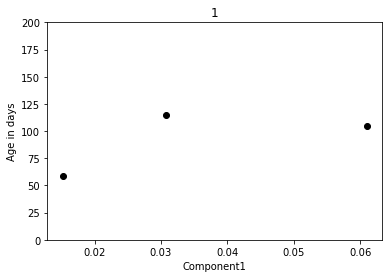

Component  2 (0.43449103381646642, 0.46472447959752511)


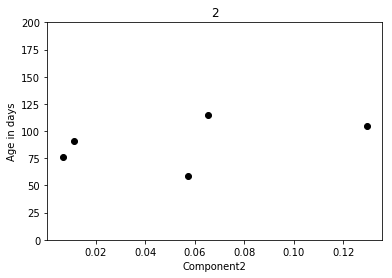

Component  3 (0.51672327587500655, 1.4541248130673891e-05)


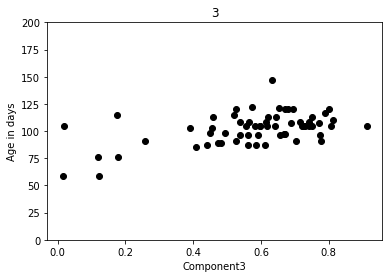

Component  4 (0.51531890424921278, 0.29544403177483153)


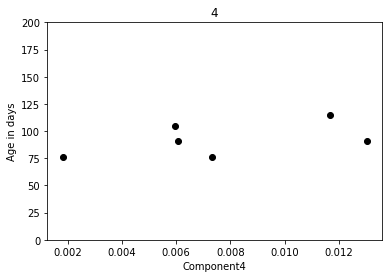

Component  5 (-0.10183117521910216, 0.81038237450904116)


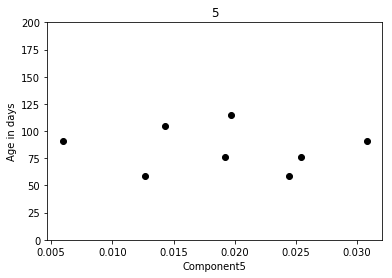

Component  6 (-0.40236341645328499, 0.42902545331197167)


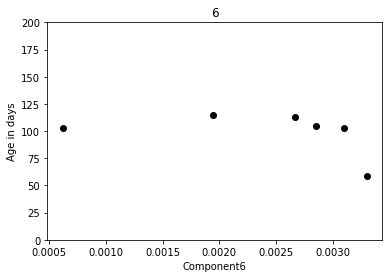

Component  7 (0.11010604540740447, 0.77794757835767958)


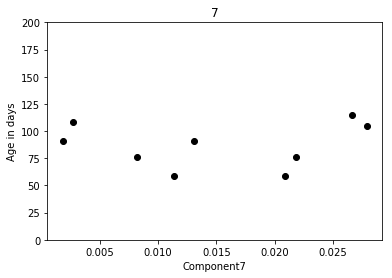

Component  8 (0.035643429233824339, 0.94655749781873233)


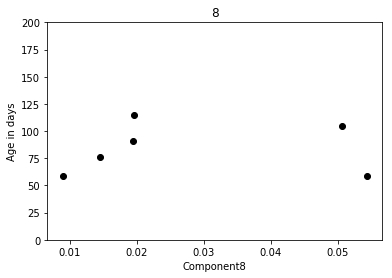

Component  9 (0.12259900445236417, 0.67628617301510408)


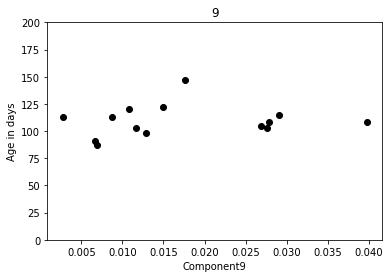

Component  10 (-0.057162716622599322, 0.88386569743288756)


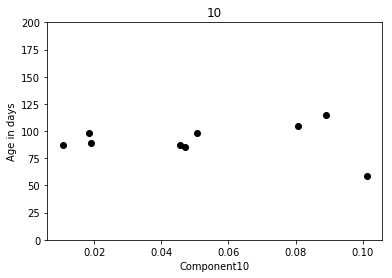

Component  11 (-1.0, 0.0)


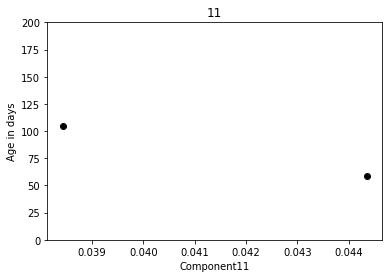

Component  12 (-0.59359376749070847, 0.29130180130378591)


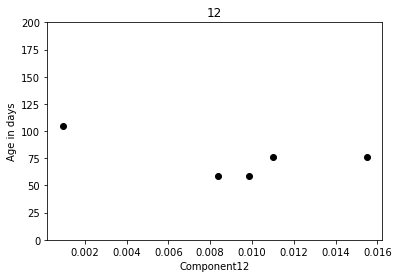

Component  13 (-0.17154444839074731, 0.17884642376688853)


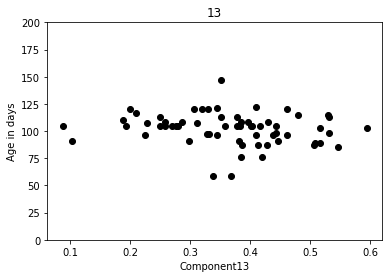

Component  14 (-0.77777760676084073, 0.039505881767102943)


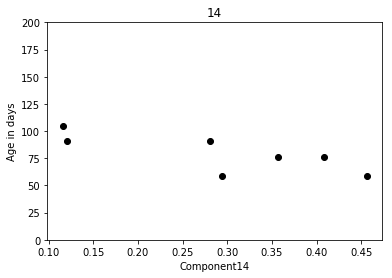

Component  15 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


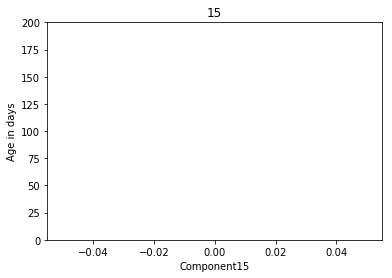

Component  16 (1.0, 0.0)


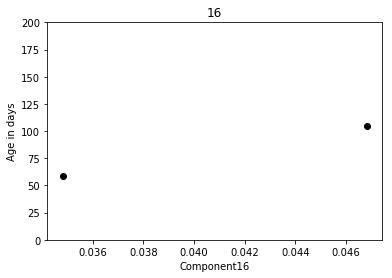

In [60]:
for i in range(16):
    plt.clf()
    plt.ylim([0,200])
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)*( a.NormedBasis[:,i] > 0)*RenalCut], dayage[(dayage>0) * (dayage<200)*( a.NormedBasis[:,i] > 0)*RenalCut], 'ok')
    print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][(dayage>0) * (dayage<200) *( a.NormedBasis[:,i] > 0) * RenalCut], dayage[(dayage>0) * (dayage<200) * (a.NormedBasis[:,i]>0) * RenalCut]))
    plt.title(str(i+1))
    plt.show()

Component  1 (0.64249681469692854, 0.55579718170633574)


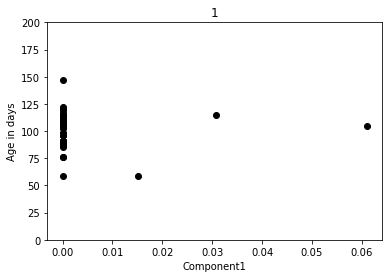

Component  2 (0.43449103381646642, 0.46472447959752511)


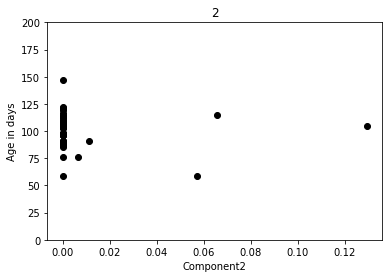

Component  3 (0.51672327587500655, 1.4541248130673891e-05)


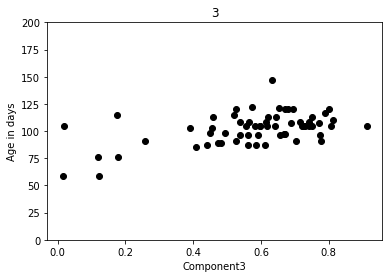

Component  4 (0.51531890424921278, 0.29544403177483153)


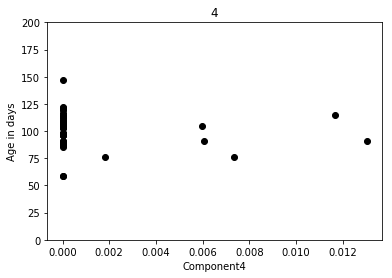

Component  5 (-0.10183117521910216, 0.81038237450904116)


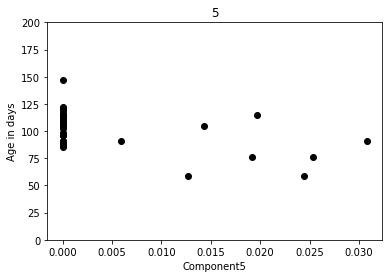

Component  6 (-0.40236341645328499, 0.42902545331197167)


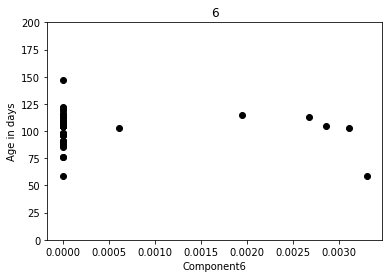

Component  7 (0.11010604540740447, 0.77794757835767958)


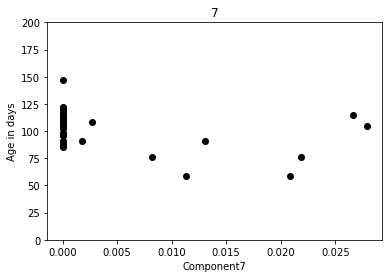

Component  8 (0.035643429233824339, 0.94655749781873233)


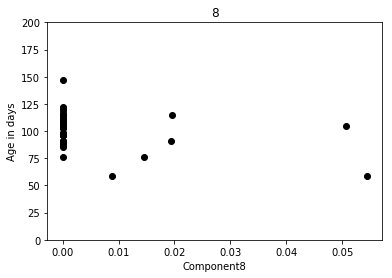

Component  9 (0.12259900445236417, 0.67628617301510408)


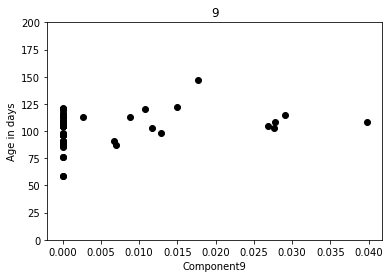

Component  10 (-0.057162716622599322, 0.88386569743288756)


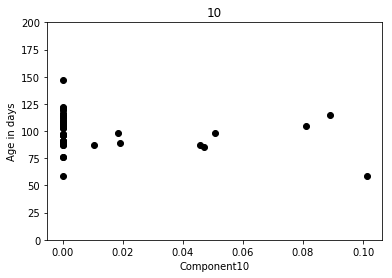

Component  11 (-1.0, 0.0)


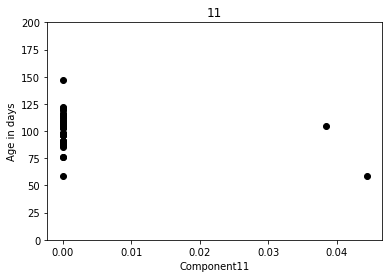

Component  12 (-0.59359376749070847, 0.29130180130378591)


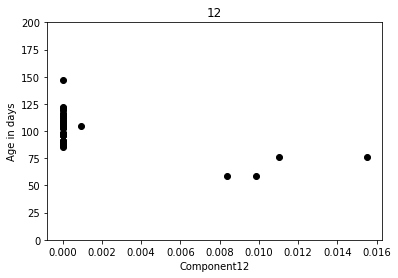

Component  13 (-0.17154444839074731, 0.17884642376688853)


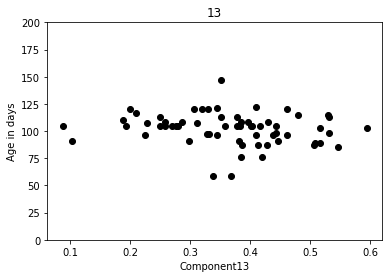

Component  14 (-0.77777760676084073, 0.039505881767102943)


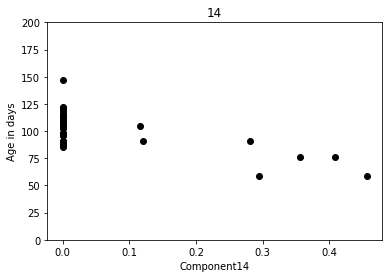

Component  15 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


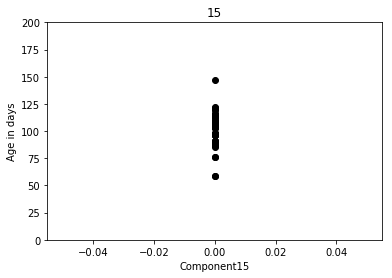

Component  16 (1.0, 0.0)


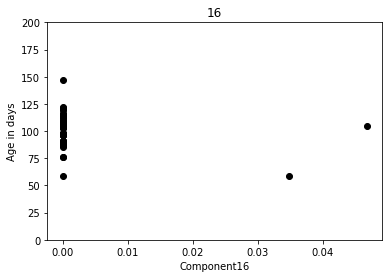

In [61]:
for i in range(16):
    plt.clf()
    plt.ylim([0,200])
    plt.ylabel('Age in days')
    plt.xlabel('Component'+str(i+1))
    plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)*RenalCut], dayage[(dayage>0) * (dayage<200)*RenalCut], 'ok')
    print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][(dayage>0) * (dayage<200) *( a.NormedBasis[:,i] > 0) * RenalCut], dayage[(dayage>0) * (dayage<200) * (a.NormedBasis[:,i]>0) * RenalCut]))
    plt.title(str(i+1))
    plt.show()

In [63]:
SystemType

Index(['Hematopoietic', 'Connective', 'Renal', 'Musculoskeletal', 'Nervous',
       'Digestive', 'Cardiovascular', 'Respiratory', 'Integumentary',
       'Embryonic', 'Epithelial', 'Fetal Life Support', 'Genitourinary',
       'Endocrine', 'Hepatic'],
      dtype='object')

**************************************************
**************************************************
doing system:  Hematopoietic
Component  1 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


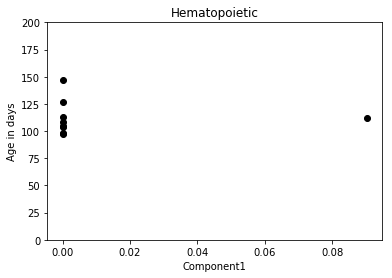

Component  2 (-0.9882865542574456, 0.097535405293705607)


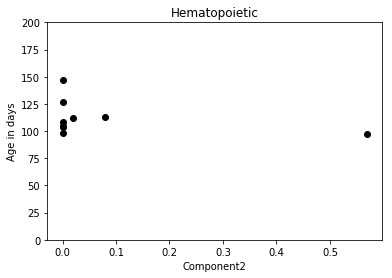

Component  3 (0.22613732912982884, 0.55849985379140088)


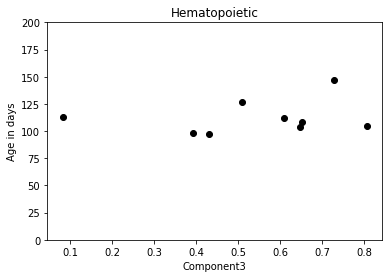

Component  4 (-0.26959033490948336, 0.73040966509051597)


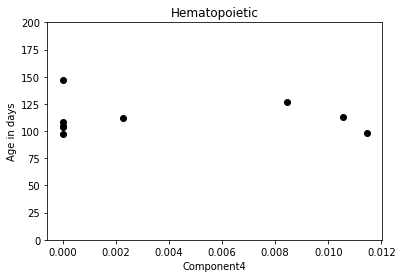

Component  5 (-0.050410254896713941, 0.90564077777786411)


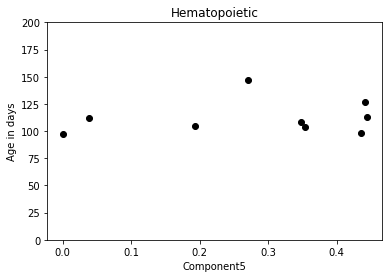

Component  6 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()


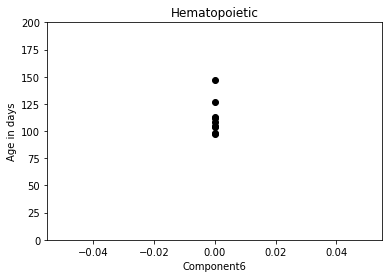

Component  7 (nan, nan)


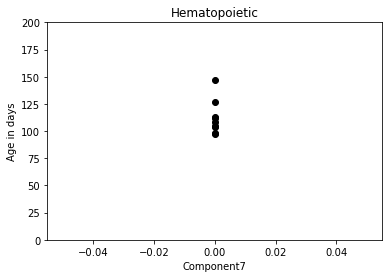

Component  8 (nan, nan)


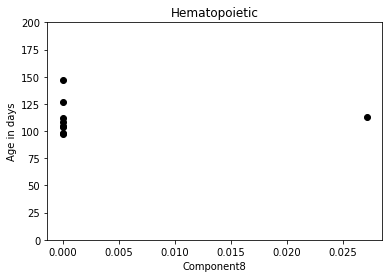

Component  9 (-1.0, 0.0)


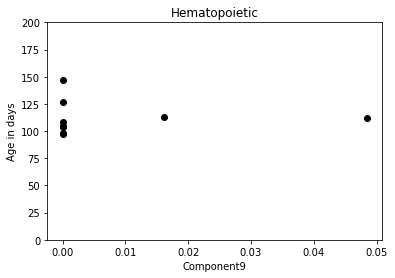

Component  10 (nan, nan)


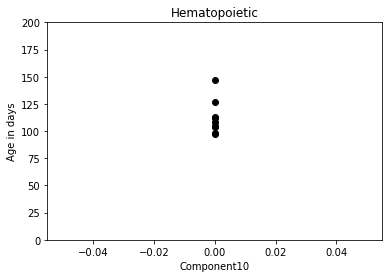

Component  11 (1.0, 0.0)


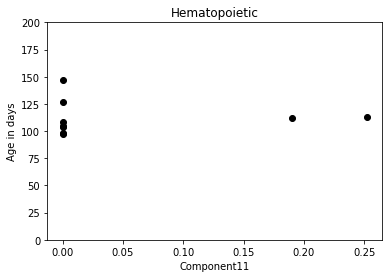

Component  12 (nan, nan)


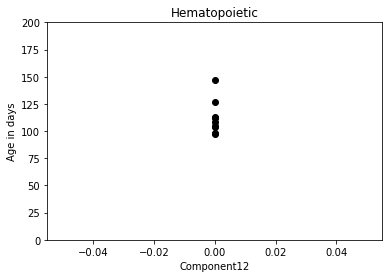

Component  13 (-0.061763094599641917, 0.96065535114585909)


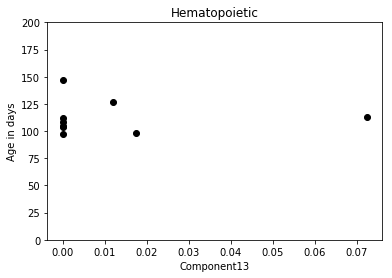

Component  14 (-0.83132765886596238, 0.37516263127148919)


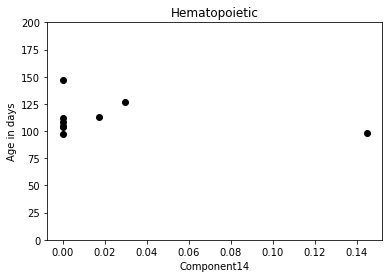

Component  15 (nan, nan)


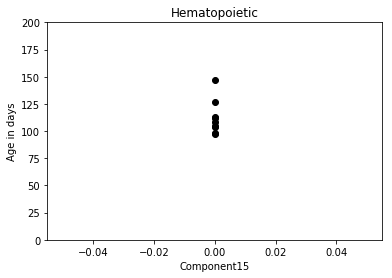

Component  16 (nan, nan)


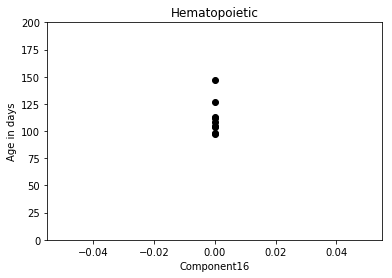

**************************************************
**************************************************
doing system:  Connective
Component  1 (-0.51499031946614648, 0.23689021039596639)


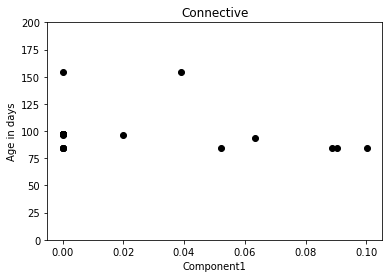

Component  2 (-0.25015432257619274, 0.35008429040180383)


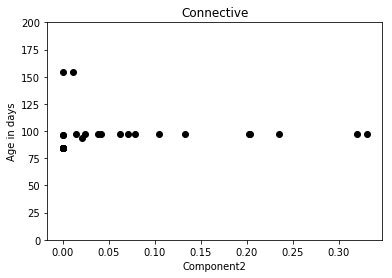

Component  3 (0.0040545310322028282, 0.98431669678671529)


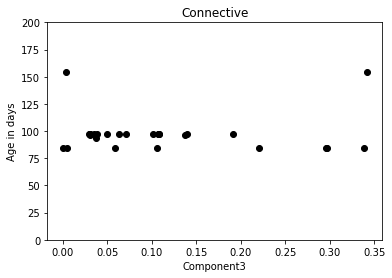

Component  4 (-0.35173161039384854, 0.43912222944319684)


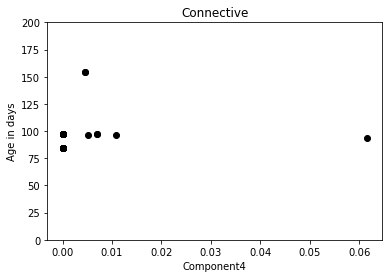

Component  5 (-0.72614094428653697, 0.27385905571346308)


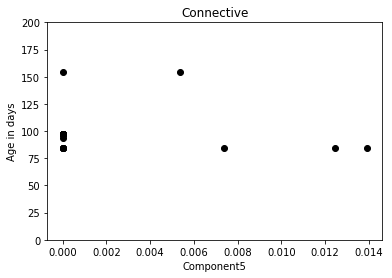

Component  6 (-0.38910056557181494, 0.044856232722415401)


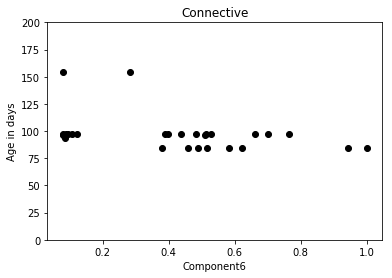

Component  7 (0.98598758111977736, 0.014012418880222645)


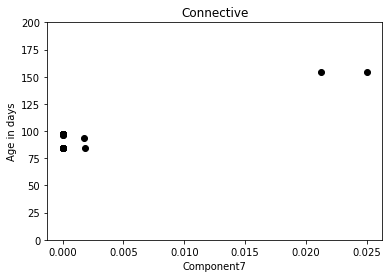

Component  8 (nan, nan)


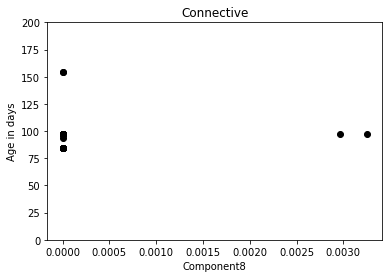

Component  9 (0.11101608524450084, 0.74521353449122452)


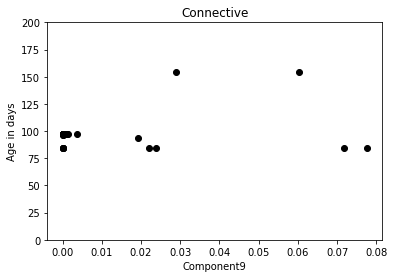

Component  10 (-0.54811940727824593, 0.45188059272175413)


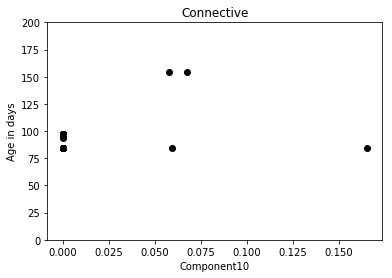

Component  11 (0.99661769064822714, 0.052375028202590053)


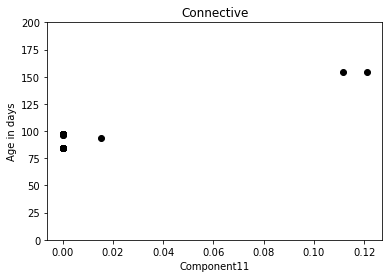

Component  12 (0.73705021475161192, 0.4724362038347123)


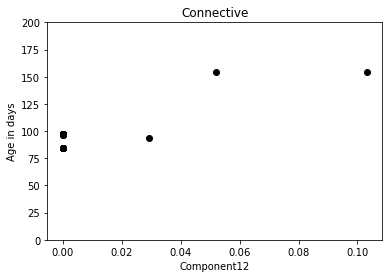

Component  13 (0.29853233483754171, 0.34592017398857156)


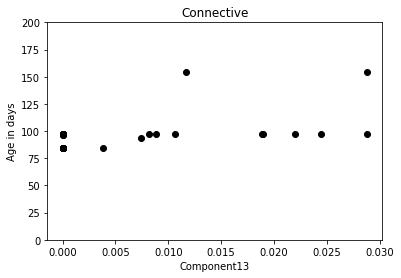

Component  14 (-0.050900058509529958, 0.92371584857758493)


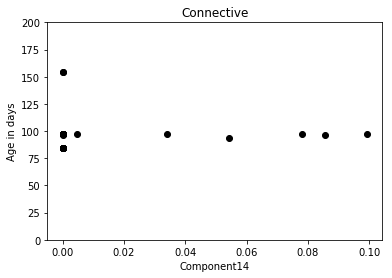

Component  15 (0.11254383590701006, 0.66715499543110024)


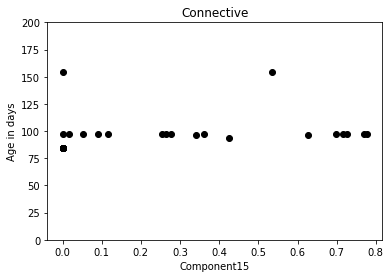

Component  16 (-0.97478226059190776, 0.00094588315753315623)


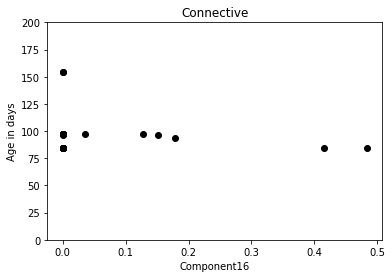

**************************************************
**************************************************
doing system:  Renal
Component  1 (0.64249681469692854, 0.55579718170633574)


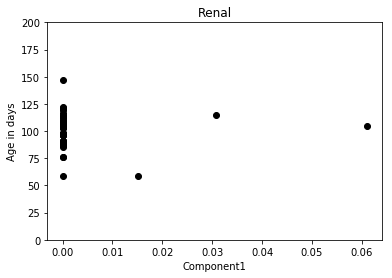

Component  2 (0.43449103381646642, 0.46472447959752511)


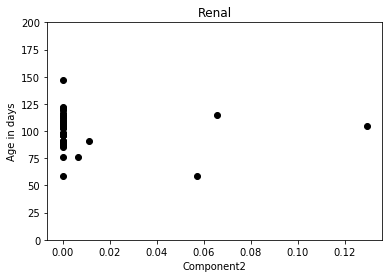

Component  3 (0.51672327587500655, 1.4541248130673891e-05)


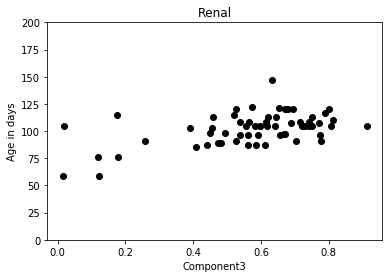

Component  4 (0.51531890424921278, 0.29544403177483153)


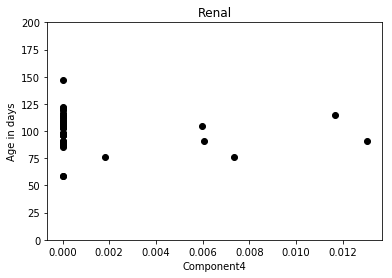

Component  5 (-0.10183117521910216, 0.81038237450904116)


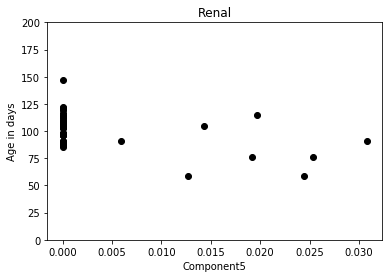

Component  6 (-0.40236341645328499, 0.42902545331197167)


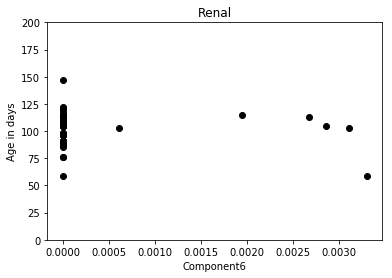

Component  7 (0.11010604540740447, 0.77794757835767958)


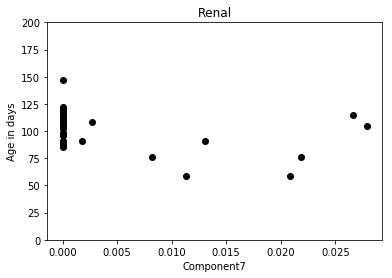

Component  8 (0.035643429233824339, 0.94655749781873233)


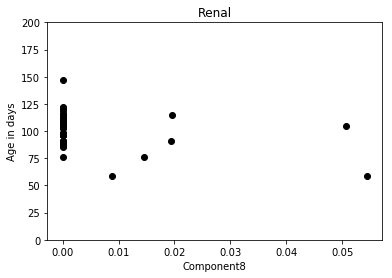

Component  9 (0.12259900445236417, 0.67628617301510408)


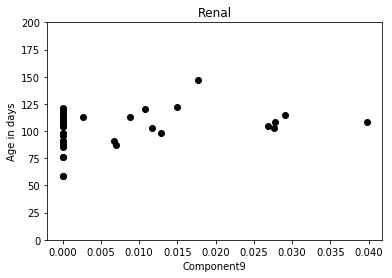

Component  10 (-0.057162716622599322, 0.88386569743288756)


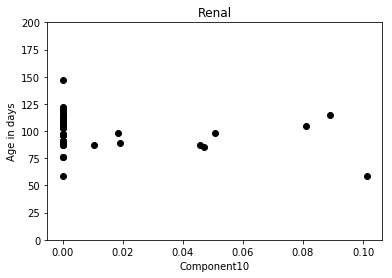

Component  11 (-1.0, 0.0)


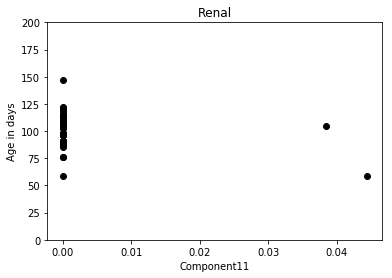

Component  12 (-0.59359376749070847, 0.29130180130378591)


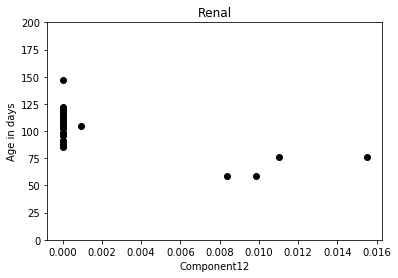

Component  13 (-0.17154444839074731, 0.17884642376688853)


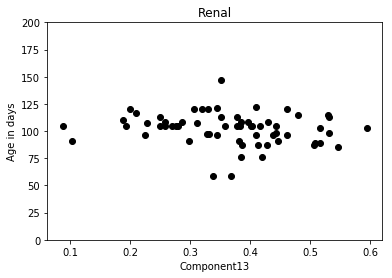

Component  14 (-0.77777760676084073, 0.039505881767102943)


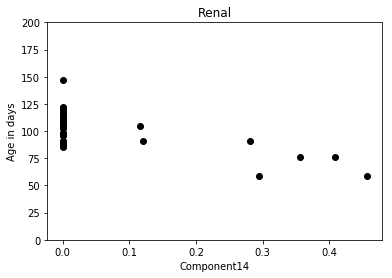

Component  15 (nan, nan)


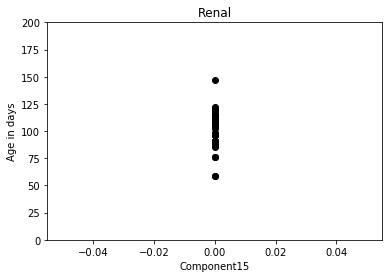

Component  16 (1.0, 0.0)


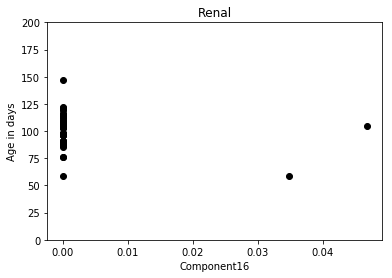

**************************************************
**************************************************
doing system:  Musculoskeletal
Component  1 (0.76326941692559136, 0.016711069139207096)


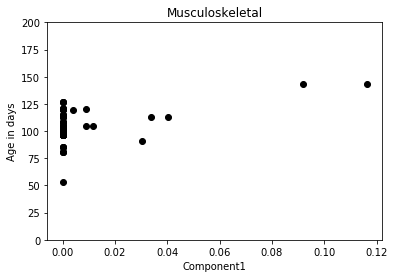

Component  2 (-0.1892378936110439, 0.14758457157333443)


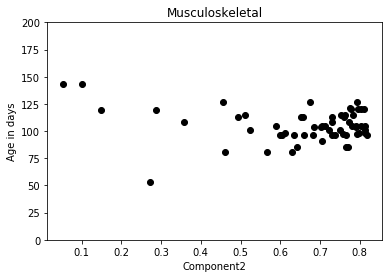

Component  3 (0.29973207638661209, 0.02226412901879956)


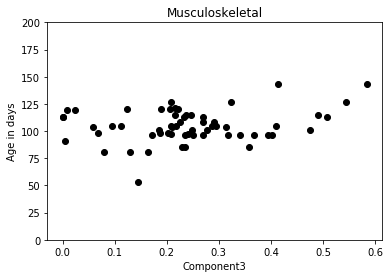

Component  4 (-0.56257772782664228, 0.02329292306865623)


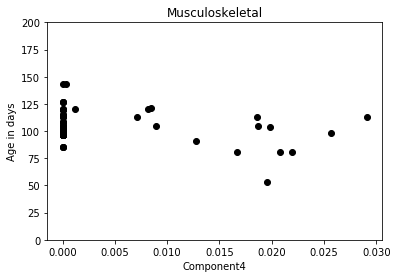

Component  5 (-0.36156672313218657, 0.20399983778965336)


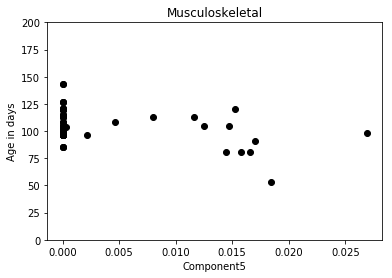

Component  6 (0.61511597531568252, 0.07788759537607802)


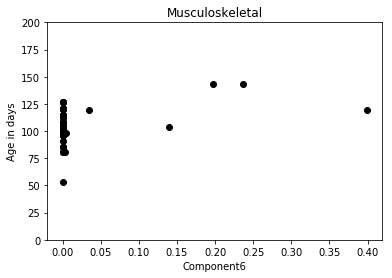

Component  7 (0.27073578766038447, 0.48104897992489781)


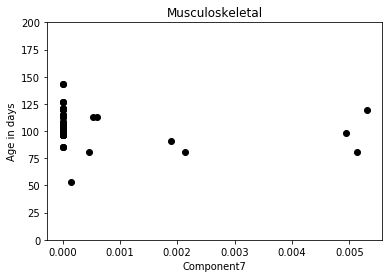

Component  8 (-0.23068389569611616, 0.44829996511141113)


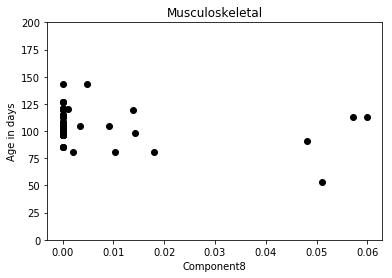

Component  9 (-0.069947496284197982, 0.81218494795654439)


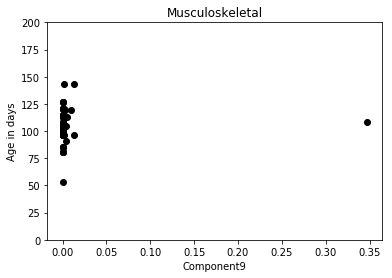

Component  10 (0.79723816615311882, 0.057500533015496992)


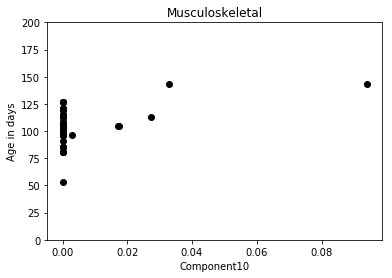

Component  11 (0.79838318682754472, 0.20161681317245531)


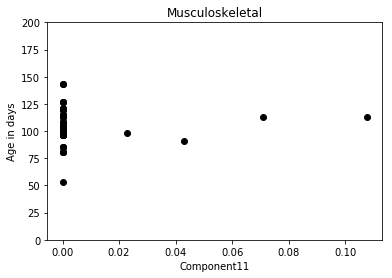

Component  12 (0.31164595271472434, 0.54766509700087307)


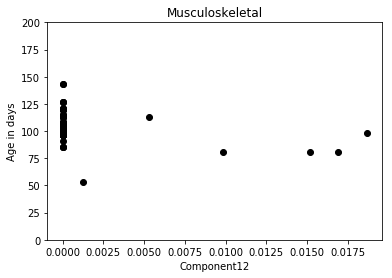

Component  13 (-0.79422563206253138, 0.00014036971112598175)


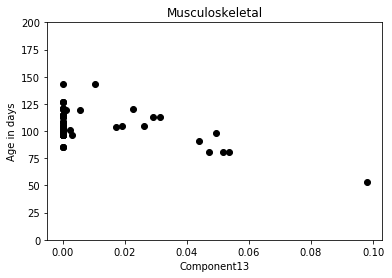

Component  14 (-0.80110240858296722, 0.0094543580850415497)


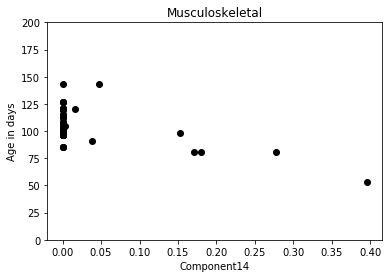

Component  15 (0.61026343159479768, 0.19824245045910807)


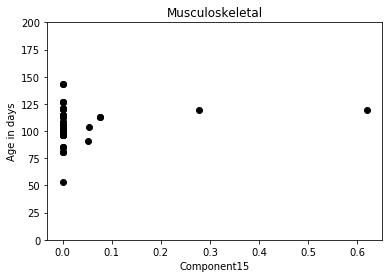

Component  16 (1.0, 0.0)


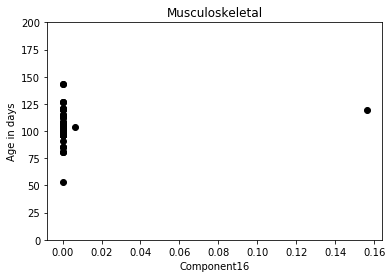

**************************************************
**************************************************
doing system:  Nervous
Component  1 (0.36203500069010947, 0.63796499930989015)


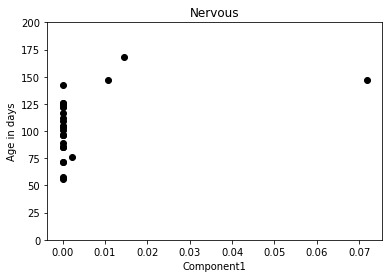

Component  2 (0.60300951466239594, 0.11354173225817428)


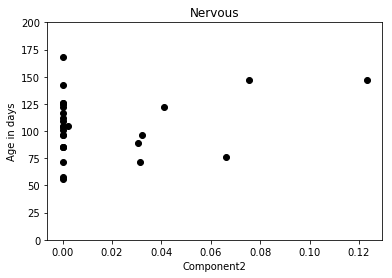

Component  3 (-0.0072989613359975584, 0.97177075125249479)


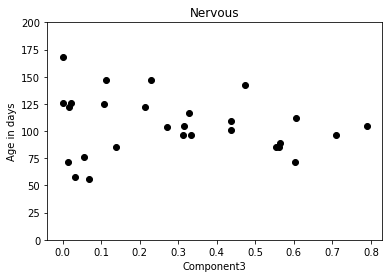

Component  4 (0.16258448340758058, 0.63291365024800017)


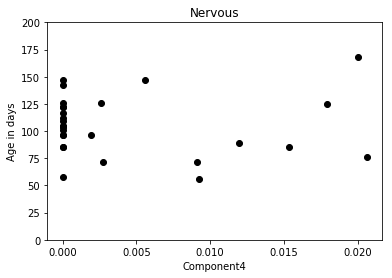

Component  5 (0.53742693961016197, 0.21347033675148089)


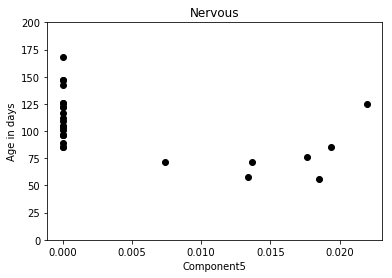

Component  6 (-0.48084388602799871, 0.41225745809492892)


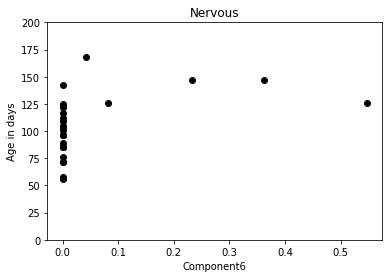

Component  7 (-0.46130298042525536, 0.5386970195747447)


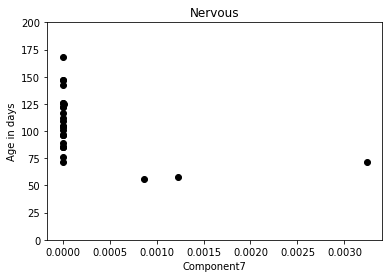

Component  8 (-0.26842954964078325, 0.17579980695817277)


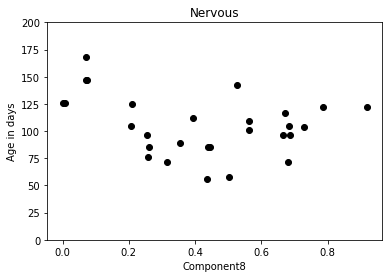

Component  9 (0.12592861065377314, 0.81210557291649443)


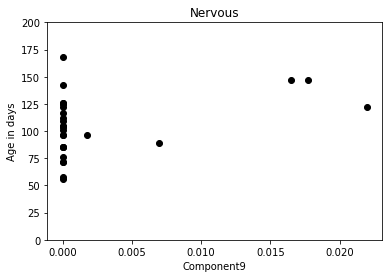

Component  10 (nan, nan)


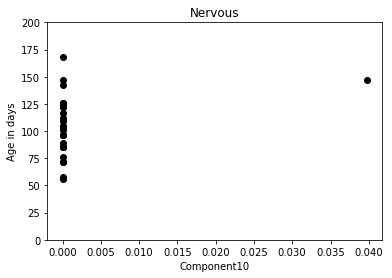

Component  11 (nan, nan)


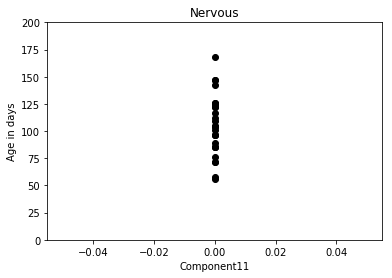

Component  12 (nan, nan)


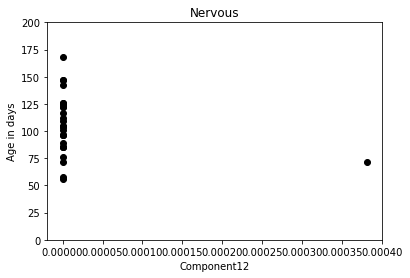

Component  13 (-0.4951030417503417, 0.12151995991940549)


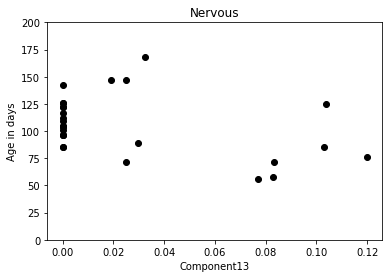

Component  14 (-0.44239169288949864, 0.20045972977261961)


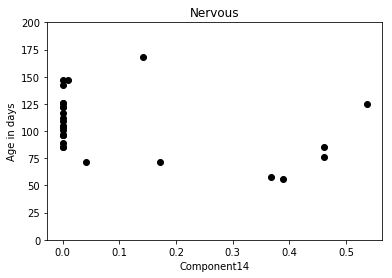

Component  15 (-0.6159056022177789, 0.57758052815709338)


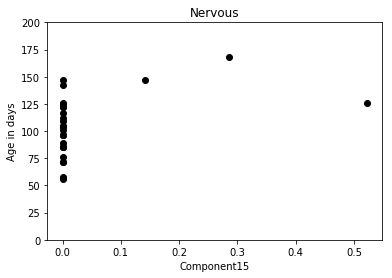

Component  16 (-0.25945777551859689, 0.67339291412628521)


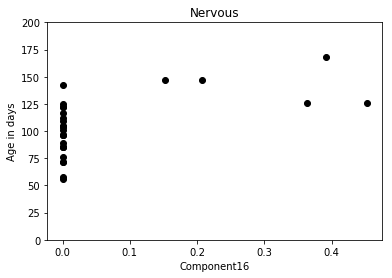

**************************************************
**************************************************
doing system:  Digestive
Component  1 (-0.41486318874550526, 0.4873493662621905)


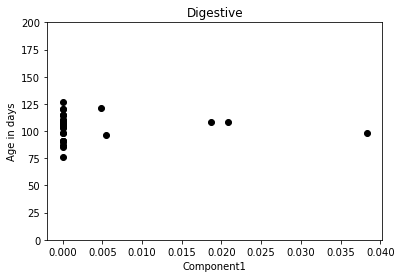

Component  2 (-0.82692359539895632, 0.0016913777020288717)


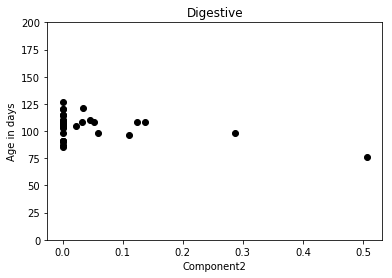

Component  3 (0.16225655171294628, 0.35923836919503971)


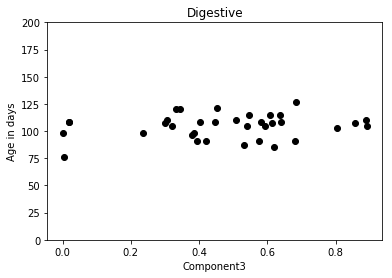

Component  4 (-0.70050901848860847, 0.0076588638201592679)


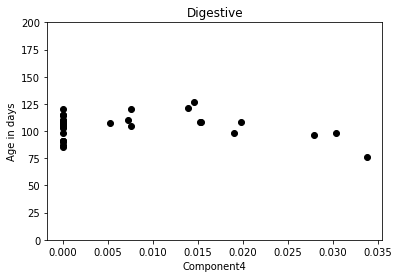

Component  5 (-0.12495967543555232, 0.69879522993218202)


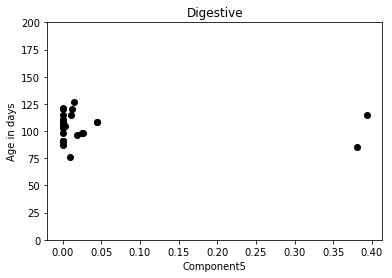

Component  6 (0.99999999999999978, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3031: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


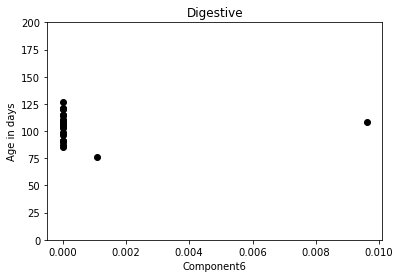

Component  7 (0.041183591116477923, 0.81999151699050354)


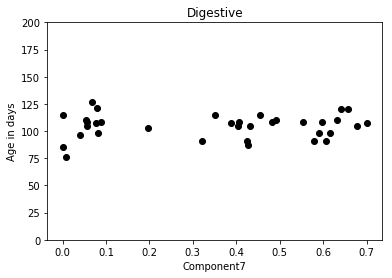

Component  8 (-0.97851509904038314, 0.021484900959616866)


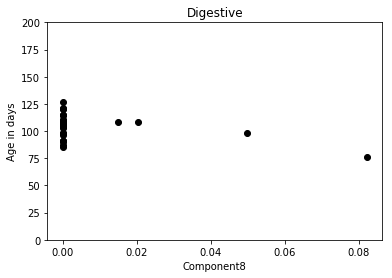

Component  9 (0.020612241716703211, 0.94187605156248377)


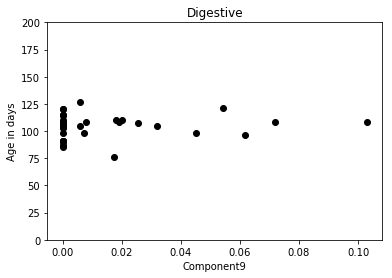

Component  10 (-0.1608900118896251, 0.67922572721667729)


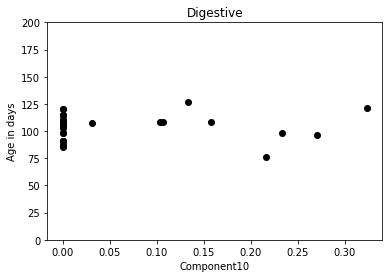

Component  11 (-0.99219451017936289, 0.079593590593517241)


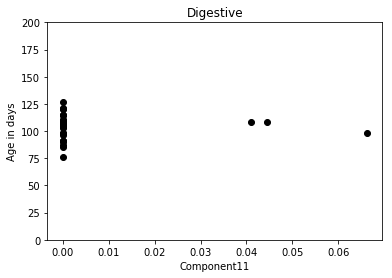

Component  12 (-0.80554271954034928, 0.099879959120510869)


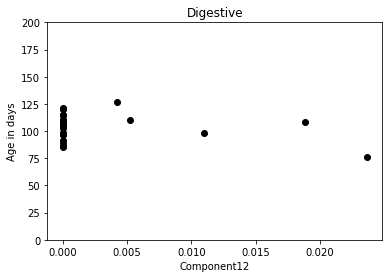

Component  13 (-0.34572941957607811, 0.22598127295943557)


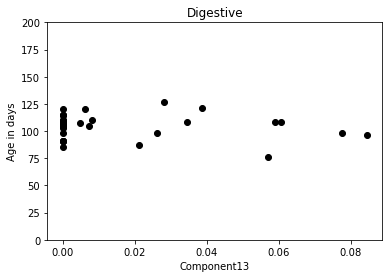

Component  14 (0.37125215434763453, 0.36521876466927722)


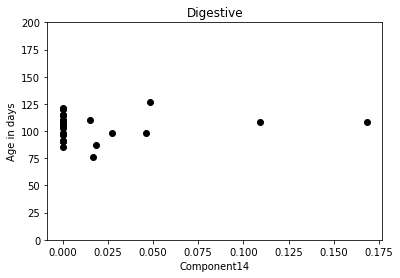

Component  15 (-0.67611747428290103, 0.14036221496172352)


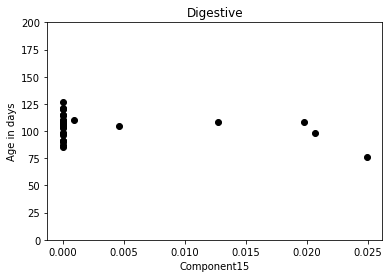

Component  16 (nan, nan)


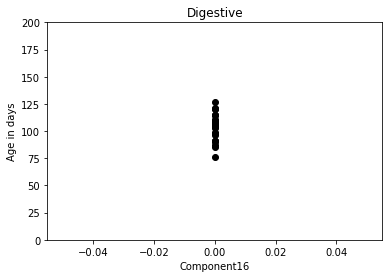

**************************************************
**************************************************
doing system:  Cardiovascular
Component  1 (-0.017590004924457992, 0.97014289970129264)


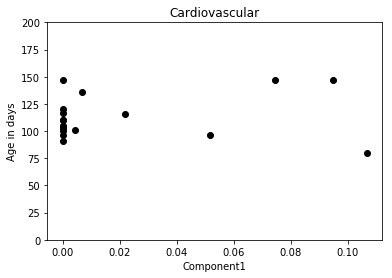

Component  2 (-0.44695641115735207, 0.31468511748114281)


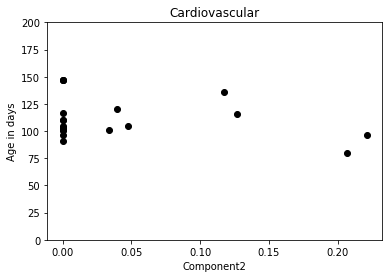

Component  3 (-0.16925295013649291, 0.46329123188146548)


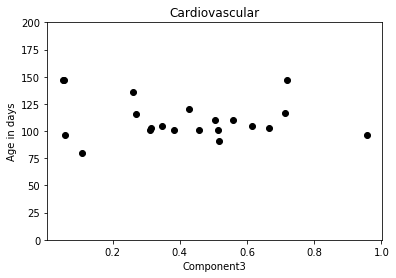

Component  4 (0.057558052472976809, 0.81494578524640804)


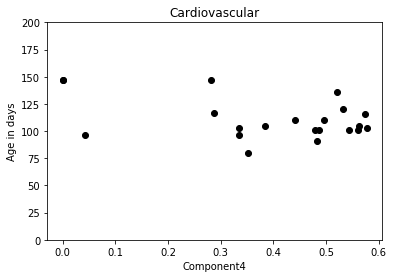

Component  5 (0.50441362629383435, 0.24832479754211764)


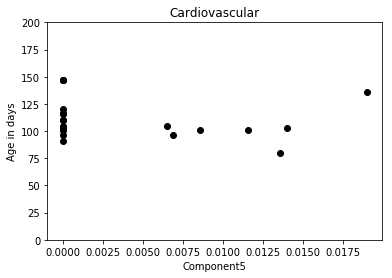

Component  6 (nan, nan)


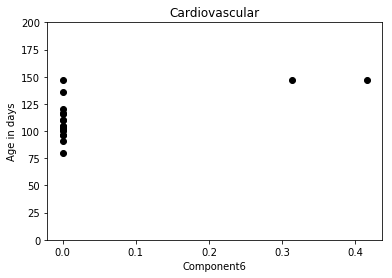

Component  7 (1.0, 0.0)


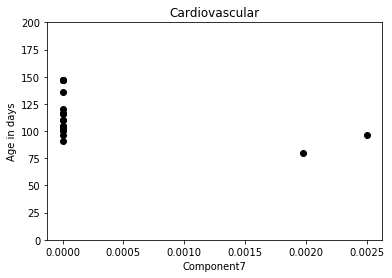

Component  8 (-0.8020671247292247, 0.40746717672805027)


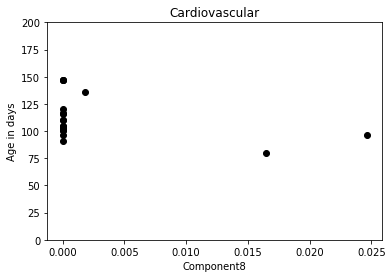

Component  9 (-0.53721394000310607, 0.21368725432055352)


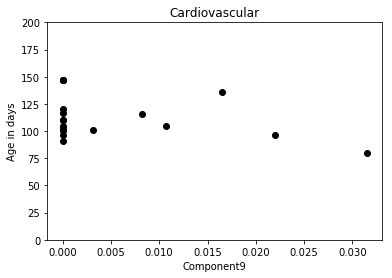

Component  10 (-0.65279440881441764, 0.2323752677910241)


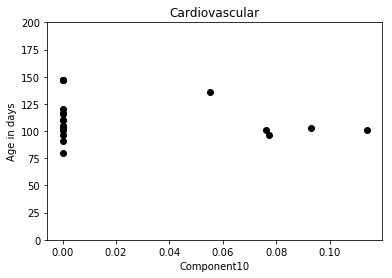

Component  11 (1.0, 0.0)


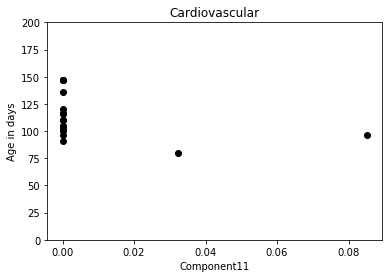

Component  12 (nan, nan)


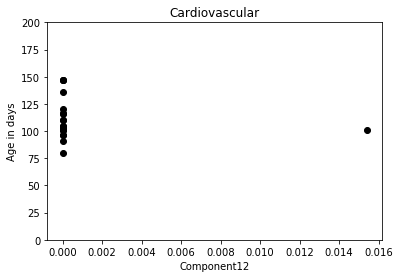

Component  13 (-0.86553821714748347, 0.13446178285251656)


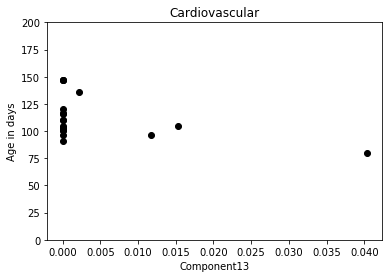

Component  14 (-0.87997229310176717, 0.3151219851290063)


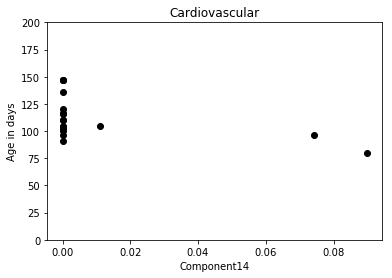

Component  15 (1.0, 0.0)


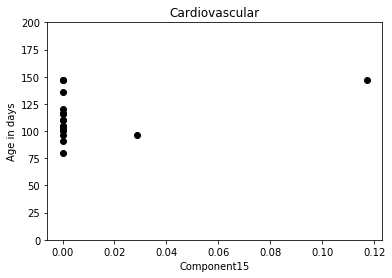

Component  16 (nan, nan)


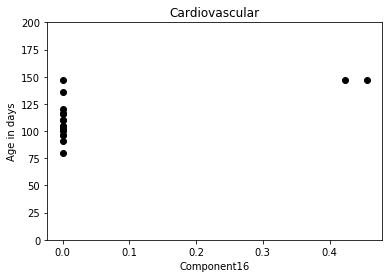

**************************************************
**************************************************
doing system:  Respiratory
Component  1 (-0.77371627469137694, 0.071013133877590576)


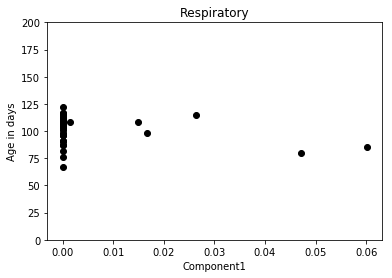

Component  2 (-0.59276298900042934, 0.16073155089750327)


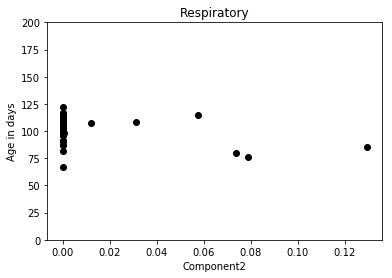

Component  3 (0.019773552371566701, 0.91023327171895796)


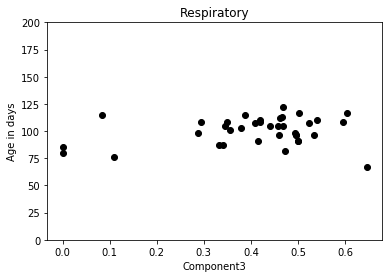

Component  4 (-0.36467857988006747, 0.2701627545979538)


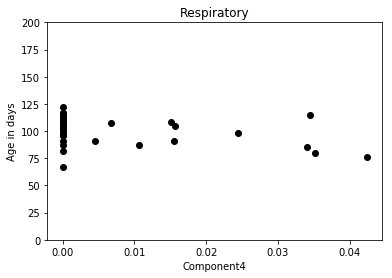

Component  5 (0.36714302111356634, 0.29665671913334551)


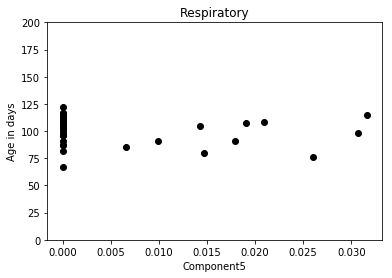

Component  6 (-0.11526506748205816, 0.85356558522415948)


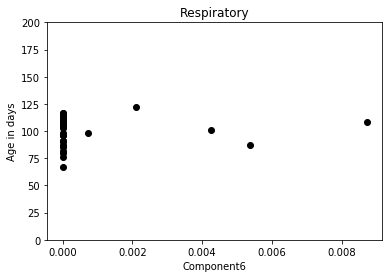

Component  7 (-0.61212469730071328, 0.059970278459974831)


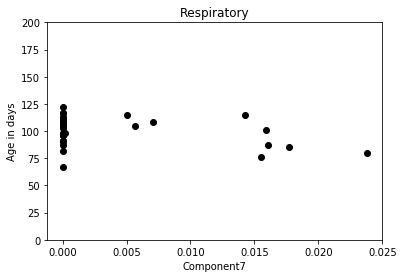

Component  8 (-0.39710688877230982, 0.43565033009463067)


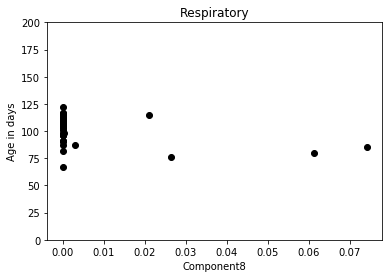

Component  9 (0.40579569060298543, 0.012706394980319009)


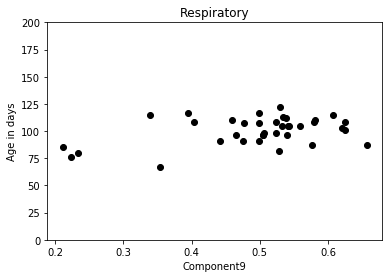

Component  10 (-0.1255730737999399, 0.81263044488892588)


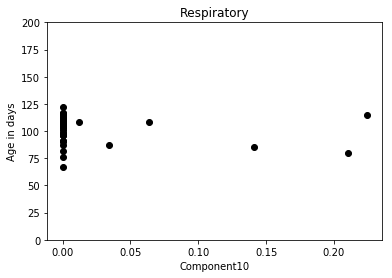

Component  11 (-0.72888496205587283, 0.48007780262302735)


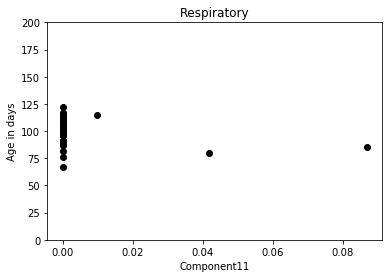

Component  12 (-0.93078546366722914, 0.069214536332770873)


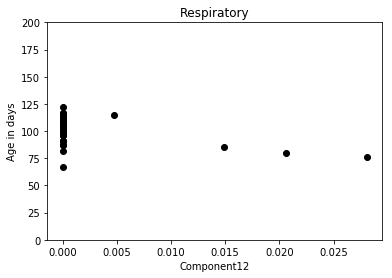

Component  13 (-0.31629243483818764, 0.31653850886742591)


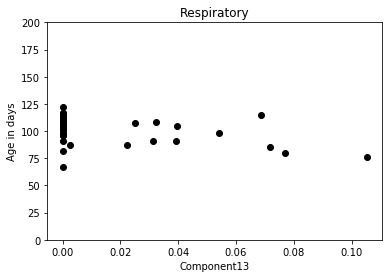

Component  14 (-0.56015385488962677, 0.11674000170851589)


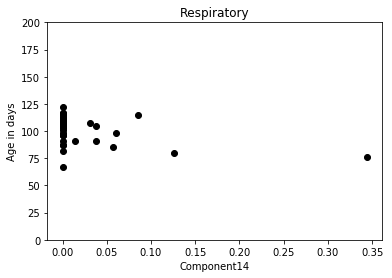

Component  15 (1.0, 0.0)


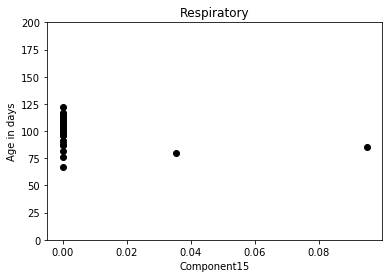

Component  16 (nan, nan)


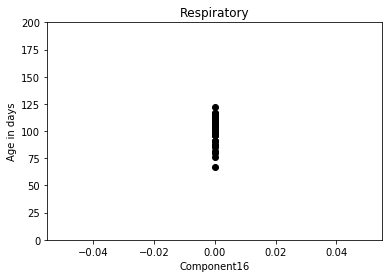

**************************************************
**************************************************
doing system:  Integumentary
Component  1 (nan, nan)


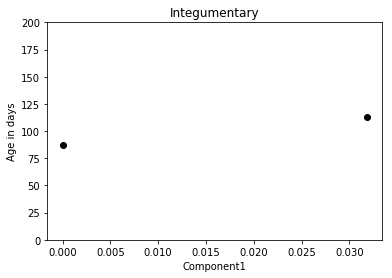

Component  2 (nan, nan)


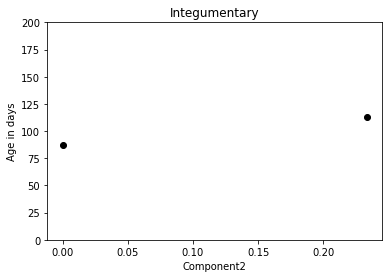

Component  3 (nan, nan)


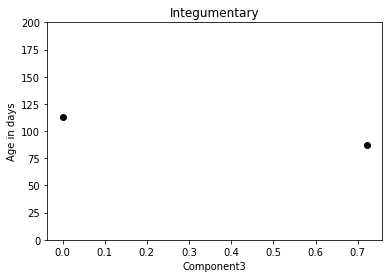

Component  4 (nan, nan)


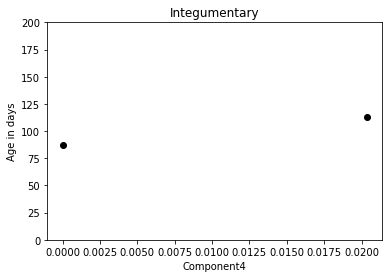

Component  5 (nan, nan)


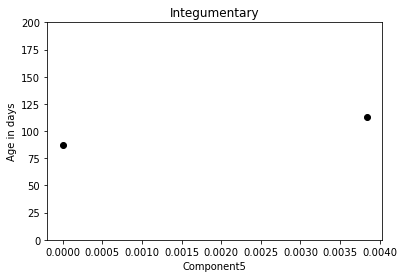

Component  6 (nan, nan)


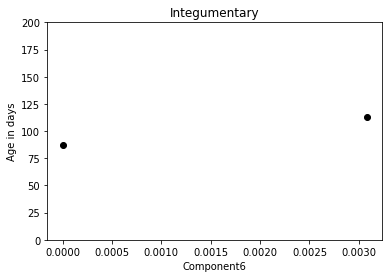

Component  7 (nan, nan)


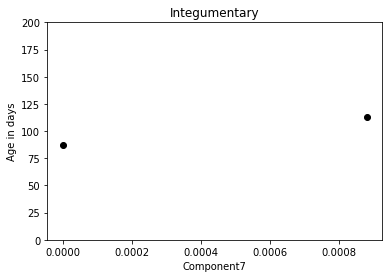

Component  8 (1.0, 0.0)


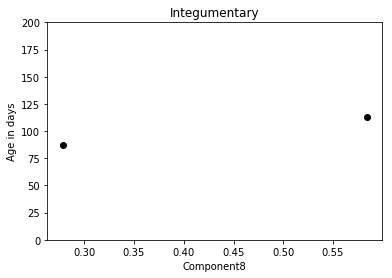

Component  9 (nan, nan)


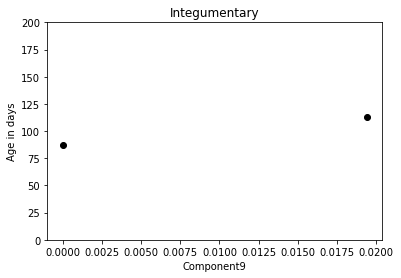

Component  10 (nan, nan)


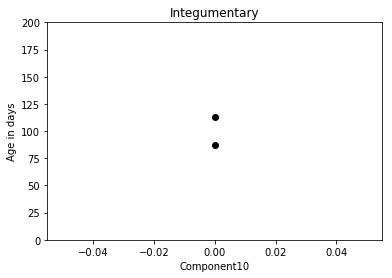

Component  11 (nan, nan)


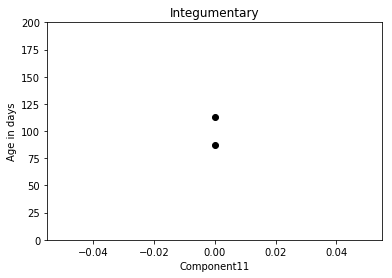

Component  12 (nan, nan)


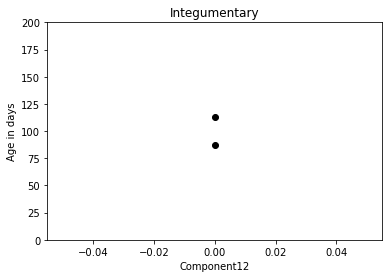

Component  13 (nan, nan)


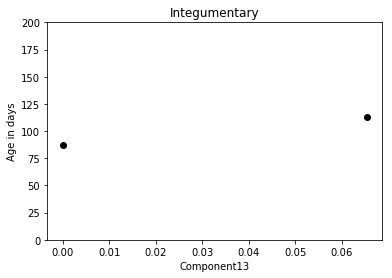

Component  14 (nan, nan)


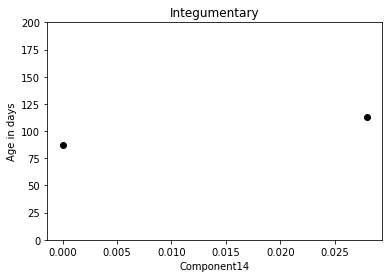

Component  15 (nan, nan)


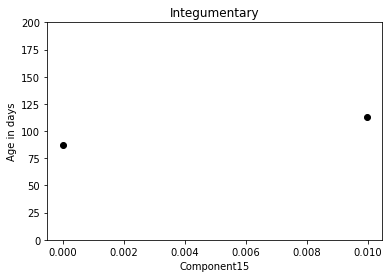

Component  16 (nan, nan)


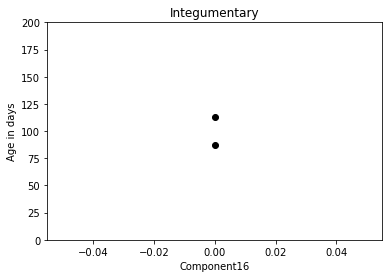

**************************************************
**************************************************
doing system:  Embryonic
Component  1 (nan, nan)


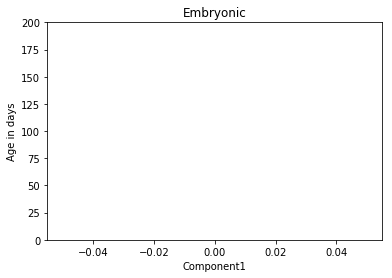

Component  2 (nan, nan)


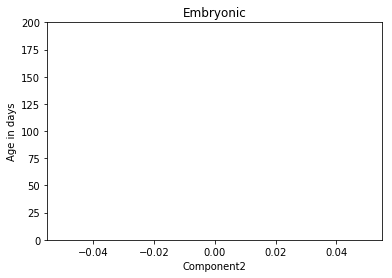

Component  3 (nan, nan)


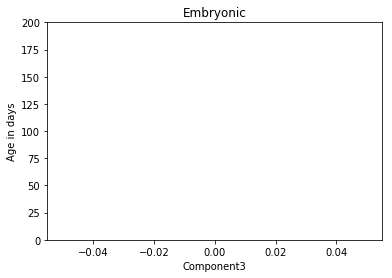

Component  4 (nan, nan)


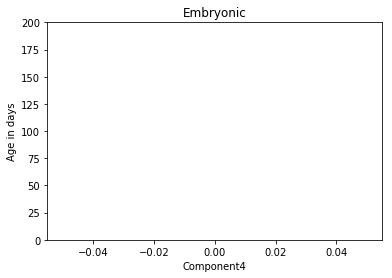

Component  5 (nan, nan)


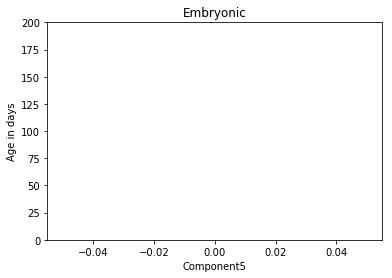

Component  6 (nan, nan)


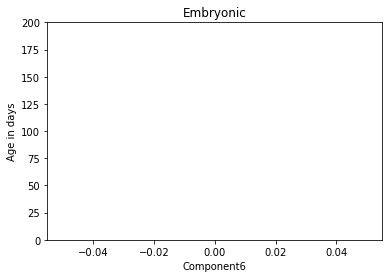

Component  7 (nan, nan)


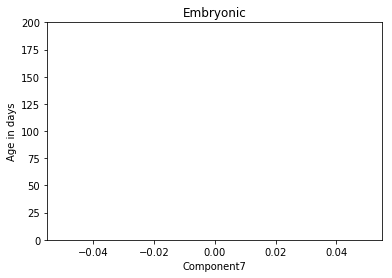

Component  8 (nan, nan)


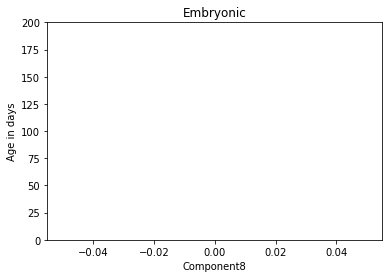

Component  9 (nan, nan)


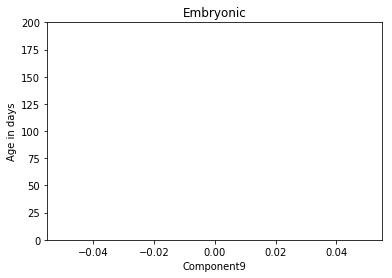

Component  10 (nan, nan)


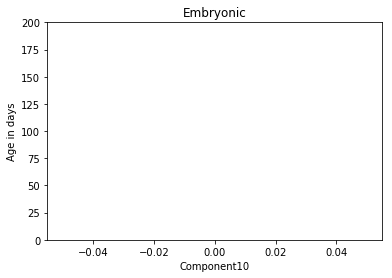

Component  11 (nan, nan)


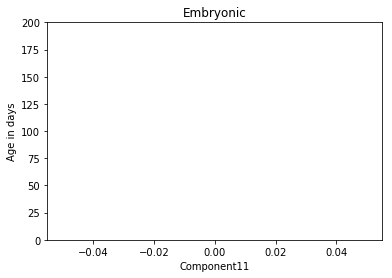

Component  12 (nan, nan)


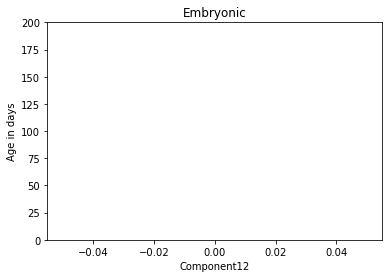

Component  13 (nan, nan)


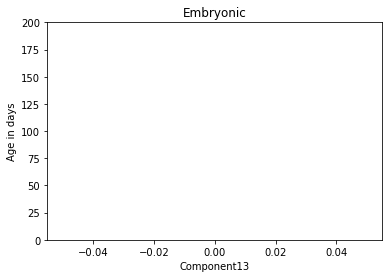

Component  14 (nan, nan)


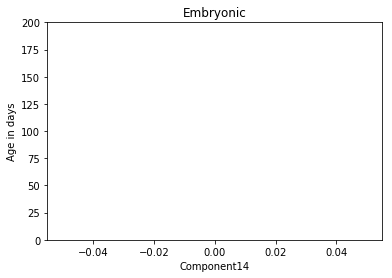

Component  15 (nan, nan)


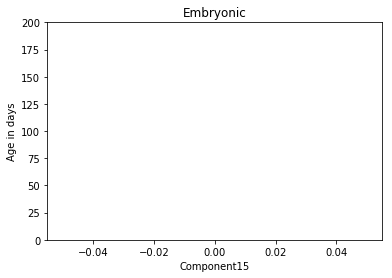

Component  16 (nan, nan)


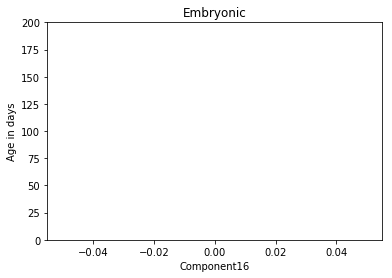

**************************************************
**************************************************
doing system:  Epithelial
Component  1 (nan, nan)


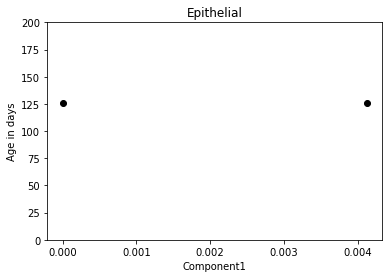

Component  2 (nan, nan)


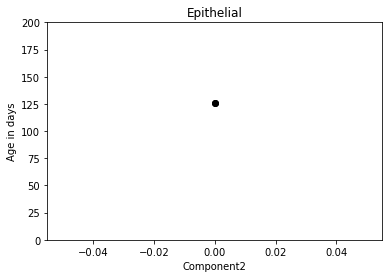

Component  3 (nan, nan)


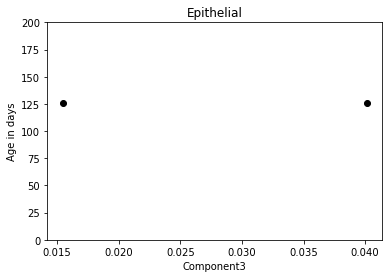

Component  4 (nan, nan)


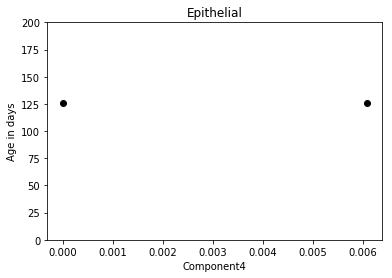

Component  5 (nan, nan)


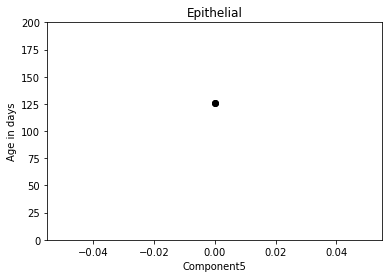

Component  6 (nan, nan)


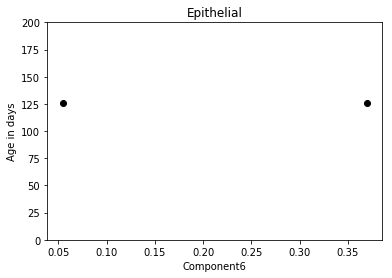

Component  7 (nan, nan)


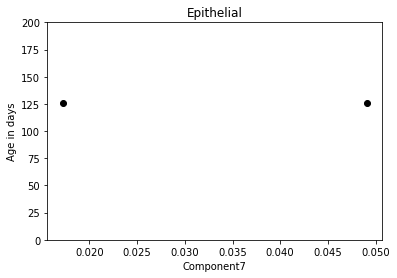

Component  8 (nan, nan)


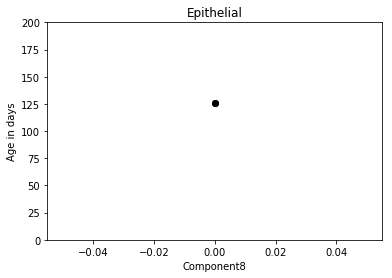

Component  9 (nan, nan)


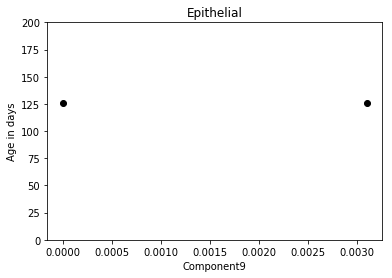

Component  10 (nan, nan)


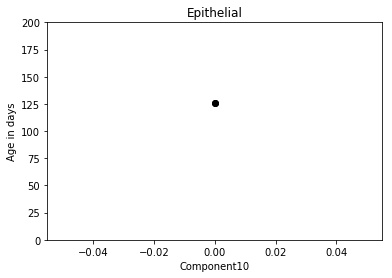

Component  11 (nan, nan)


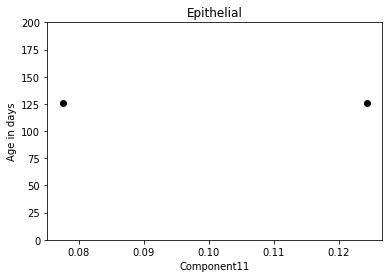

Component  12 (nan, nan)


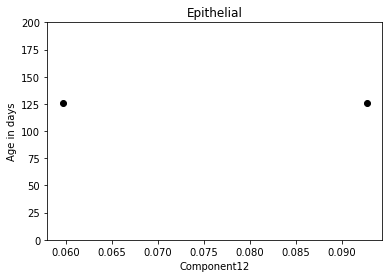

Component  13 (nan, nan)


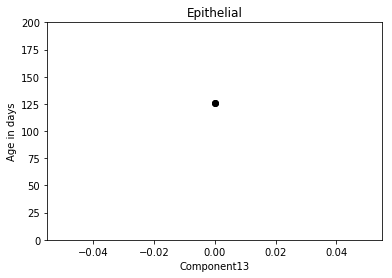

Component  14 (nan, nan)


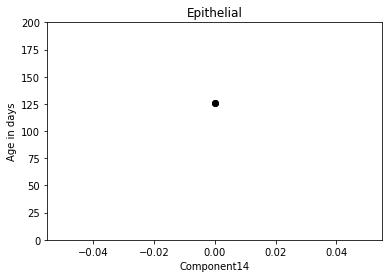

Component  15 (nan, nan)


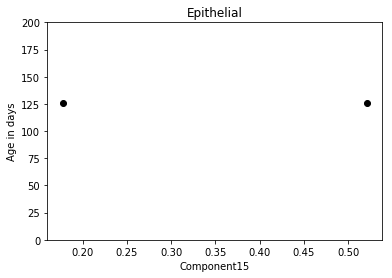

Component  16 (nan, nan)


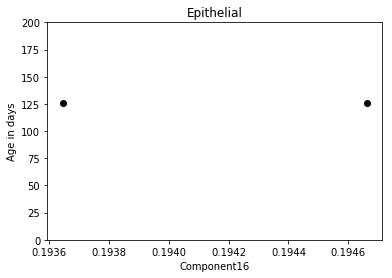

**************************************************
**************************************************
doing system:  Fetal Life Support
Component  1 (-1.0, 0.0)


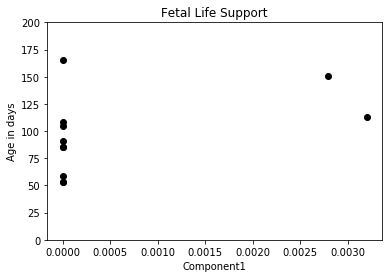

Component  2 (-1.0, 0.0)


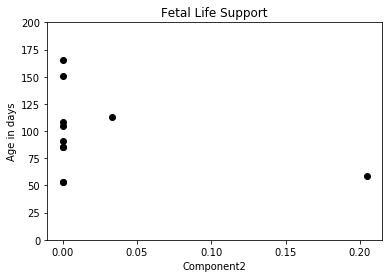

Component  3 (-0.20960605207847491, 0.56110592703818019)


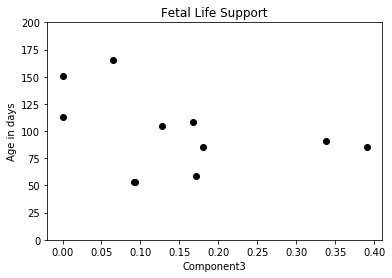

Component  4 (-0.29015252819180826, 0.63581751803701891)


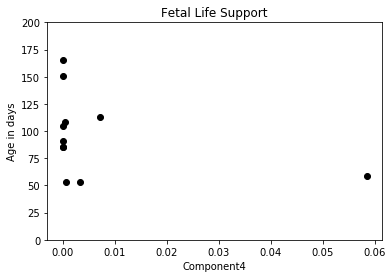

Component  5 (-0.74507311687072542, 0.089198015705109671)


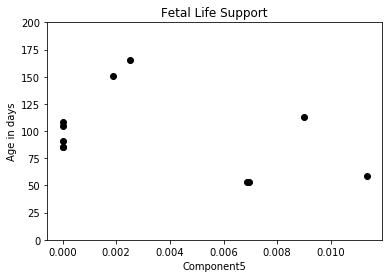

Component  6 (-0.76287013522164004, 0.23712986477836001)


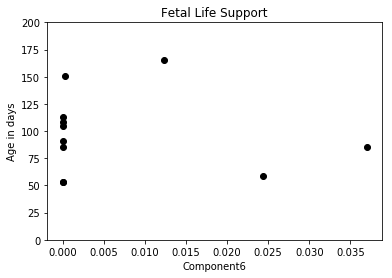

Component  7 (1.0, 0.0)


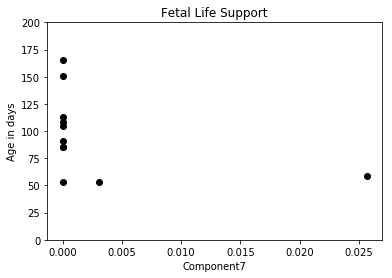

Component  8 (-0.74911656794875792, 0.4609565541594689)


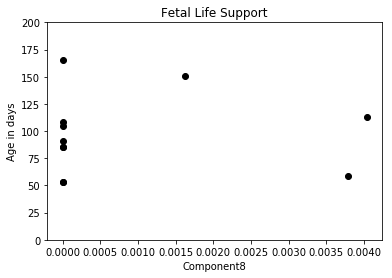

Component  9 (-0.90048833394184202, 0.099511666058157991)


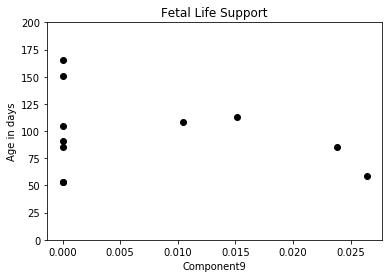

Component  10 (-0.93092196946115657, 0.069078030538843441)


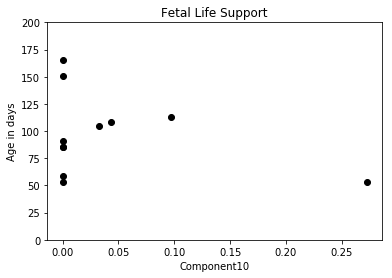

Component  11 (1.0, 0.0)


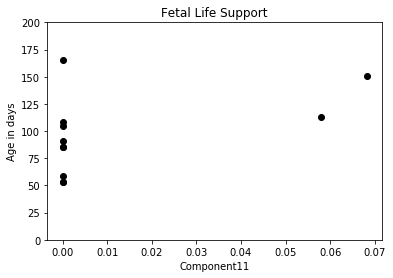

Component  12 (0.51933317486517339, 0.1015967612301822)


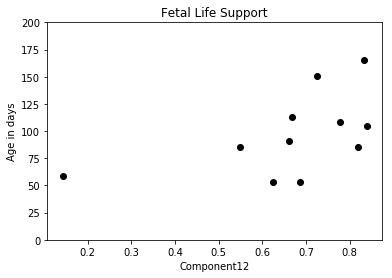

Component  13 (-0.374834864309392, 0.75539881318635838)


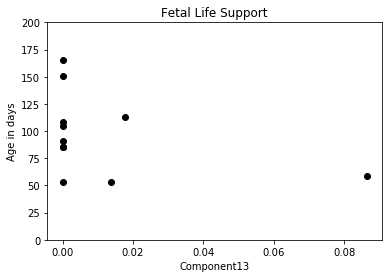

Component  14 (-0.92971433688215555, 0.24010745508326667)


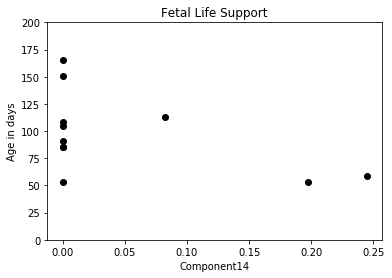

Component  15 (0.99999999999999989, nan)


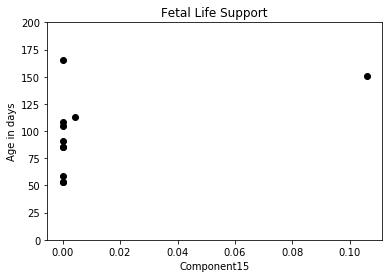

Component  16 (-1.0, 0.0)


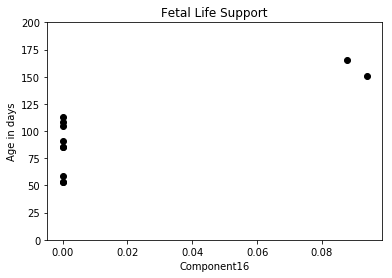

**************************************************
**************************************************
doing system:  Genitourinary
Component  1 (nan, nan)


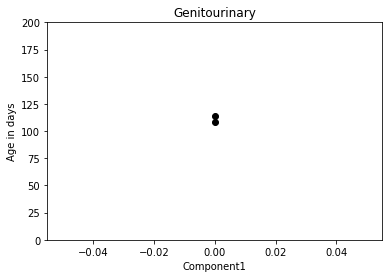

Component  2 (nan, nan)


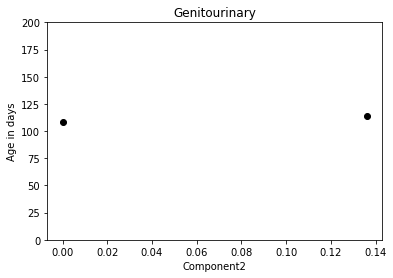

Component  3 (-1.0, 0.0)


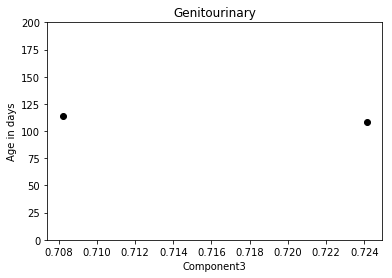

Component  4 (1.0, 0.0)


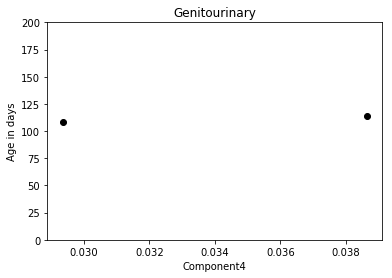

Component  5 (nan, nan)


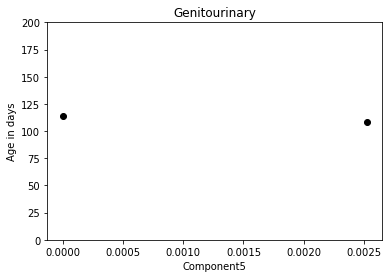

Component  6 (nan, nan)


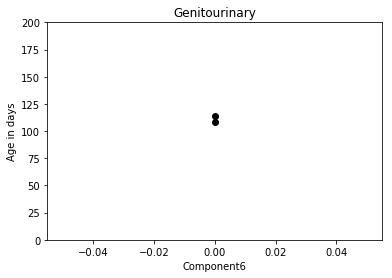

Component  7 (nan, nan)


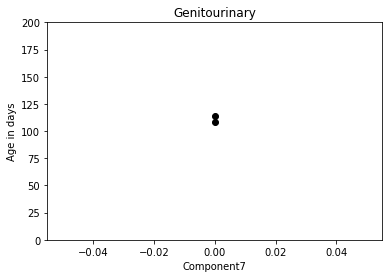

Component  8 (1.0, 0.0)


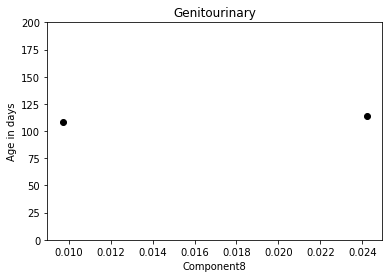

Component  9 (nan, nan)


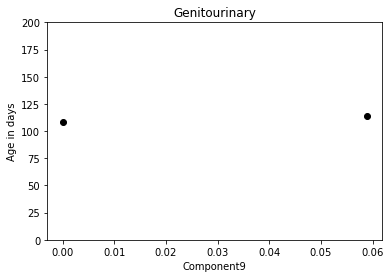

Component  10 (nan, nan)


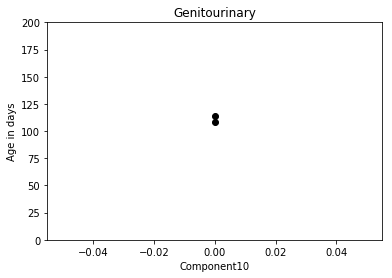

Component  11 (nan, nan)


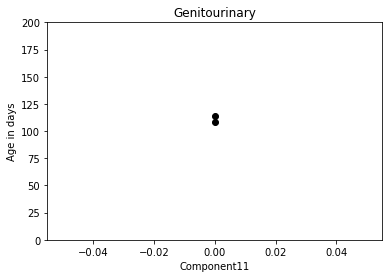

Component  12 (nan, nan)


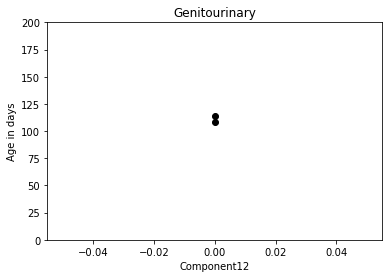

Component  13 (-1.0, 0.0)


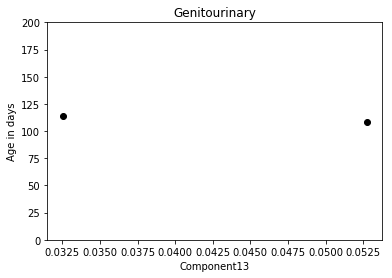

Component  14 (nan, nan)


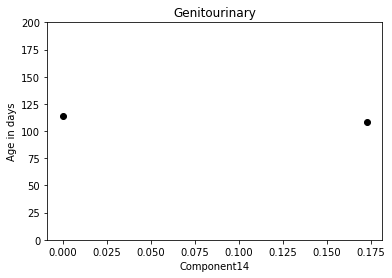

Component  15 (-1.0, 0.0)


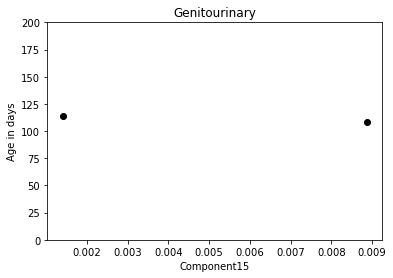

Component  16 (nan, nan)


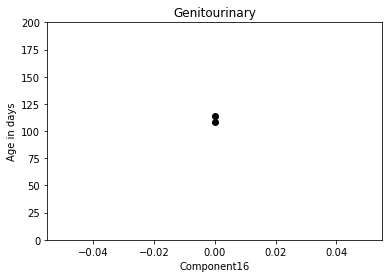

**************************************************
**************************************************
doing system:  Endocrine
Component  1 (0.35449479511081528, 0.49053187801109477)


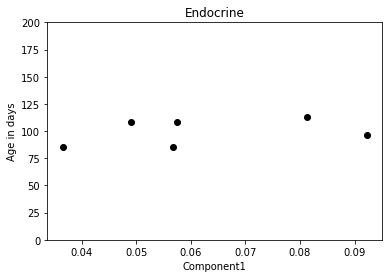

Component  2 (nan, nan)


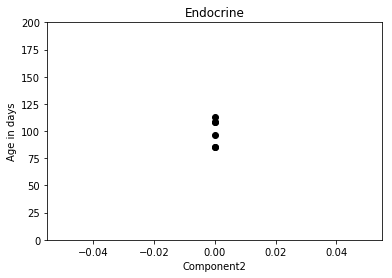

Component  3 (-0.26212991144427195, 0.61581087992911365)


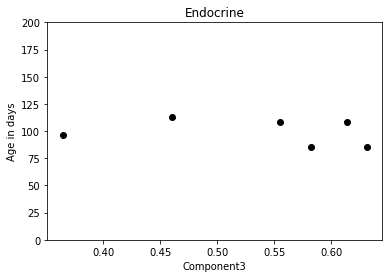

Component  4 (0.5453048496431373, 0.26311793597031541)


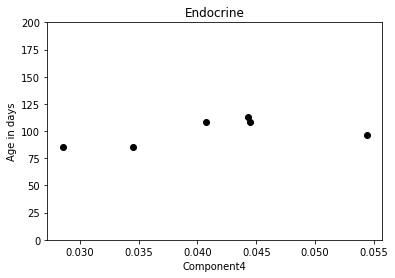

Component  5 (nan, nan)


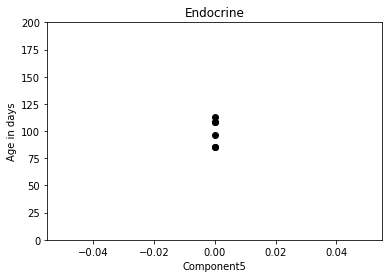

Component  6 (0.5095691994151923, 0.38048461097017339)


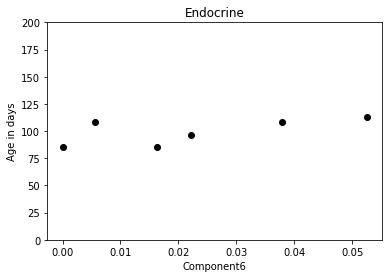

Component  7 (0.83786987071973451, 0.037298377445432698)


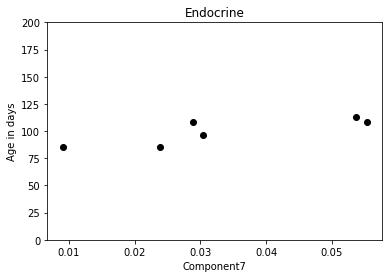

Component  8 (0.095652597047362731, 0.90434740295263716)


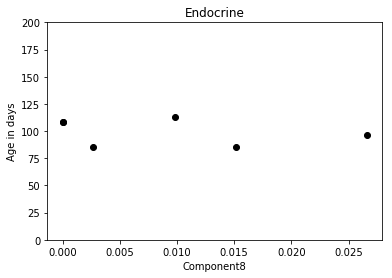

Component  9 (nan, nan)


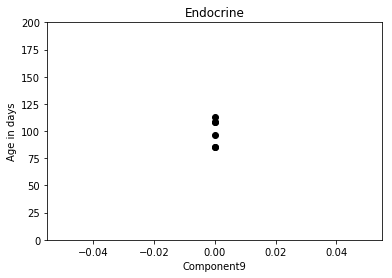

Component  10 (-0.68230211982832722, 0.20440492012820696)


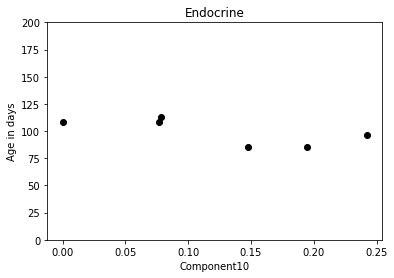

Component  11 (0.062990128084671027, 0.9056397726097537)


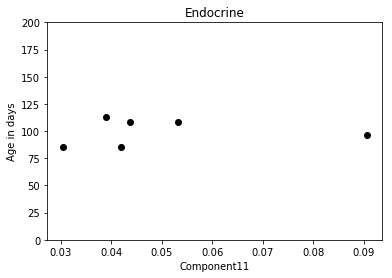

Component  12 (-0.92953251938210979, 0.240421553362965)


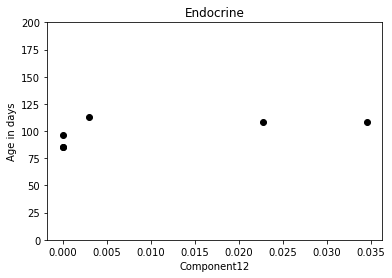

Component  13 (1.0, 0.0)


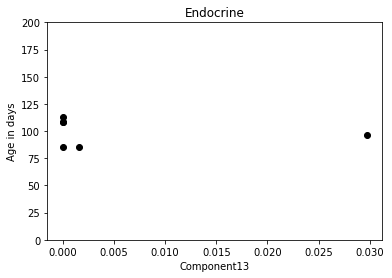

Component  14 (0.11578807662169022, 0.8529041280263665)


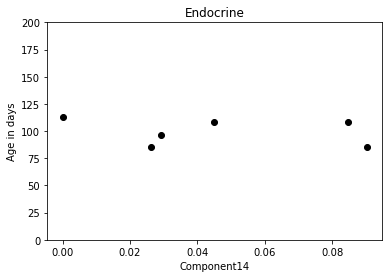

Component  15 (-1.0, 0.0)


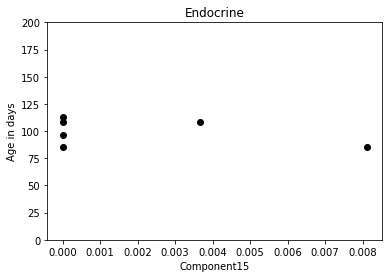

Component  16 (0.75557299287684709, 0.082315250499077064)


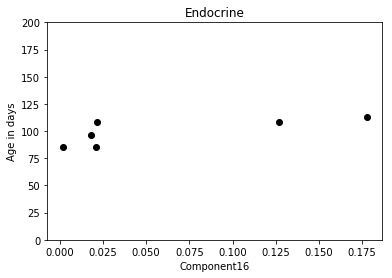

**************************************************
**************************************************
doing system:  Hepatic
Component  1 (nan, nan)


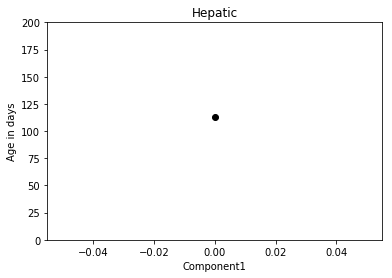

Component  2 (nan, nan)


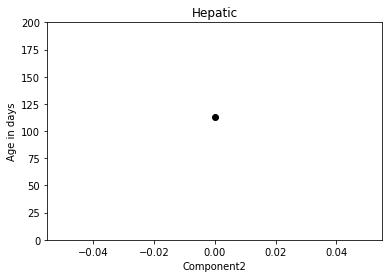

Component  3 (nan, nan)


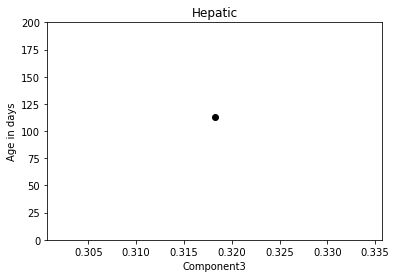

Component  4 (nan, nan)


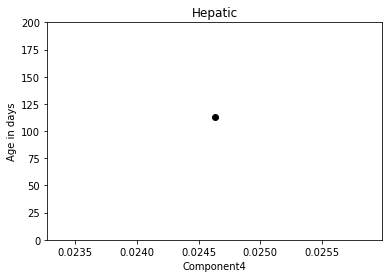

Component  5 (nan, nan)


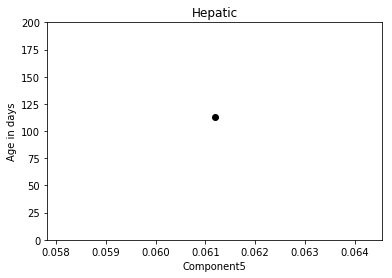

Component  6 (nan, nan)


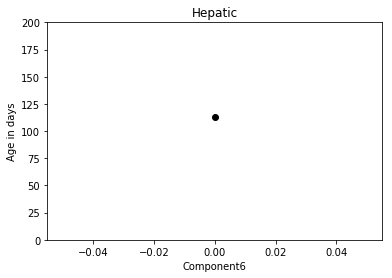

Component  7 (nan, nan)


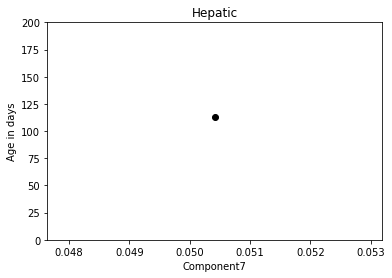

Component  8 (nan, nan)


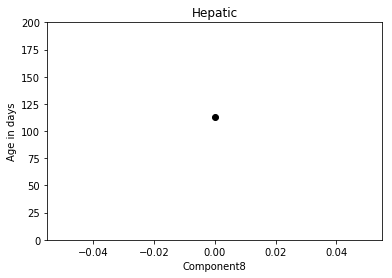

Component  9 (nan, nan)


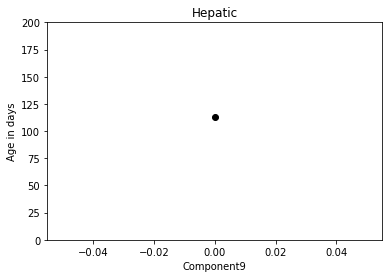

Component  10 (nan, nan)


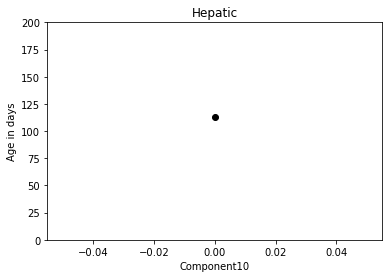

Component  11 (nan, nan)


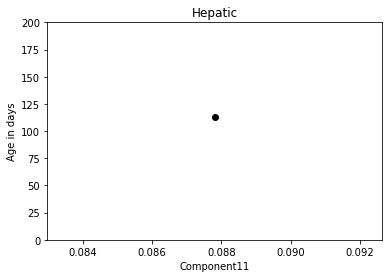

Component  12 (nan, nan)


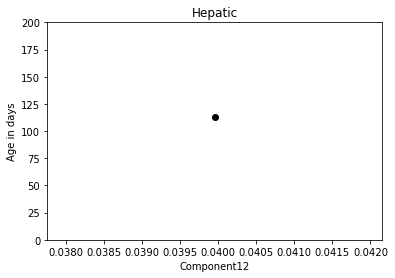

Component  13 (nan, nan)


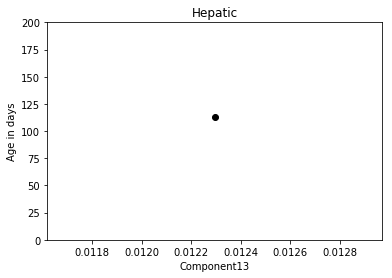

Component  14 (nan, nan)


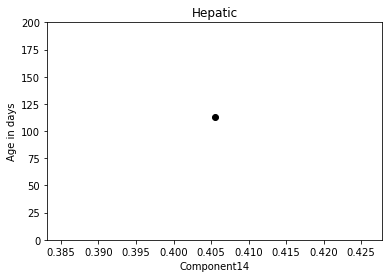

Component  15 (nan, nan)


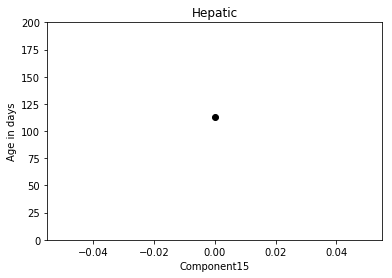

Component  16 (nan, nan)


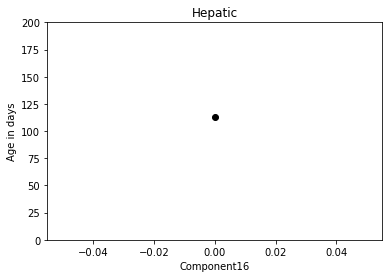

In [66]:
for system in SystemType:
    SystemCut = MetaData.system.values[rosetta] ==  str(system)
    print('*'*50)
    print('*'*50)
    print('doing system: ',system)
    for i in range(16):
        plt.clf()
        plt.ylim([0,200])
        plt.ylabel('Age in days')
        plt.xlabel('Component'+str(i+1))
        plt.title(system)
        plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)*SystemCut], dayage[(dayage>0) * (dayage<200)*SystemCut], 'ok')
        print('Component ',(i+1), pearsonr(a.NormedBasis[:,i][(dayage>0) * (dayage<200) *( a.NormedBasis[:,i] > 0) * SystemCut], dayage[(dayage>0) * (dayage<200) * (a.NormedBasis[:,i]>0) * SystemCut]))
        plt.show()

**************************************************
**************************************************
doing system:  Hematopoietic
Component  1 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


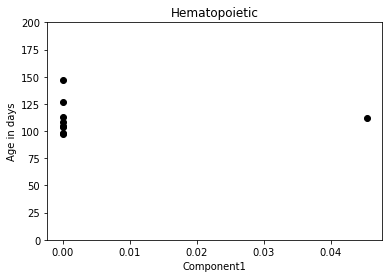

Component  2 (-0.98681786182428644, 0.10348235062967678)


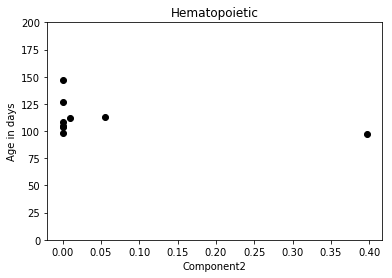

Component  3 (-0.10715849373673714, 0.78377668256767885)


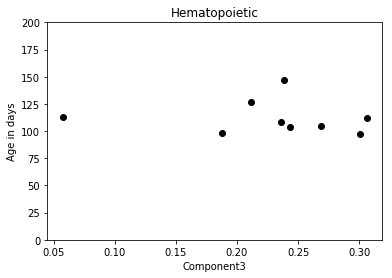

Component  4 (-0.26808322193084727, 0.73191677806915256)


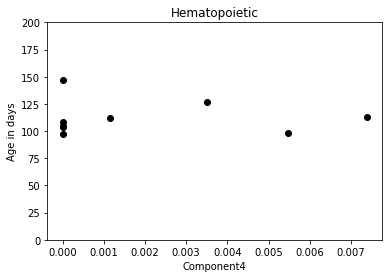

Component  5 (-0.13074488129941703, 0.75763274843811124)


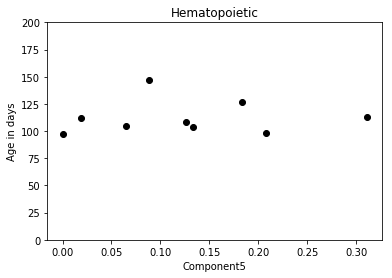

Component  6 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()


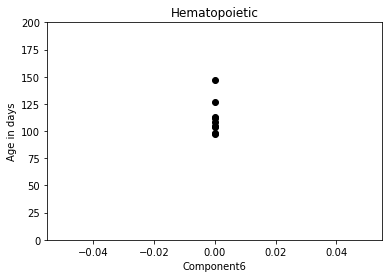

Component  7 (nan, nan)


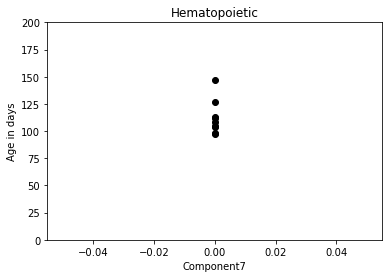

Component  8 (nan, nan)


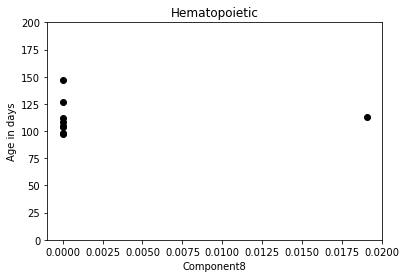

Component  9 (-1.0, 0.0)


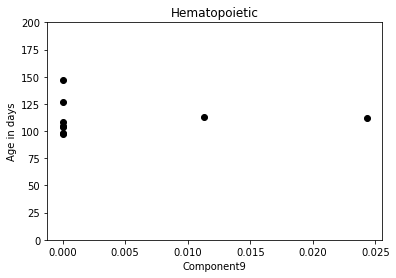

Component  10 (nan, nan)


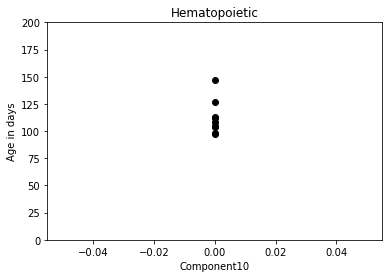

Component  11 (1.0, 0.0)


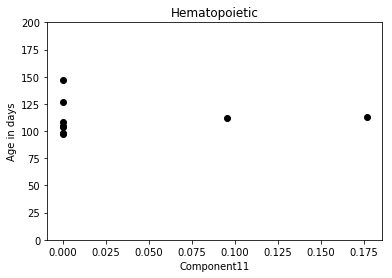

Component  12 (nan, nan)


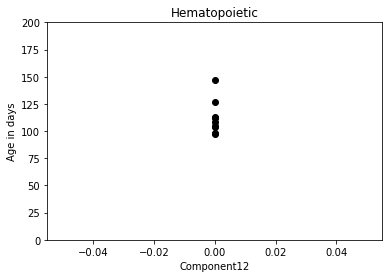

Component  13 (-0.046089005492779847, 0.97064843013692748)


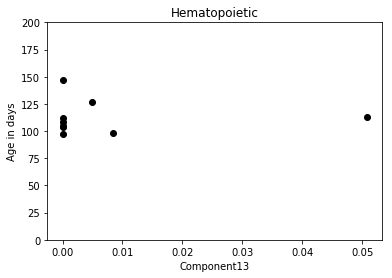

Component  14 (-0.87587508305344153, 0.3205698756739358)


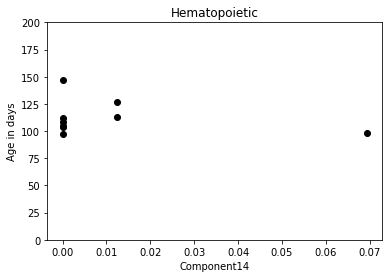

Component  15 (nan, nan)


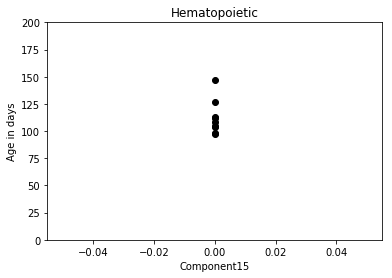

Component  16 (nan, nan)


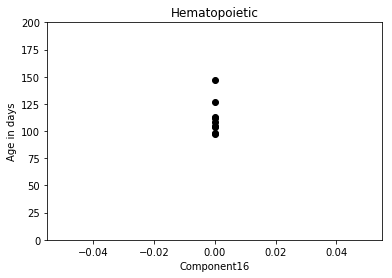

**************************************************
**************************************************
doing system:  Connective
Component  1 (0.51727497229510044, 0.23445316226884569)


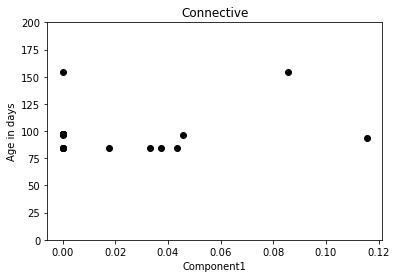

Component  2 (-0.2629608038677459, 0.32512384389519572)


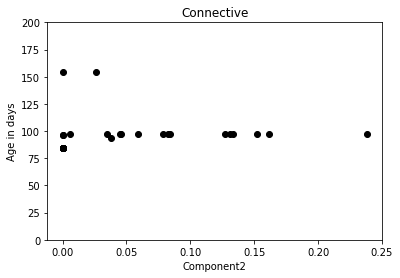

Component  3 (0.15403634209247735, 0.4524679091706354)


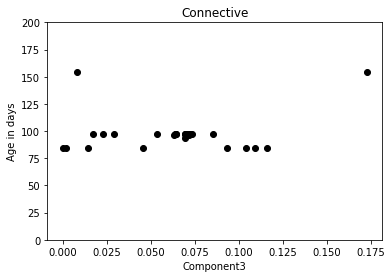

Component  4 (-0.31776237495881948, 0.48736715927895879)


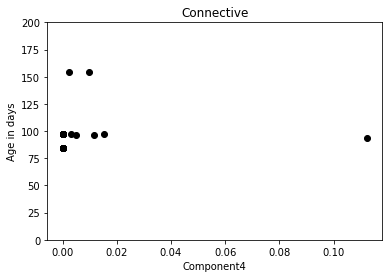

Component  5 (0.94948364292119181, 0.050516357078808201)


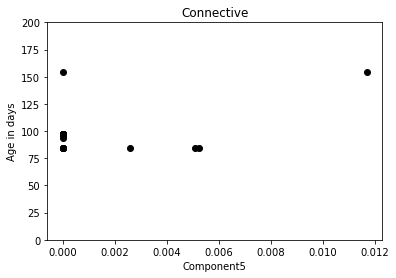

Component  6 (-0.26712786041211384, 0.17798486435989527)


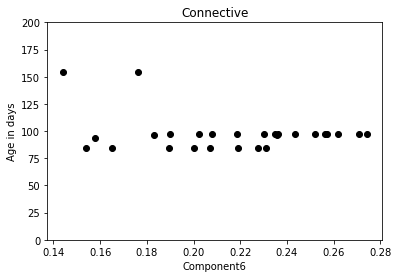

Component  7 (0.75627084060557204, 0.24372915939442799)


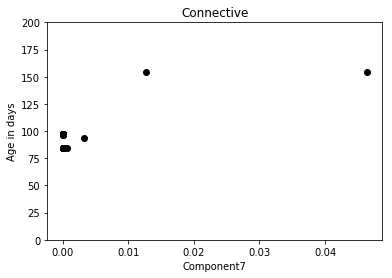

Component  8 (nan, nan)


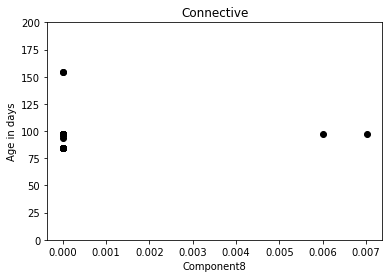

Component  9 (0.625586223319748, 0.03953174987007075)


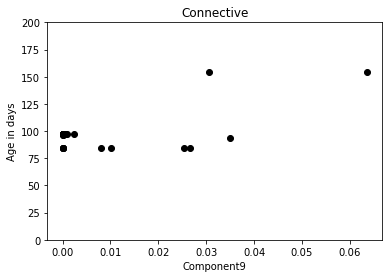

Component  10 (0.42807703980318157, 0.57192296019681843)


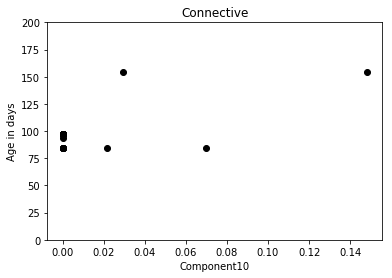

Component  11 (0.59246207445933852, 0.59631200191451927)


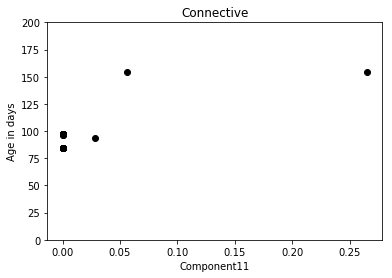

Component  12 (0.48473596407808622, 0.67783138951134159)


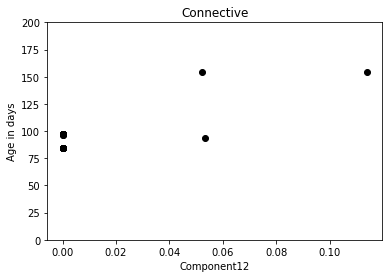

Component  13 (0.3730521772480524, 0.23233314517156686)


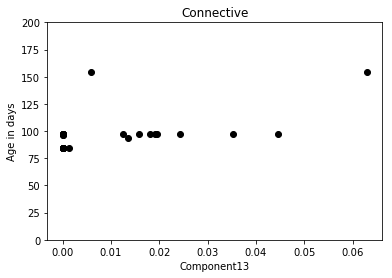

Component  14 (-0.13546643821339632, 0.79804332554213742)


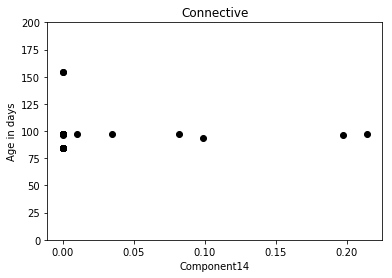

Component  15 (0.16188245524104666, 0.53477434238820387)


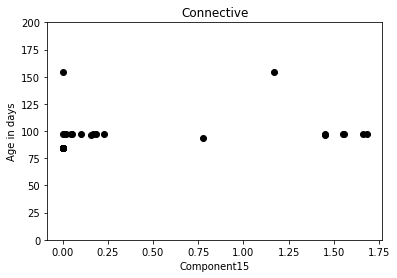

Component  16 (0.36754840978299236, 0.47350377962055762)


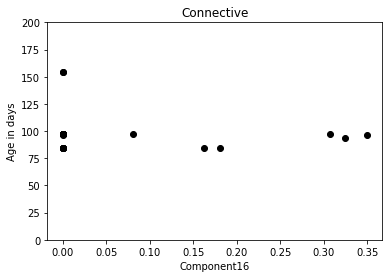

**************************************************
**************************************************
doing system:  Renal
Component  1 (0.37491979297584493, 0.75534049287581251)


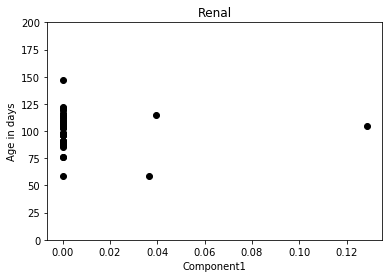

Component  2 (0.2255572707809794, 0.71526566372825295)


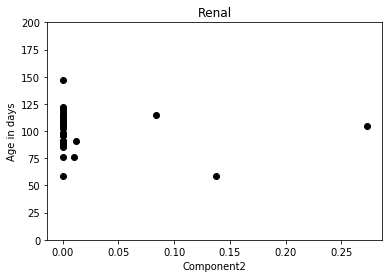

Component  3 (0.43338012707816376, 0.0003882060999921227)


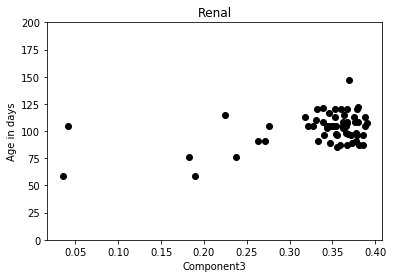

Component  4 (0.71972346740178361, 0.10682384972627837)


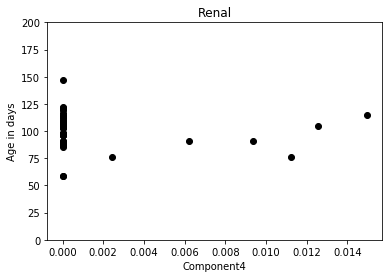

Component  5 (-0.366077254764892, 0.37246339010199447)


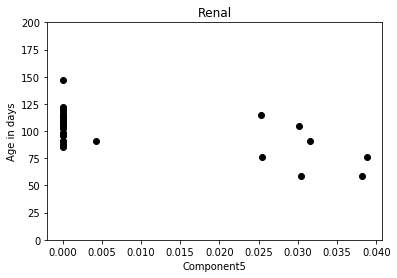

Component  6 (-0.74900900536918147, 0.086588944569014531)


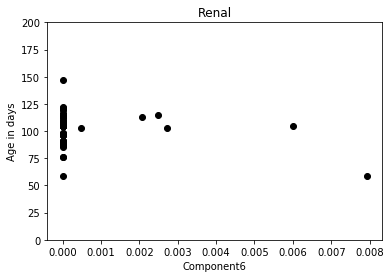

Component  7 (-0.058982140557344423, 0.88019037051735804)


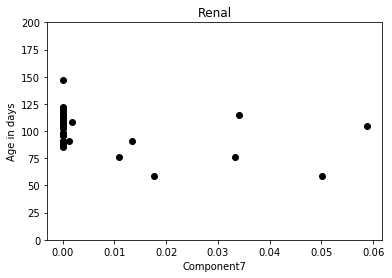

Component  8 (-0.11308736076460113, 0.83109208191144357)


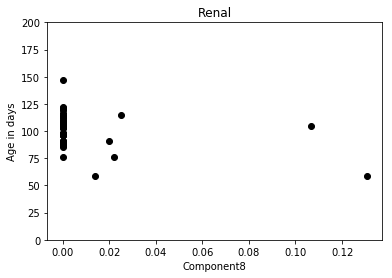

Component  9 (-0.014625407022865491, 0.96042267703589068)


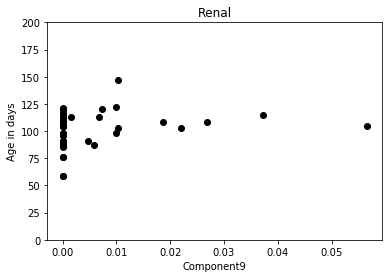

Component  10 (-0.29403110019053513, 0.44249803395402898)


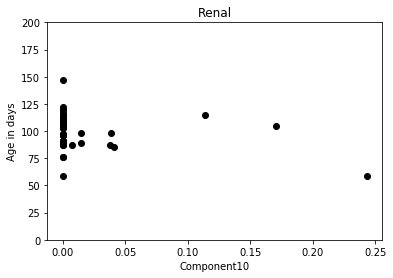

Component  11 (-1.0, 0.0)


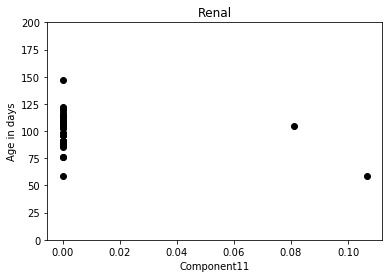

Component  12 (-0.82552523538560796, 0.085158318589601198)


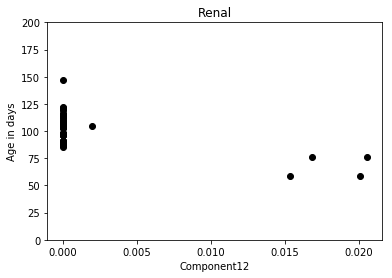

Component  13 (-0.47534873715805859, 8.2551104749626524e-05)


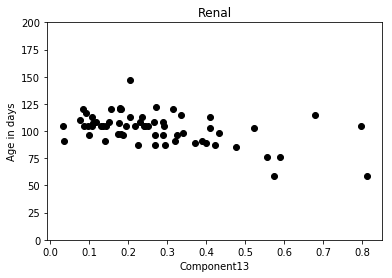

Component  14 (-0.86709870775607778, 0.011498318016091762)


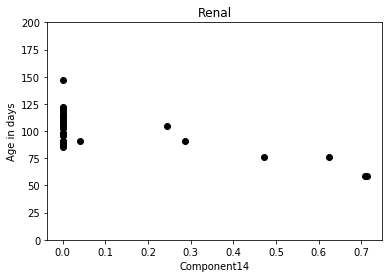

Component  15 (nan, nan)


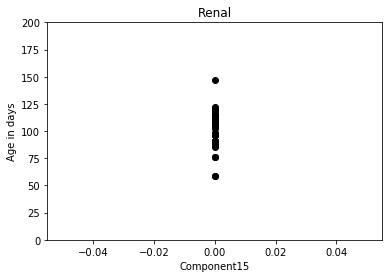

Component  16 (1.0, 0.0)


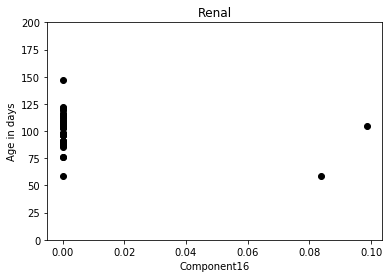

**************************************************
**************************************************
doing system:  Musculoskeletal
Component  1 (-0.20410184736868633, 0.59837199639912531)


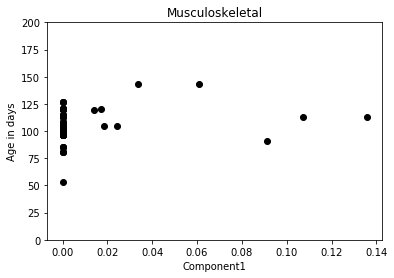

Component  2 (-0.1367657813474823, 0.2974097908321523)


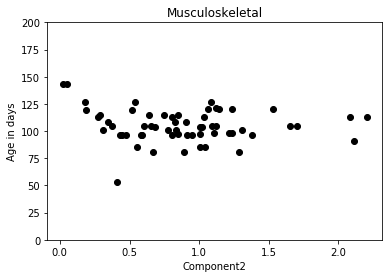

Component  3 (-0.055390418508203462, 0.67962477105349395)


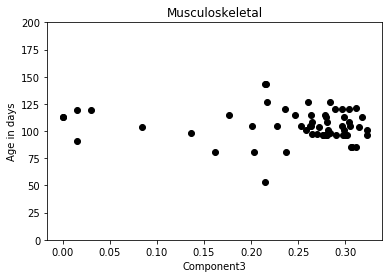

Component  4 (-0.24893829421581923, 0.35250898189533658)


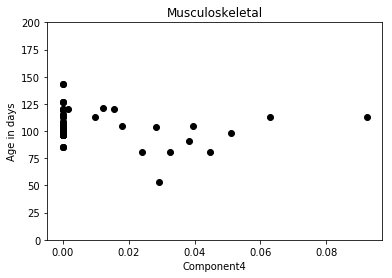

Component  5 (-0.079554739992086634, 0.78689730162465432)


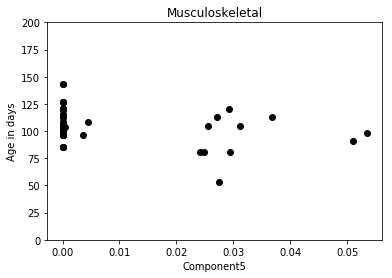

Component  6 (0.41095025654633882, 0.27186765698739906)


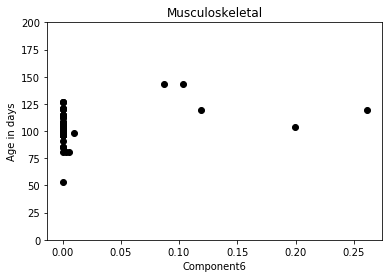

Component  7 (0.47439746645589098, 0.19696195241621345)


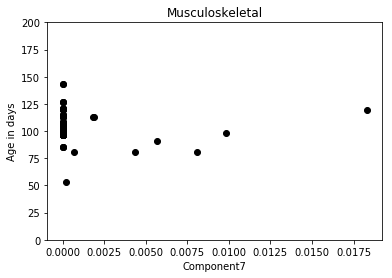

Component  8 (-0.0023067337804081461, 0.99403275941273606)


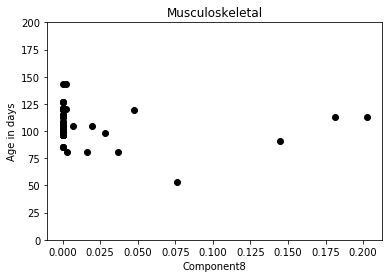

Component  9 (-0.097655655969695693, 0.73979711765967249)


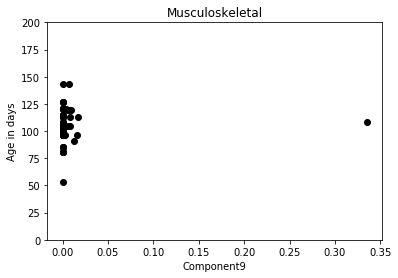

Component  10 (0.05526476446941285, 0.91718724795720885)


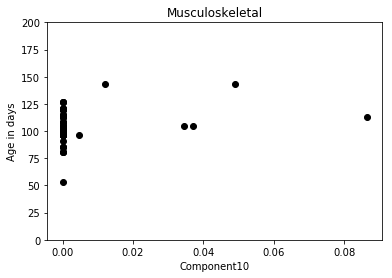

Component  11 (0.78204488945689521, 0.21795511054310482)


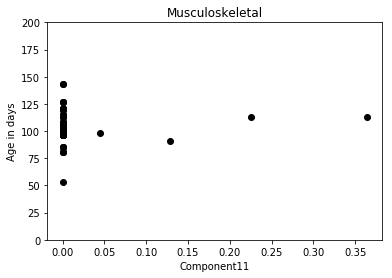

Component  12 (0.61239775157924203, 0.19623744509724439)


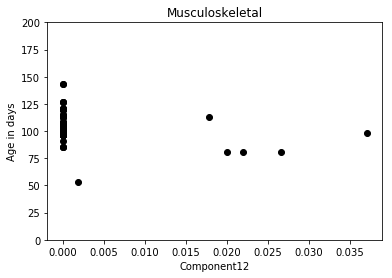

Component  13 (-0.63634526696354232, 0.0060265267943631741)


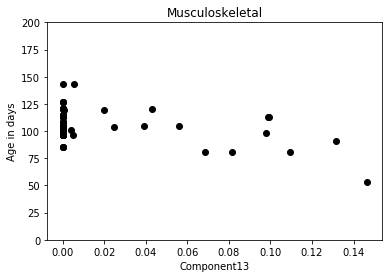

Component  14 (-0.86195425050098917, 0.0028044261806166797)


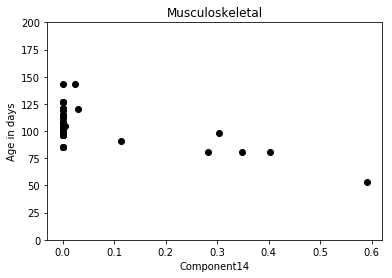

Component  15 (0.45221098569066526, 0.36792091348066047)


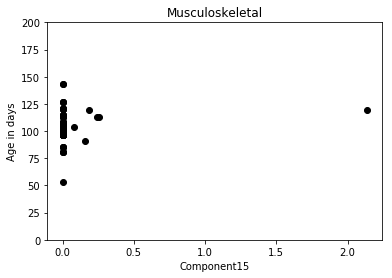

Component  16 (1.0, 0.0)


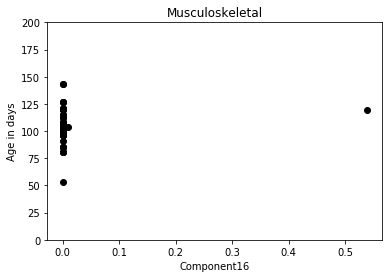

**************************************************
**************************************************
doing system:  Nervous
Component  1 (0.58339281093028228, 0.41660718906971778)


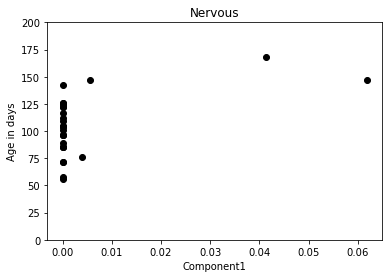

Component  2 (0.049943781891512662, 0.90651101597084005)


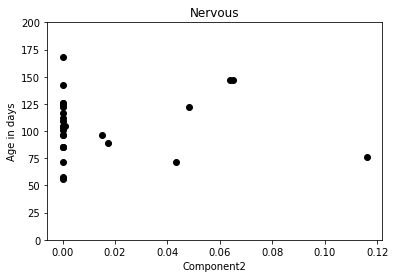

Component  3 (-0.057629612297673612, 0.77975776560049948)


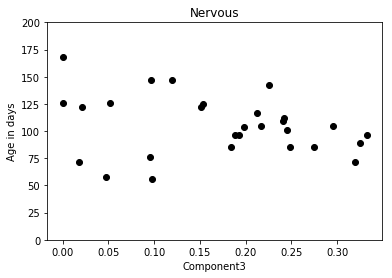

Component  4 (0.40298298841691993, 0.219114418675494)


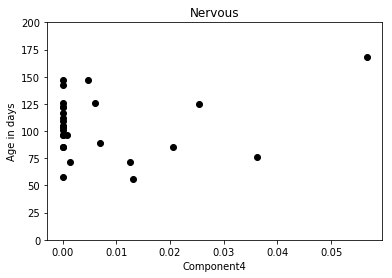

Component  5 (0.40284912792449357, 0.37021777323169763)


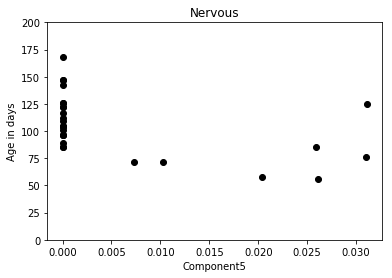

Component  6 (-0.82036601800591524, 0.088890214384708441)


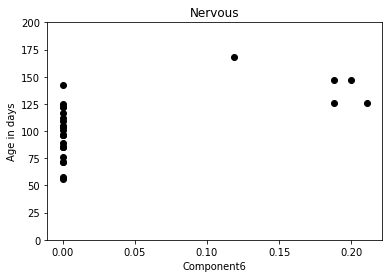

Component  7 (-0.4831072451228926, 0.5168927548771074)


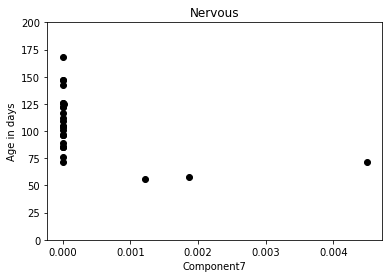

Component  8 (-0.37299430778915399, 0.055335852600570321)


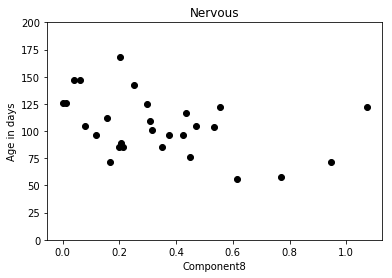

Component  9 (0.065369989127348677, 0.90208468698736166)


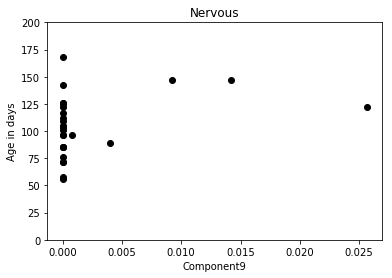

Component  10 (nan, nan)


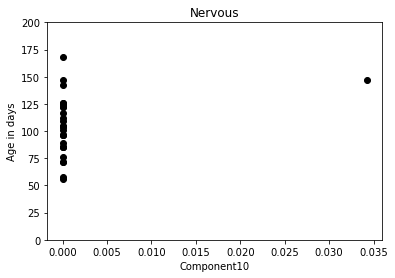

Component  11 (nan, nan)


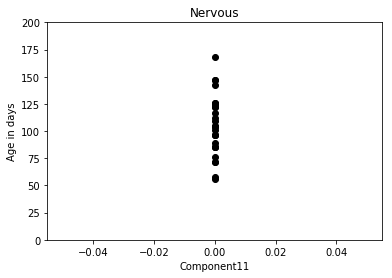

Component  12 (nan, nan)


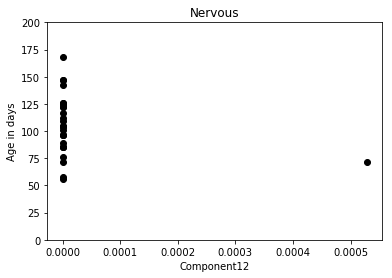

Component  13 (-0.34399877692628023, 0.30026598854510034)


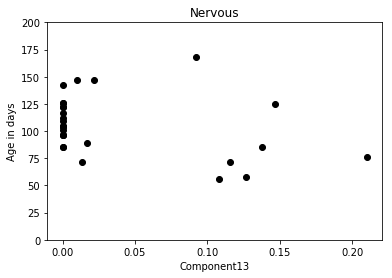

Component  14 (-0.33538261762405719, 0.34345235269308905)


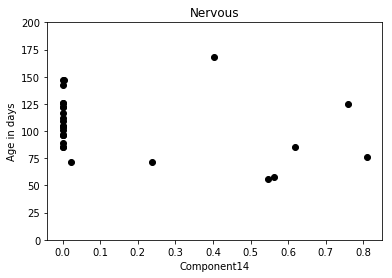

Component  15 (-0.35610747215266508, 0.7682073993313171)


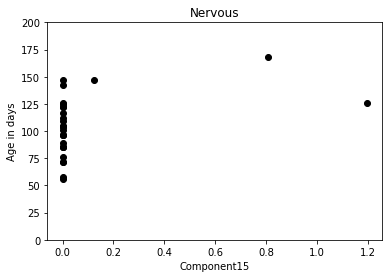

Component  16 (0.3697009188326939, 0.54023636931652219)


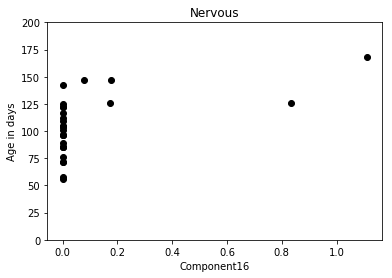

**************************************************
**************************************************
doing system:  Digestive
Component  1 (-0.45540494017589739, 0.44087790960173151)


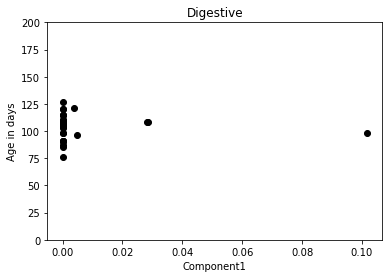

Component  2 (-0.81867433049214566, 0.0020594285432418685)


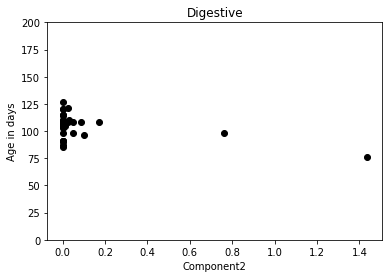

Component  3 (0.29055430450364844, 0.095510282540389707)


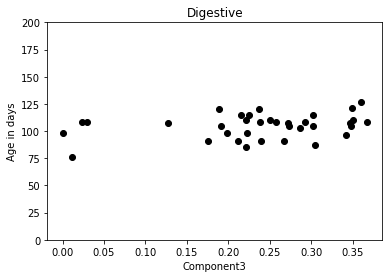

Component  4 (-0.74250638366142485, 0.0036484793900837757)


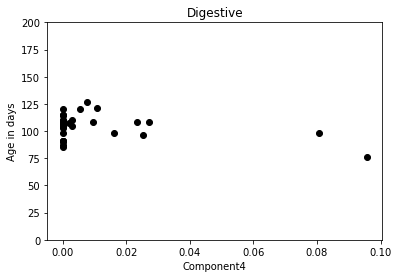

Component  5 (-0.22585156801327269, 0.48030121690333105)


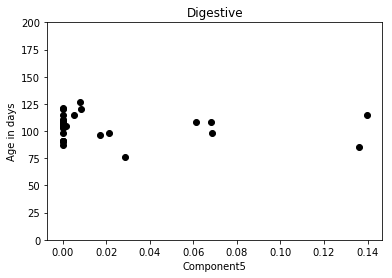

Component  6 (1.0, 0.0)


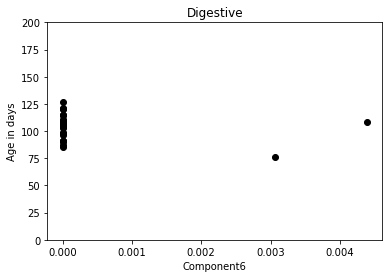

Component  7 (0.083280291004223433, 0.64496789795464815)


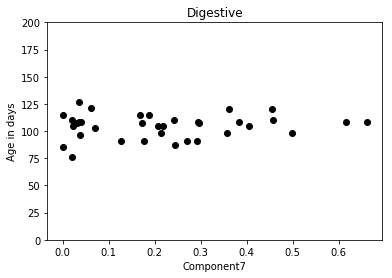

Component  8 (-0.97731233160102693, 0.022687668398973078)


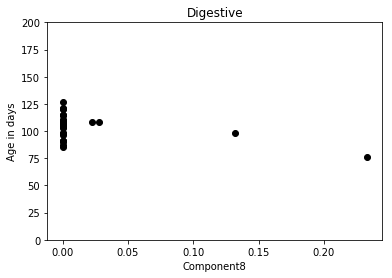

Component  9 (-0.36937395200174333, 0.17542496332537633)


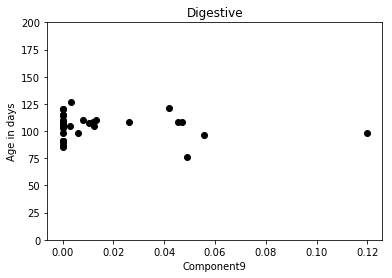

Component  10 (-0.68077496077721711, 0.043532402644019579)


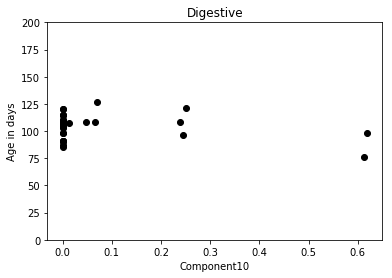

Component  11 (-0.99995540583494069, 0.0060122323106386391)


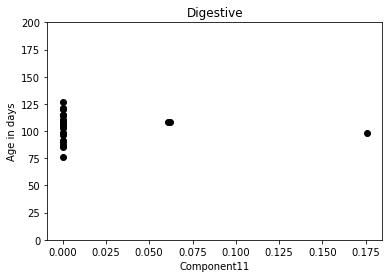

Component  12 (-0.85233066324941631, 0.066589814677480319)


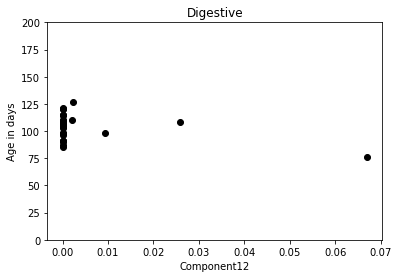

Component  13 (-0.50309192316650297, 0.066689190132896051)


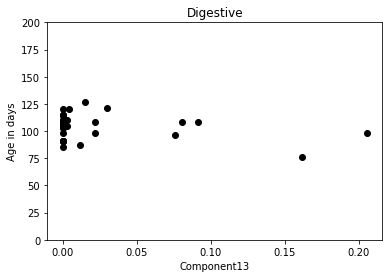

Component  14 (0.15060596458522624, 0.72185484506727327)


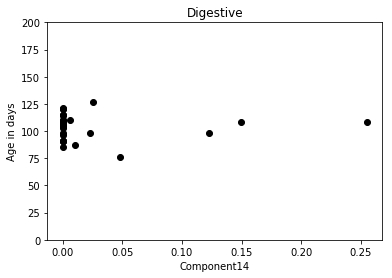

Component  15 (-0.85360901931324451, 0.030576876115651373)


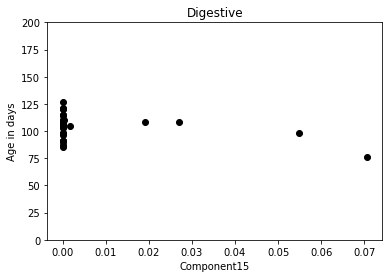

Component  16 (nan, nan)


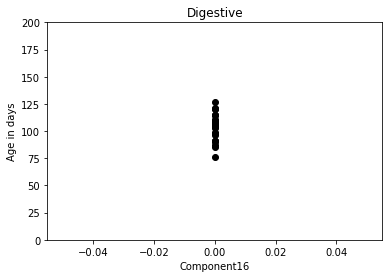

**************************************************
**************************************************
doing system:  Cardiovascular
Component  1 (-0.47657277272167115, 0.27960096458043637)


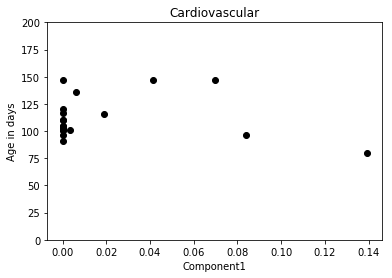

Component  2 (-0.54253924469491821, 0.20829547132364054)


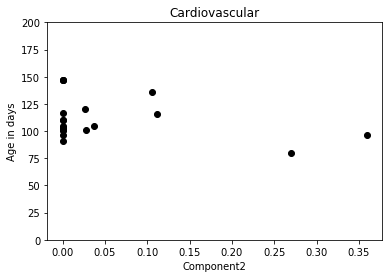

Component  3 (-0.41656274648237956, 0.060318012665456056)


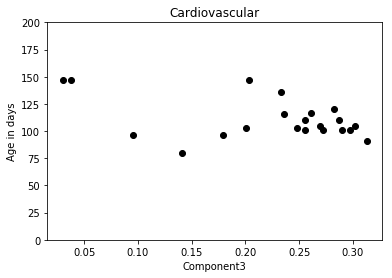

Component  4 (-0.1979571896513917, 0.41657232851435566)


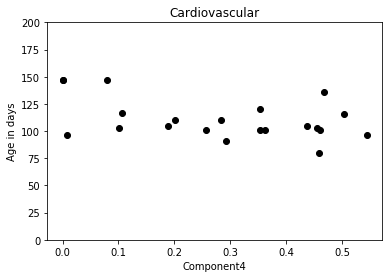

Component  5 (0.089796505642611935, 0.84817057982286115)


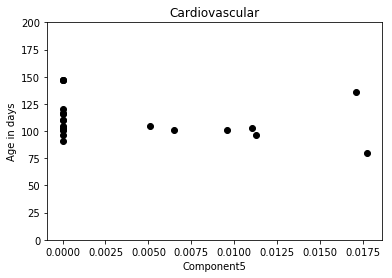

Component  6 (nan, nan)


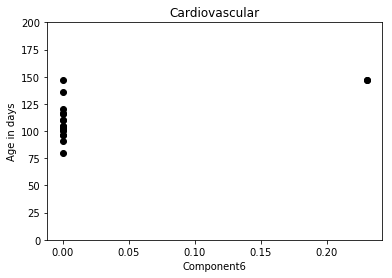

Component  7 (1.0, 0.0)


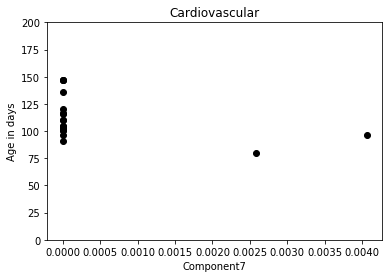

Component  8 (-0.70872631291909183, 0.49854023426066768)


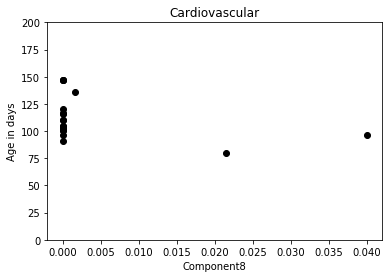

Component  9 (-0.63049095422200452, 0.12901886870494142)


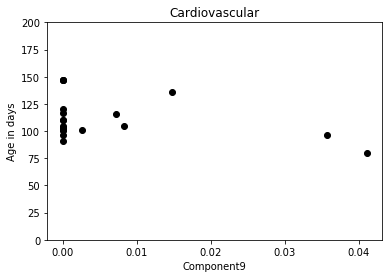

Component  10 (-0.68489907861808486, 0.20199161570687987)


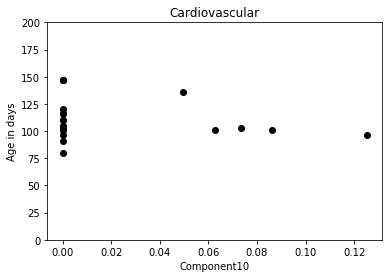

Component  11 (1.0, 0.0)


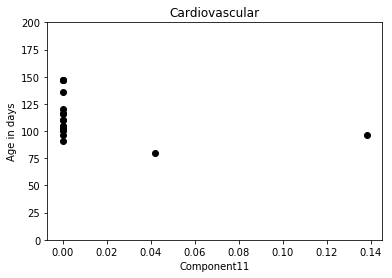

Component  12 (nan, nan)


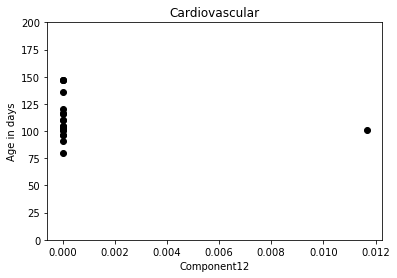

Component  13 (-0.87778001699283514, 0.12221998300716486)


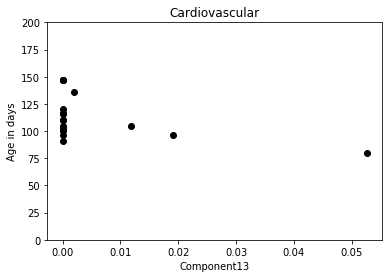

Component  14 (-0.75889202052324134, 0.45148202232843426)


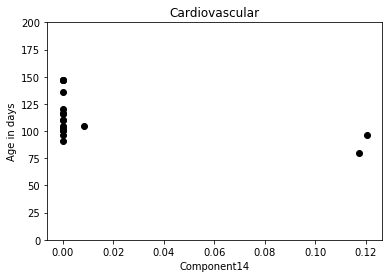

Component  15 (1.0, 0.0)


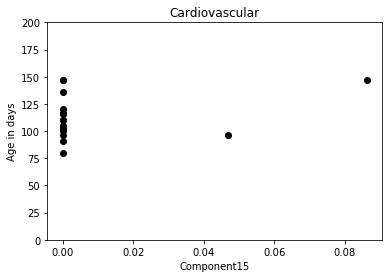

Component  16 (nan, nan)


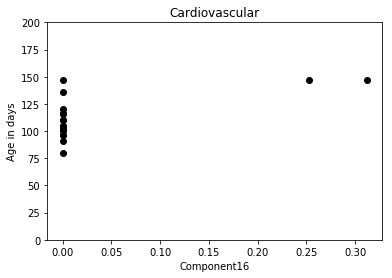

**************************************************
**************************************************
doing system:  Respiratory
Component  1 (-0.80214365403893761, 0.054847946047456013)


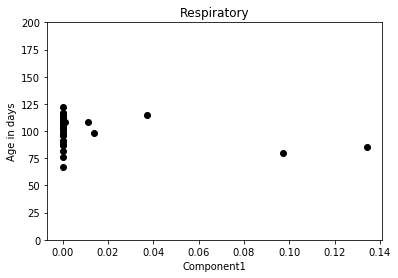

Component  2 (-0.59087996312985436, 0.1624058065399698)


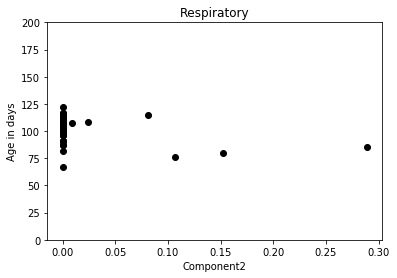

Component  3 (0.04107517263874353, 0.81476956882497786)


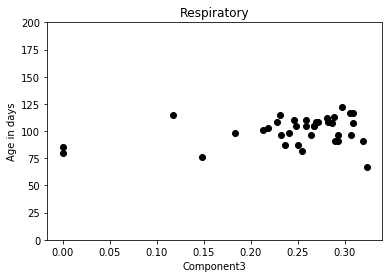

Component  4 (-0.45824016487550856, 0.15634725196607813)


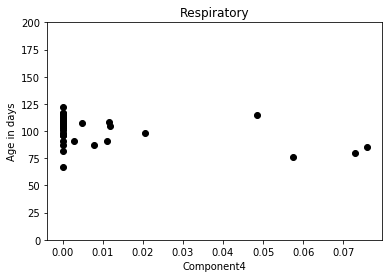

Component  5 (-0.019302408789924667, 0.95779170920659829)


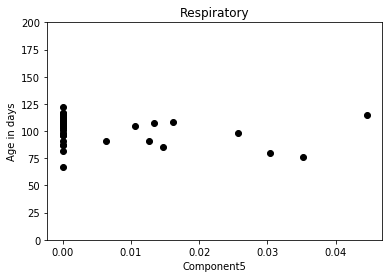

Component  6 (-0.086712883039147037, 0.88973224449158139)


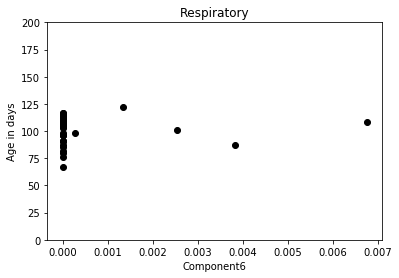

Component  7 (-0.62791825013502056, 0.051910311322838028)


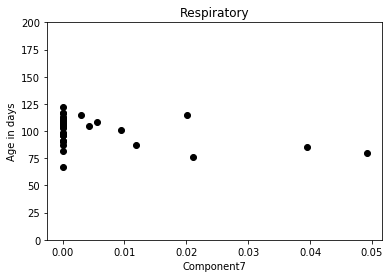

Component  8 (-0.3868674818193884, 0.44864931829086591)


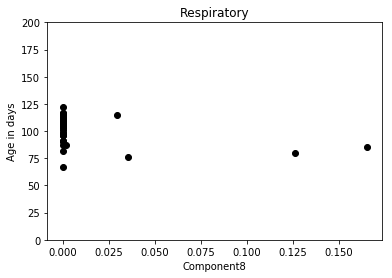

Component  9 (0.0079806086652598699, 0.96260992776283083)


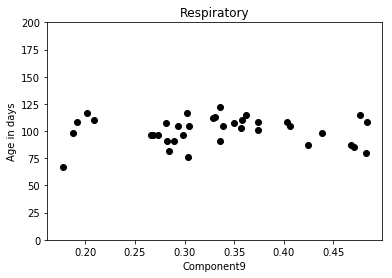

Component  10 (-0.38461377926477303, 0.45152685836494477)


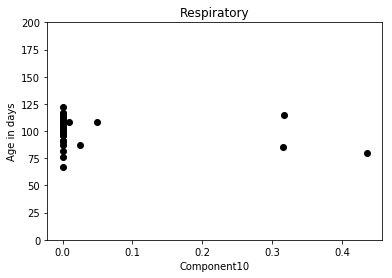

Component  11 (-0.71919926923119337, 0.48901766515791945)


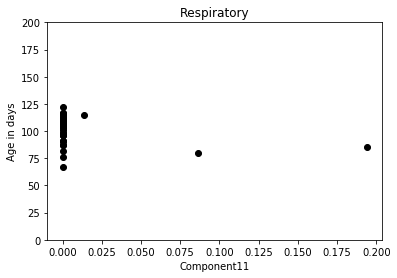

Component  12 (-0.97810217426755197, 0.021897825732448032)


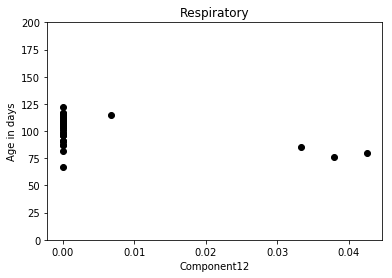

Component  13 (-0.43080146447050721, 0.16208166197924853)


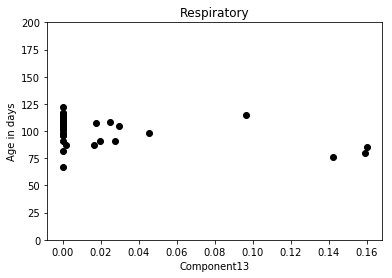

Component  14 (-0.64508642325618315, 0.060645164631446646)


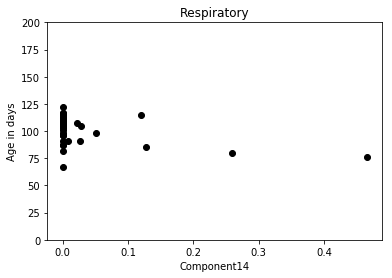

Component  15 (1.0, 0.0)


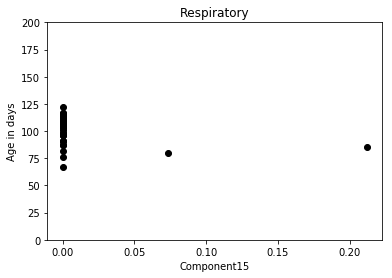

Component  16 (nan, nan)


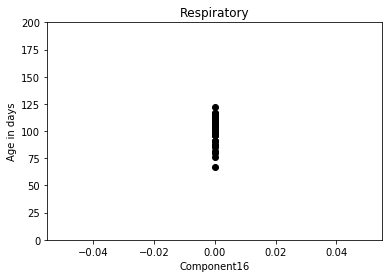

**************************************************
**************************************************
doing system:  Integumentary
Component  1 (nan, nan)


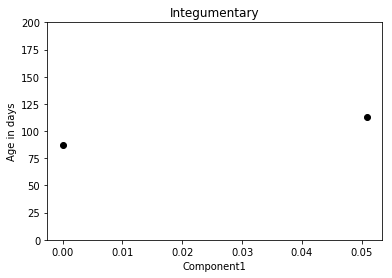

Component  2 (nan, nan)


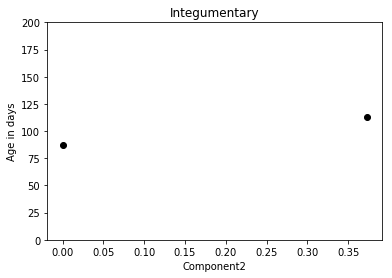

Component  3 (nan, nan)


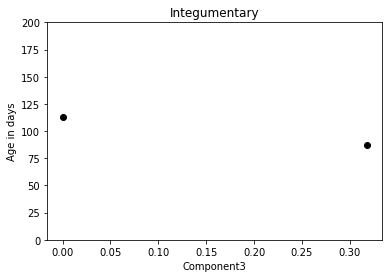

Component  4 (nan, nan)


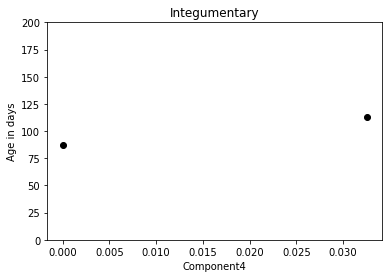

Component  5 (nan, nan)


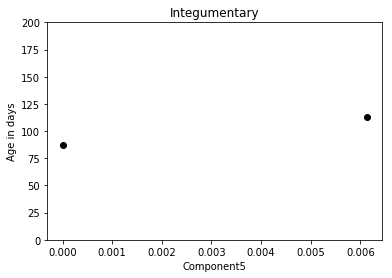

Component  6 (nan, nan)


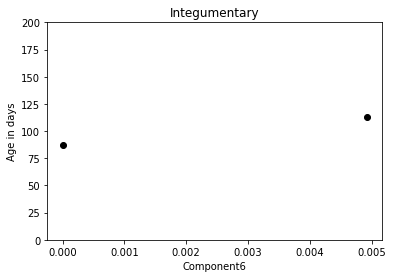

Component  7 (nan, nan)


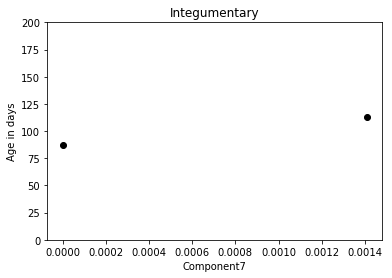

Component  8 (1.0, 0.0)


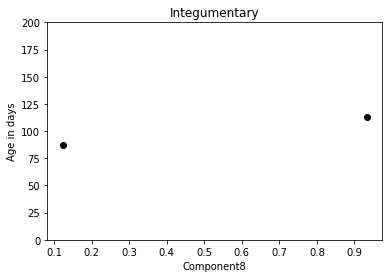

Component  9 (nan, nan)


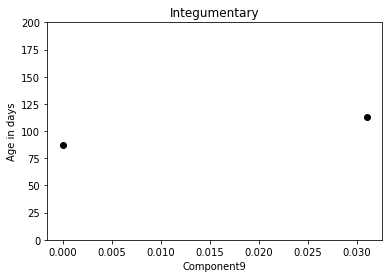

Component  10 (nan, nan)


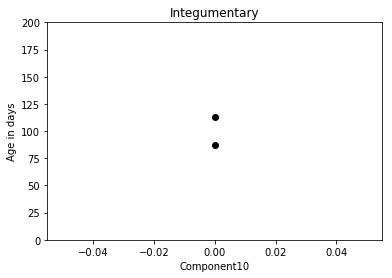

Component  11 (nan, nan)


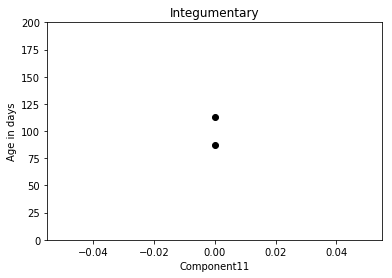

Component  12 (nan, nan)


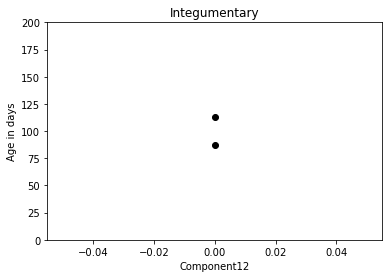

Component  13 (nan, nan)


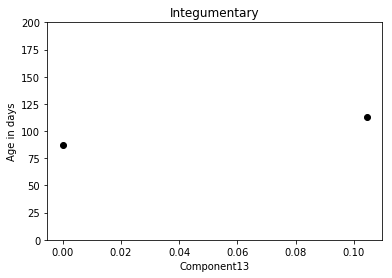

Component  14 (nan, nan)


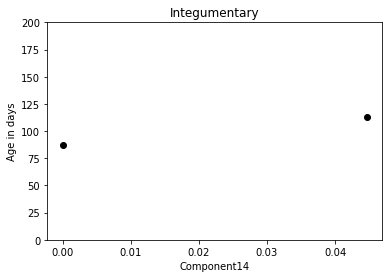

Component  15 (nan, nan)


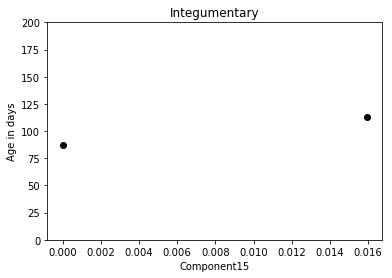

Component  16 (nan, nan)


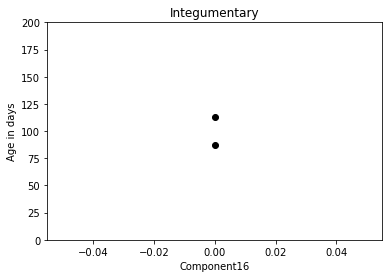

**************************************************
**************************************************
doing system:  Embryonic
Component  1 (nan, nan)


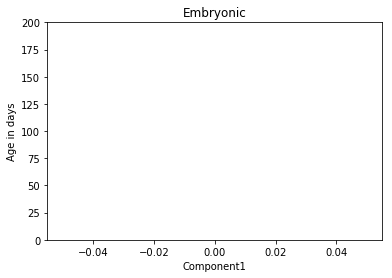

Component  2 (nan, nan)


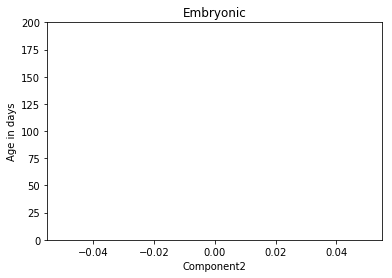

Component  3 (nan, nan)


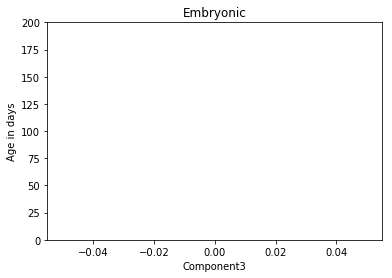

Component  4 (nan, nan)


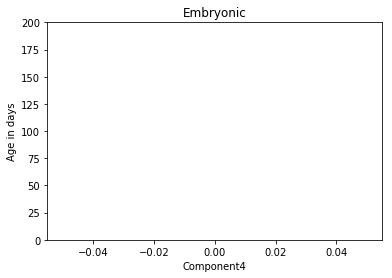

Component  5 (nan, nan)


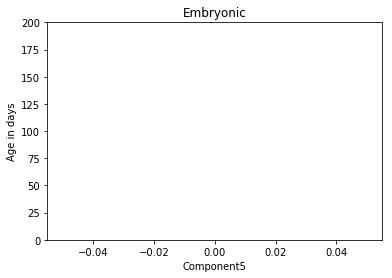

Component  6 (nan, nan)


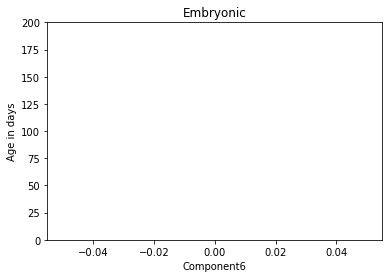

Component  7 (nan, nan)


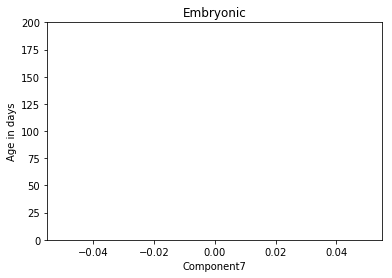

Component  8 (nan, nan)


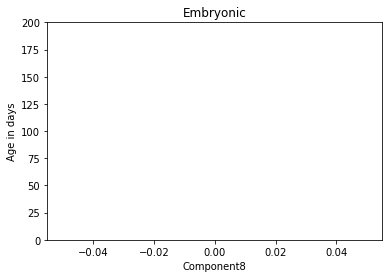

Component  9 (nan, nan)


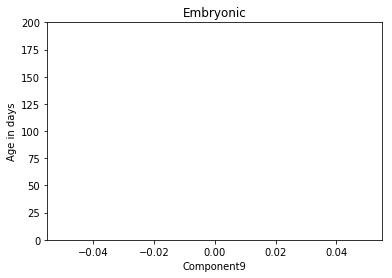

Component  10 (nan, nan)


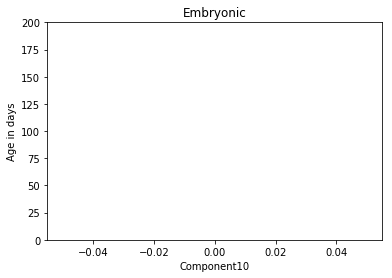

Component  11 (nan, nan)


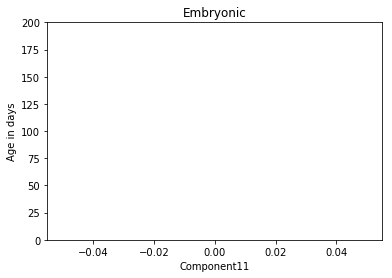

Component  12 (nan, nan)


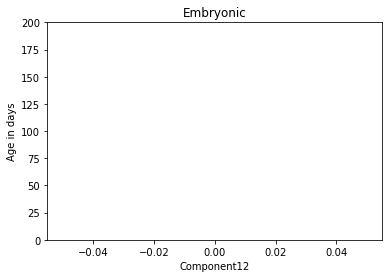

Component  13 (nan, nan)


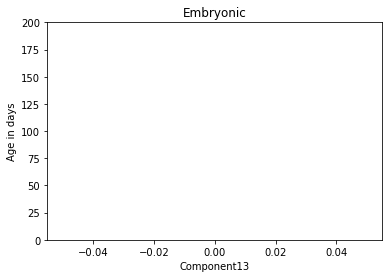

Component  14 (nan, nan)


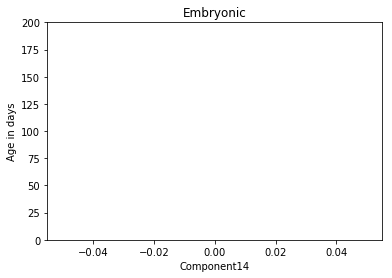

Component  15 (nan, nan)


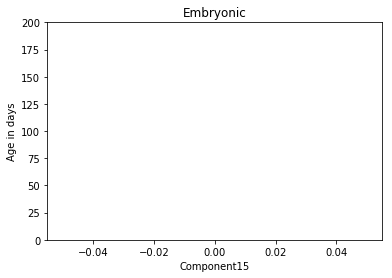

Component  16 (nan, nan)


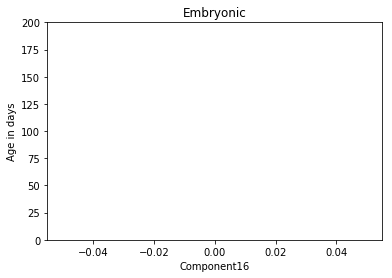

**************************************************
**************************************************
doing system:  Epithelial
Component  1 (nan, nan)


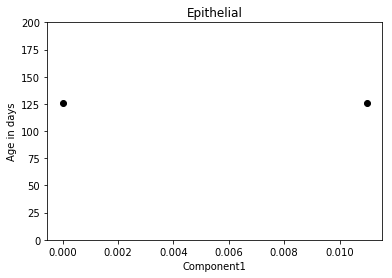

Component  2 (nan, nan)


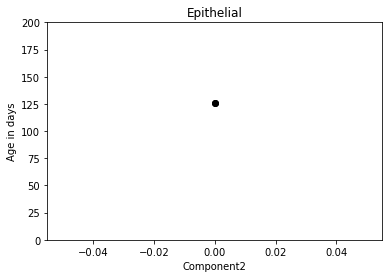

Component  3 (nan, nan)


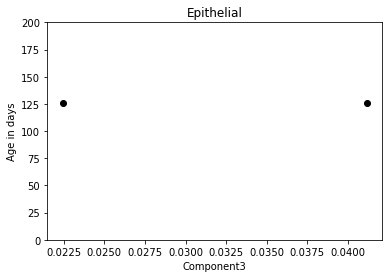

Component  4 (nan, nan)


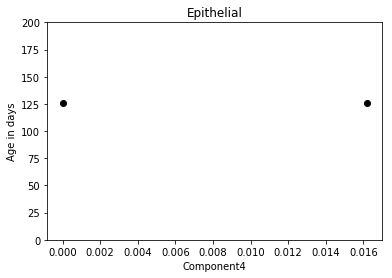

Component  5 (nan, nan)


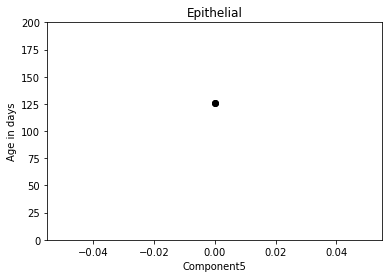

Component  6 (nan, nan)


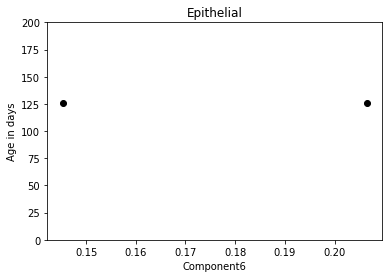

Component  7 (nan, nan)


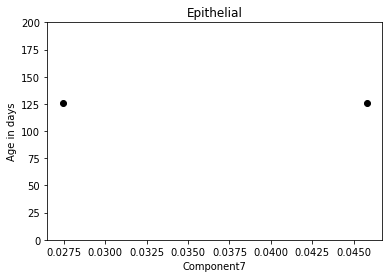

Component  8 (nan, nan)


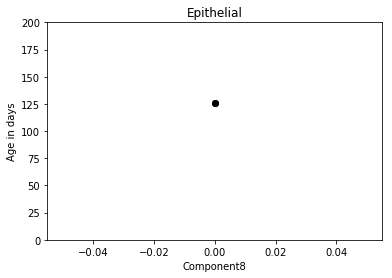

Component  9 (nan, nan)


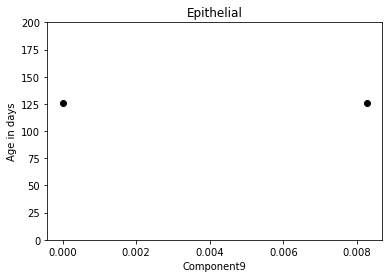

Component  10 (nan, nan)


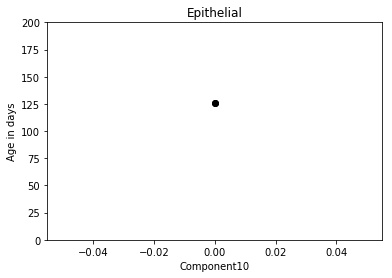

Component  11 (nan, nan)


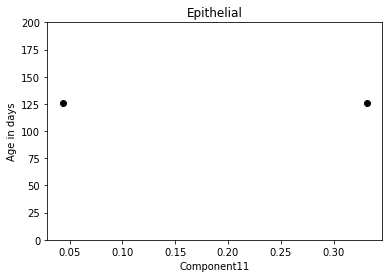

Component  12 (nan, nan)


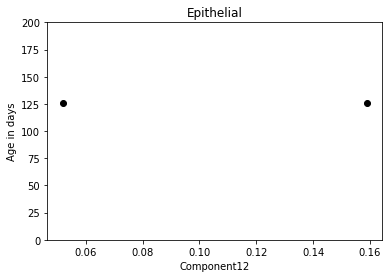

Component  13 (nan, nan)


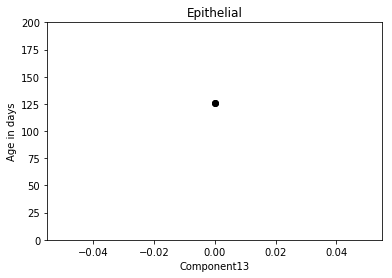

Component  14 (nan, nan)


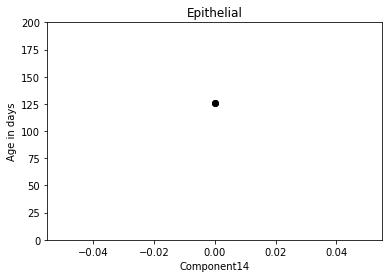

Component  15 (nan, nan)


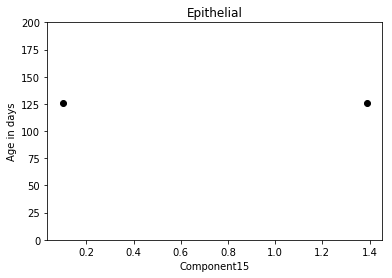

Component  16 (nan, nan)


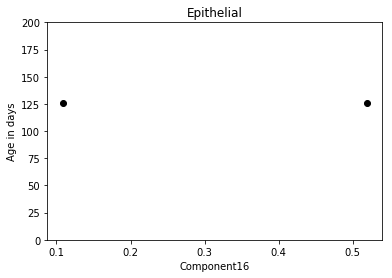

**************************************************
**************************************************
doing system:  Fetal Life Support
Component  1 (-1.0, 0.0)


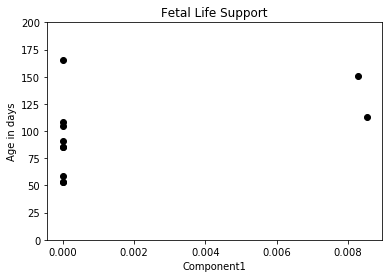

Component  2 (-1.0, 0.0)


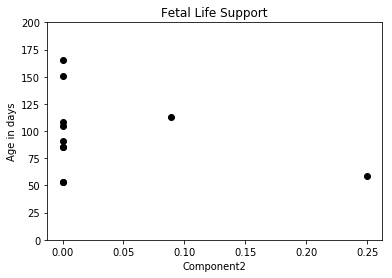

Component  3 (-0.36560730143932341, 0.29883676863065611)


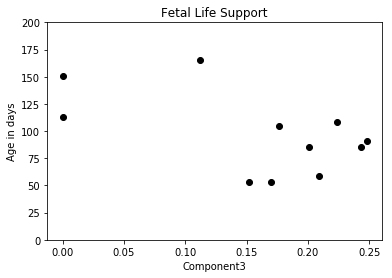

Component  4 (-0.20865785892190519, 0.73626915768787216)


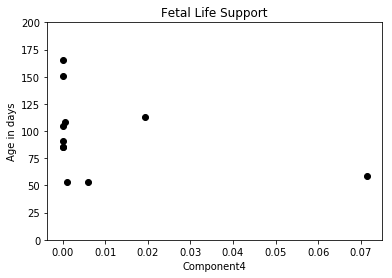

Component  5 (-0.41438723290308244, 0.41399777104892255)


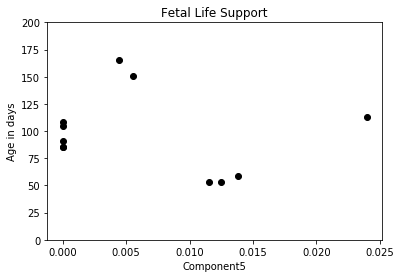

Component  6 (-0.65135878604365283, 0.34864121395634723)


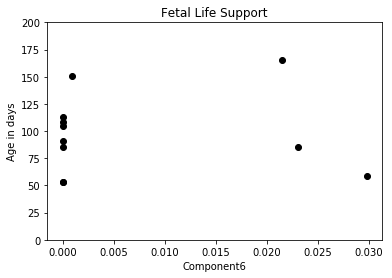

Component  7 (1.0, 0.0)


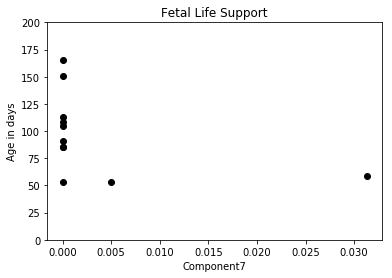

Component  8 (0.13496962440878418, 0.91381262867086543)


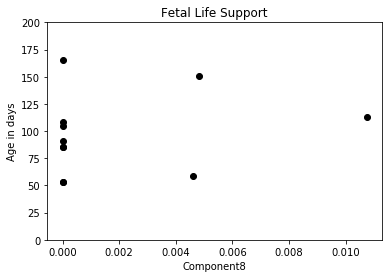

Component  9 (-0.023510723156955383, 0.9764892768430451)


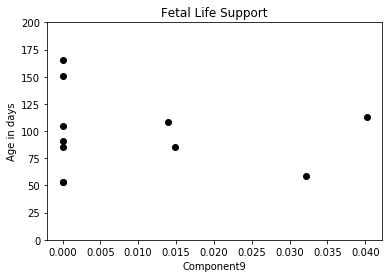

Component  10 (-0.82862391054569073, 0.17137608945430929)


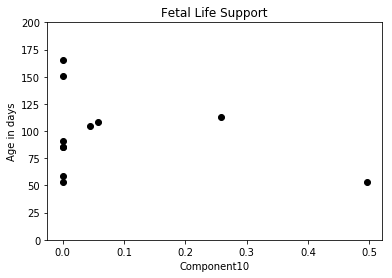

Component  11 (1.0, 0.0)


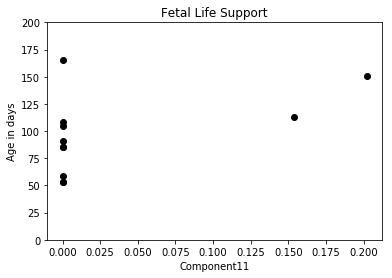

Component  12 (0.62945049386567808, 0.037971104326779664)


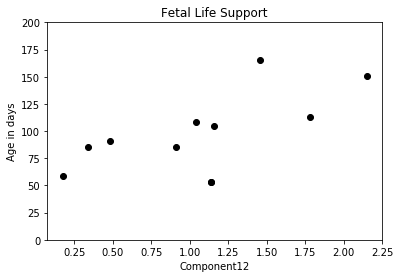

Component  13 (-0.14226974793755684, 0.90911990957933853)


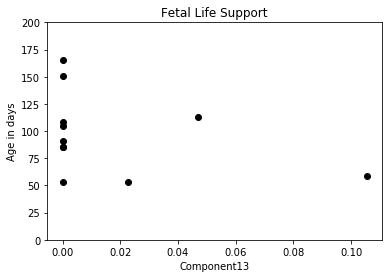

Component  14 (-0.9851607164449494, 0.10980954859402535)


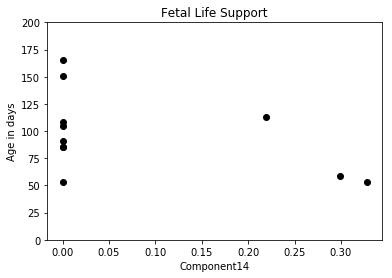

Component  15 (1.0, 0.0)


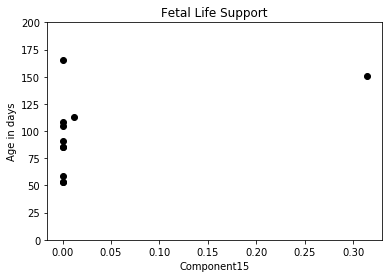

Component  16 (-1.0, 0.0)


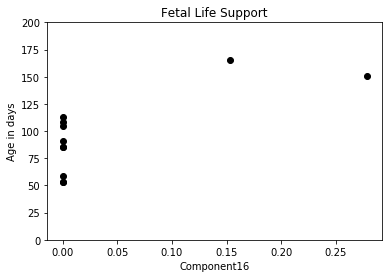

**************************************************
**************************************************
doing system:  Genitourinary
Component  1 (nan, nan)


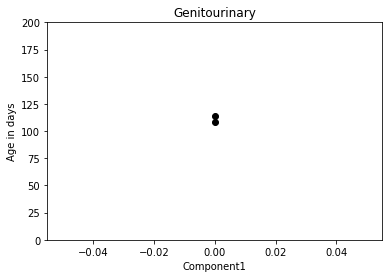

Component  2 (nan, nan)


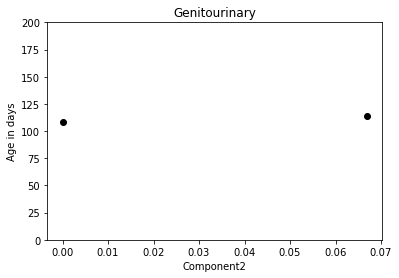

Component  3 (1.0, 0.0)


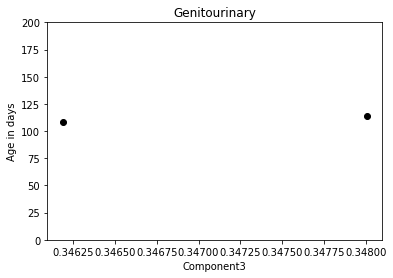

Component  4 (1.0, 0.0)


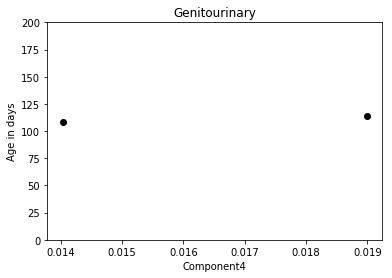

Component  5 (nan, nan)


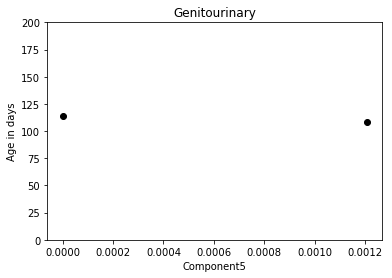

Component  6 (nan, nan)


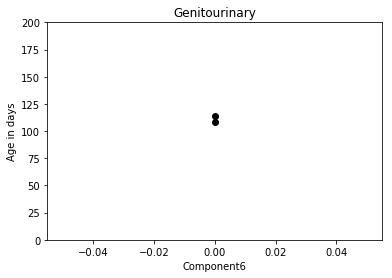

Component  7 (nan, nan)


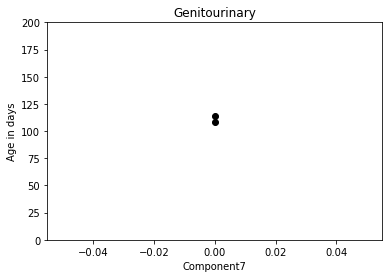

Component  8 (1.0, 0.0)


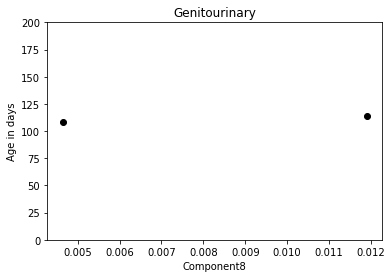

Component  9 (nan, nan)


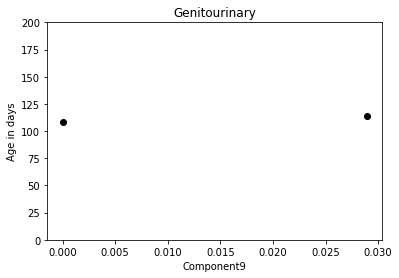

Component  10 (nan, nan)


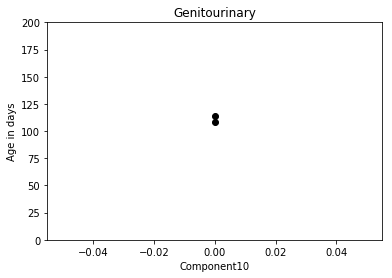

Component  11 (nan, nan)


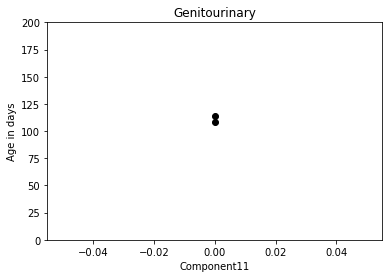

Component  12 (nan, nan)


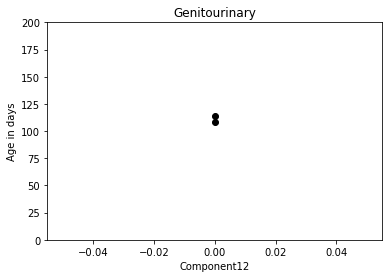

Component  13 (-1.0, 0.0)


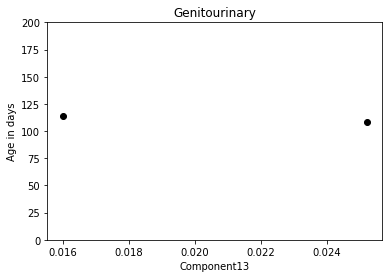

Component  14 (nan, nan)


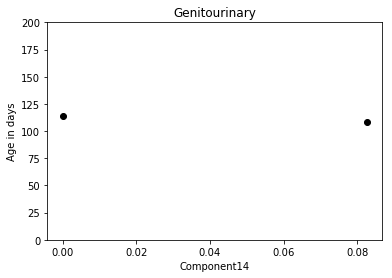

Component  15 (-1.0, 0.0)


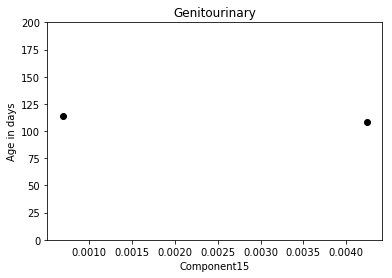

Component  16 (nan, nan)


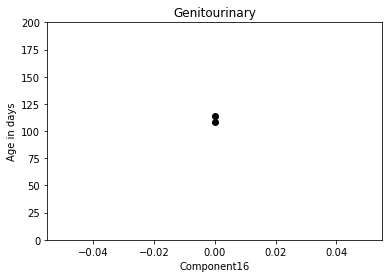

**************************************************
**************************************************
doing system:  Endocrine
Component  1 (0.14877975142463906, 0.77847702359162574)


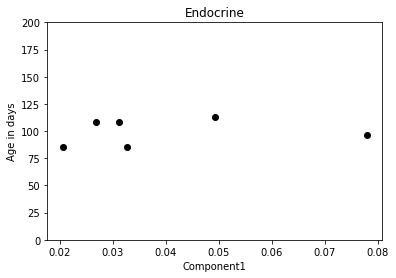

Component  2 (nan, nan)


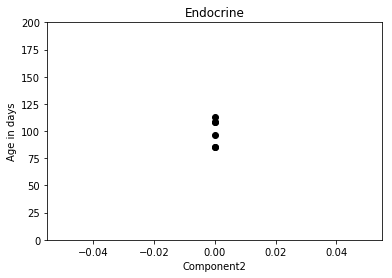

Component  3 (-0.74788684641152536, 0.087329275919728916)


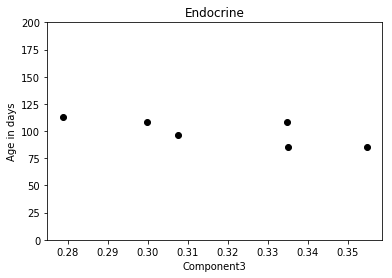

Component  4 (0.19455863666433135, 0.71184436517872163)


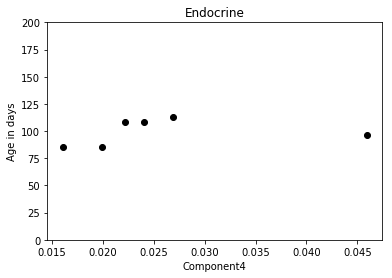

Component  5 (nan, nan)


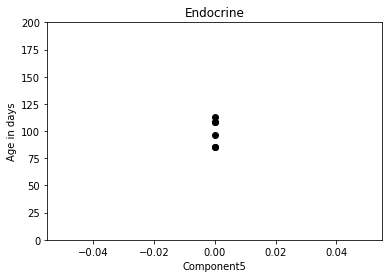

Component  6 (0.4362733493993084, 0.46268153919159571)


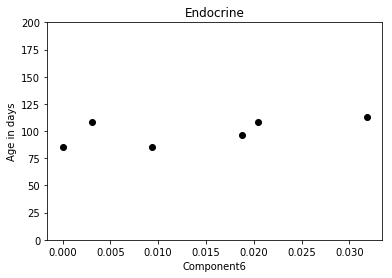

Component  7 (0.77250387002798271, 0.071744760732960253)


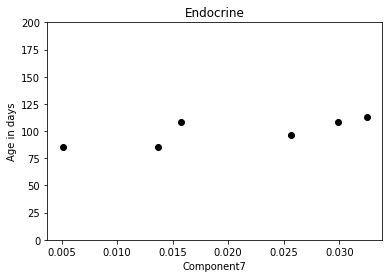

Component  8 (0.10686893262321909, 0.89313106737678116)


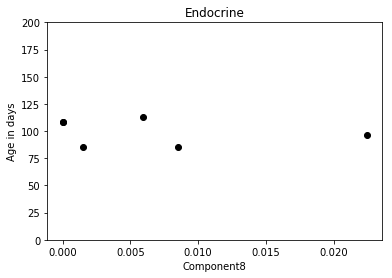

Component  9 (nan, nan)


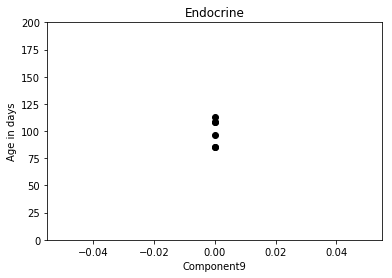

Component  10 (-0.44646822764429811, 0.45103387234694481)


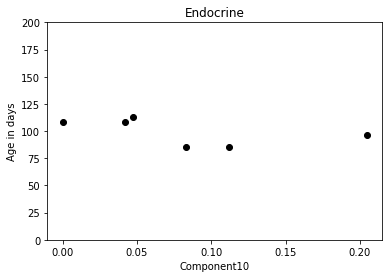

Component  11 (-0.026026045498534649, 0.96096974618880227)


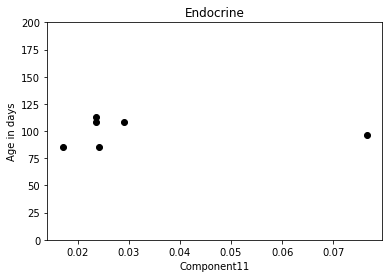

Component  12 (-0.93061426540146441, 0.23854698854939296)


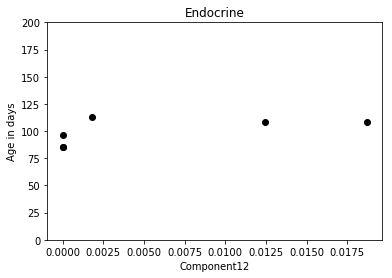

Component  13 (1.0, 0.0)


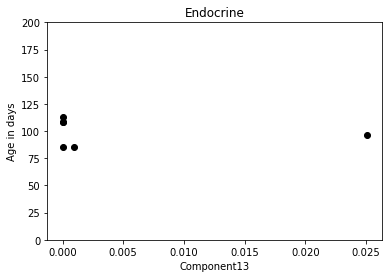

Component  14 (0.079871582141343211, 0.8984125742153628)


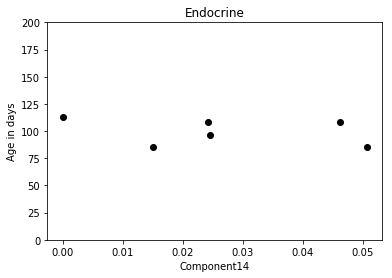

Component  15 (-1.0, 0.0)


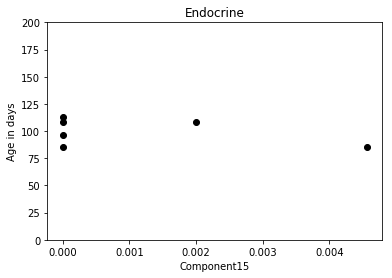

Component  16 (0.75087896122548814, 0.085361551179744602)


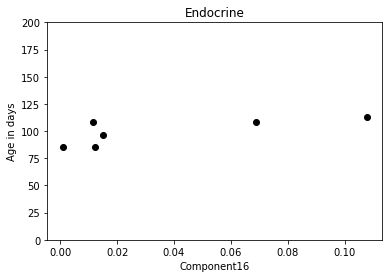

**************************************************
**************************************************
doing system:  Hepatic
Component  1 (nan, nan)


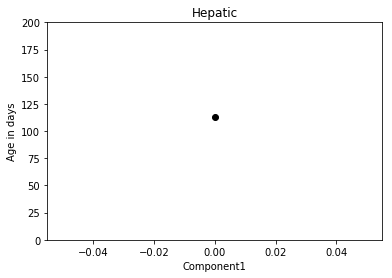

Component  2 (nan, nan)


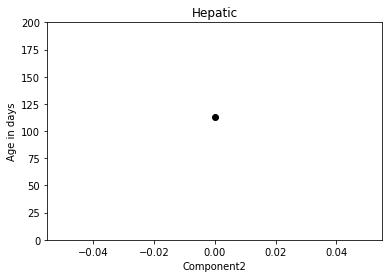

Component  3 (nan, nan)


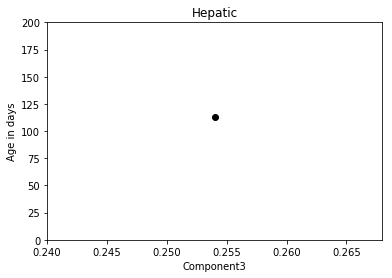

Component  4 (nan, nan)


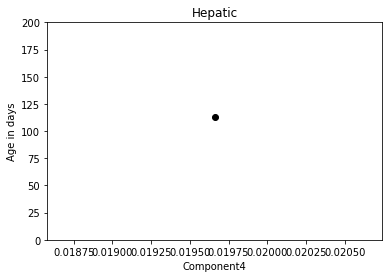

Component  5 (nan, nan)


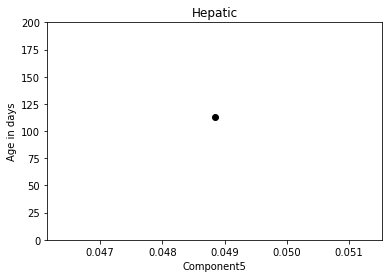

Component  6 (nan, nan)


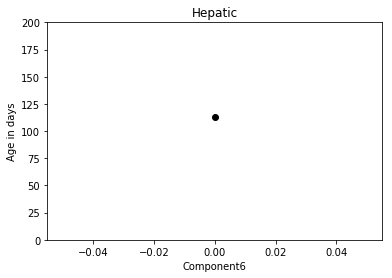

Component  7 (nan, nan)


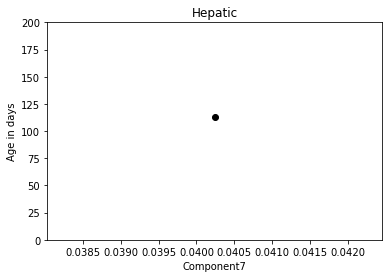

Component  8 (nan, nan)


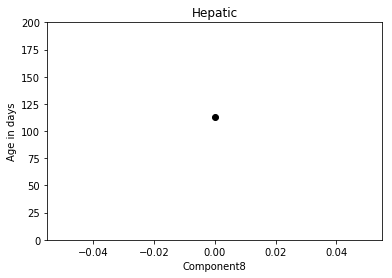

Component  9 (nan, nan)


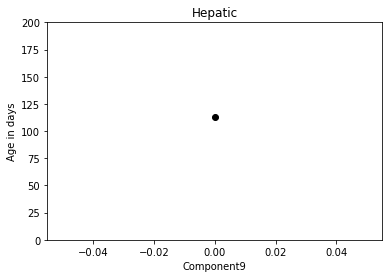

Component  10 (nan, nan)


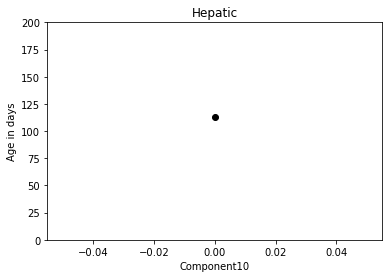

Component  11 (nan, nan)


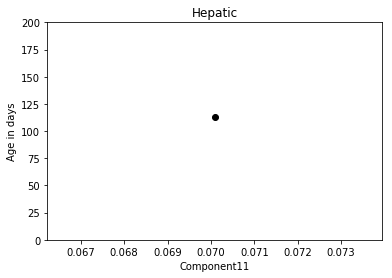

Component  12 (nan, nan)


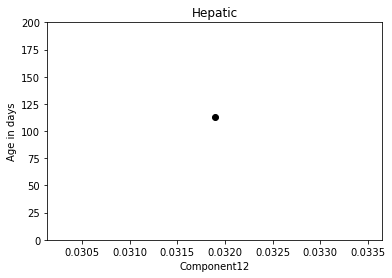

Component  13 (nan, nan)


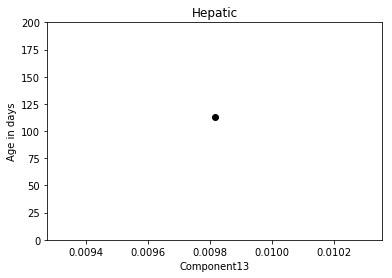

Component  14 (nan, nan)


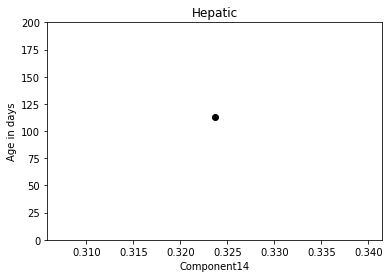

Component  15 (nan, nan)


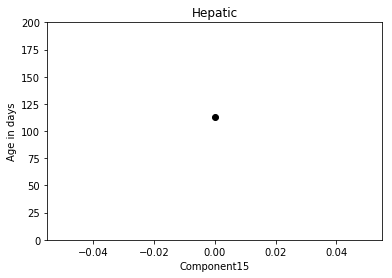

Component  16 (nan, nan)


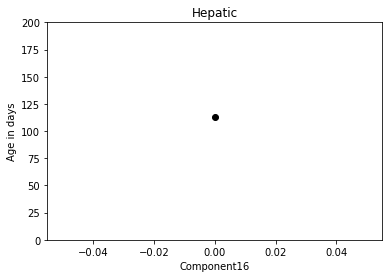

In [67]:
for system in SystemType:
    SystemCut = MetaData.system.values[rosetta] ==  str(system)
    print('*'*50)
    print('*'*50)
    print('doing system: ',system)
    for i in range(16):
        plt.clf()
        plt.ylim([0,200])
        plt.ylabel('Age in days')
        plt.xlabel('Component'+str(i+1))
        plt.title(system)
        plt.plot(a.Basis[:,i][(dayage>0) * (dayage<200)*SystemCut], dayage[(dayage>0) * (dayage<200)*SystemCut], 'ok')
        print('Component ',(i+1), pearsonr(a.Basis[:,i][(dayage>0) * (dayage<200) *( a.Basis[:,i] > 0) * SystemCut], dayage[(dayage>0) * (dayage<200) * (a.Basis[:,i]>0) * SystemCut]))
        plt.show()

Component  14 (nan, nan)


/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/amuratov/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


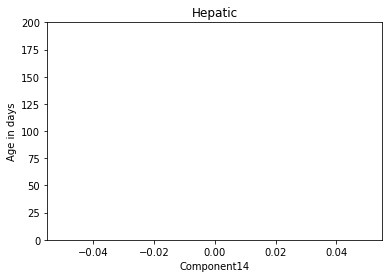

In [69]:
i =13
SystemCut = MetaData.system.values[rosetta].any in ['Renal', 'Musculoskeletal', 'Nervous']

plt.clf()
plt.ylim([0,200])
plt.ylabel('Age in days')
plt.xlabel('Component'+str(i+1))
plt.title(system)
plt.plot(a.Basis[:,i][(dayage>0) * (dayage<200)*SystemCut], dayage[(dayage>0) * (dayage<200)*SystemCut], 'ok')
print('Component ',(i+1), pearsonr(a.Basis[:,i][(dayage>0) * (dayage<200) *( a.Basis[:,i] > 0) * SystemCut], dayage[(dayage>0) * (dayage<200) * (a.Basis[:,i]>0) * SystemCut]))
plt.show()

In [75]:
SystemCut = []
for system in MetaData.system.values[rosetta]:
    if system in  ['Renal', 'Musculoskeletal', 'Nervous']:
        SystemCut.append(True)
    else:
        SystemCut.append(False)

In [80]:
SystemCut[0:15]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False], dtype=bool)

In [79]:
SystemCut = np.array(SystemCut)

Component  14 (-0.50036250330213172, 0.0092346291280647232)


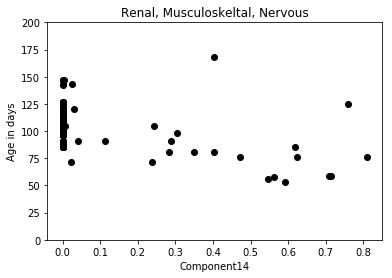

In [81]:
i =13

plt.clf()
plt.ylim([0,200])
plt.ylabel('Age in days')
plt.xlabel('Component'+str(i+1))
plt.title('Renal, Musculoskeltal, Nervous')
plt.plot(a.Basis[:,i][(dayage>0) * (dayage<200)*SystemCut], dayage[(dayage>0) * (dayage<200)*SystemCut], 'ok')
print('Component ',(i+1), pearsonr(a.Basis[:,i][(dayage>0) * (dayage<200) *( a.Basis[:,i] > 0) * SystemCut], dayage[(dayage>0) * (dayage<200) * (a.Basis[:,i]>0) * SystemCut]))
plt.show()

Component  14 (-0.50036250330213172, 0.0092346291280647232)


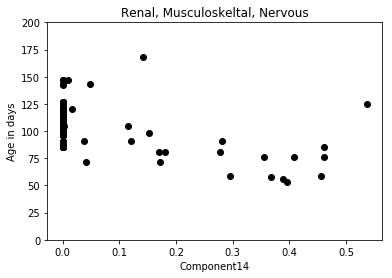

In [84]:
i =13

plt.clf()
plt.ylim([0,200])
plt.ylabel('Age in days')
plt.xlabel('Component'+str(i+1))
plt.title('Renal, Musculoskeltal, Nervous')
plt.plot(a.NormedBasis[:,i][(dayage>0) * (dayage<200)*SystemCut], dayage[(dayage>0) * (dayage<200)*SystemCut], 'ok')
print('Component ',(i+1), pearsonr(a.Basis[:,i][(dayage>0) * (dayage<200) *( a.Basis[:,i] > 0) * SystemCut], dayage[(dayage>0) * (dayage<200) * (a.Basis[:,i]>0) * SystemCut]))
plt.show()

In [82]:
len(SystemCut[SystemCut])

214

In [83]:
from sklearn.linear_model import LogisticRegression

In [86]:
C14cut = a.NormedBasis[:,i][(dayage>0) * (dayage<200)*SystemCut] > 0.05

In [88]:
len(C14cut)

151

In [92]:
len(C14cut[C14cut])

19

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
logreg = LogisticRegression()

In [ ]:
dir(logreg)

In [103]:
scores = cross_val_score(logreg, dayage[(dayage>0) * (dayage<200)*SystemCut].reshape(-1, 1), C14cut.astype(int), cv=5, verbose=True)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [97]:
scores

array([ 0.87096774,  0.87096774,  0.86666667,  0.86666667,  0.89655172])

In [98]:
(151-19)/151

0.8741721854304636

In [100]:
scores = cross_val_score(logreg, dayage[(dayage>0) * (dayage<200)*SystemCut].reshape(-1, 1), C14cut.astype(int), cv=5, scoring='f1_macro')

/Users/amuratov/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amuratov/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amuratov/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amuratov/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amuratov/anac

In [101]:
scores

array([ 0.46551724,  0.46551724,  0.46428571,  0.46428571,  0.47272727])